# Evolutionarily recent transcription factors partake in human cell cycle regulation

## All figures

In [1]:
library(tidyverse)
library(ComplexHeatmap)
library(magick) # rasterization of ComplexHeatmap matrices
library(ggpubr)
library(circlize)
library(viridis)
library(spatstat) # to smooth the H3K9me3 signal over rhythmic promoters
library(EBImage) # to smooth the H3K9me3 signal over rhythmic promoters
library(clusterProfiler) # GO enrichment analysis
library(GOSemSim) # GO enrichment analysis
library(org.Hs.eg.db) # for enrichment to work
library(cowplot) # multi-panel plots
library(ggnewscale) # two different color codes

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“package ‘ComplexHeatmap’ was built under R version 4.2.3”
Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal p

In [2]:
rhythm = read.table('../out/tables/all_genes_cycling_info.tsv', sep = '\t', header = T)
rhythm %>% dim()
rhythm %>% colnames()

# we remove RTindex_avg, RepliTiming (discrete, not needed anymore) and rif1, which we replace using the gene_metadata_augmented table
rhythm = rhythm %>% dplyr::select(-RepliTiming, -RTindex_avg, -rif1)

[1] 13749    43

[1] "ensembl"           "entrez"            "symbol"           
 [4] "genename"          "chr"               "start"            
 [7] "end"               "strand"            "coding"           
[10] "obs"               "mesor"             "amplitude"        
[13] "acrophase"         "rsquared"          "df.model"         
[16] "df.residual"       "statistic"         "pvalue"           
[19] "period"            "beta"              "gamma"            
[22] "delta"             "beta_2.5"          "beta_97.5"        
[25] "gamma_2.5"         "gamma_97.5"        "amplitude_2.5"    
[28] "amplitude_97.5"    "acrophase_2.5"     "acrophase_97.5"   
[31] "phase"             "phase_2.5"         "phase_97.5"       
[34] "phase_lower_upper" "phase_upper_lower" "padj"             
[37] "stars"             "phase_rounded"     "phase_gating"     
[40] "phase_assigned"    "RepliTiming"       "RTindex_avg"      
[43] "rif1"

In [3]:
gene_metadata = read.table('../out/tables/gene_metadata_augmented.tsv', sep = '\t', header = T, quote = '')
gene_metadata %>% dim()
gene_metadata %>% colnames()

[1] 20327    52

[1] "chr"                               "start"                            
 [3] "end"                               "ensembl"                          
 [5] "strand"                            "symbol"                           
 [7] "isKZFP"                            "isC2H2"                           
 [9] "isTF"                              "tf_category"                      
[11] "RTindex_K562"                      "RTdiff_RIF1KO"                    
[13] "RTdiff_ZNF274KO"                   "H3K9me3_tss_body"                 
[15] "ZNF274_tss_body"                   "RIF1_tss_body"                    
[17] "p_val_ZNF274KO_vs_WT_HEK293T"      "p_adj_ZNF274KO_vs_WT_HEK293T"     
[19] "foldChange_ZNF274KO_vs_WT_HEK293T" "chrom"                            
[21] "start_TSS"                         "end_TSS"                          
[23] "CTCF_tss"                          "ZNF75D_tss"                       
[25] "ZNF75A_tss"                        "ZNF274_tss"                       
[27] "H3K27me3_tss"                      "H3K9me3_tss"                      
[29] "H3K27ac_tss"                       "ATAC_tss"                         
[31] "H3K4me3_tss"                       "ZNF75D_znfs"                      
[33] "ZNF75A_znfs"                       "ZNF274_znfs"                      
[35] "H3K27me3_znfs"                     "H3K9me3_znfs"                     
[37] "ATAC_znfs"                         "deltaK9_ZNF274KO_znf"             
[39] "age.DeTribolet"                    "species"                          
[41] "z_C2H2_miss"                       "cluster"                          
[43] "Tycko_score_avg"                   "Age.Years.Coudray"                
[45] "Age.Species.Coudray"               "gene_Interval.GenOrigin"          
[47] "gene_branch.GenOrigin"             "gene_age.GenOrigin"               
[49] "branch.GenTree"                    "clade.GenTree"                    
[51] "age.GenTree"                       "age_combined"

In [4]:
# sanity check on ZNF695 rhythmicity
rhythm %>% dplyr::filter(symbol == "ZNF695") %>% dplyr::select(stars)

stars
1 *

# Figure 1

In [5]:
rhythm %>% colnames()

[1] "ensembl"           "entrez"            "symbol"           
 [4] "genename"          "chr"               "start"            
 [7] "end"               "strand"            "coding"           
[10] "obs"               "mesor"             "amplitude"        
[13] "acrophase"         "rsquared"          "df.model"         
[16] "df.residual"       "statistic"         "pvalue"           
[19] "period"            "beta"              "gamma"            
[22] "delta"             "beta_2.5"          "beta_97.5"        
[25] "gamma_2.5"         "gamma_97.5"        "amplitude_2.5"    
[28] "amplitude_97.5"    "acrophase_2.5"     "acrophase_97.5"   
[31] "phase"             "phase_2.5"         "phase_97.5"       
[34] "phase_lower_upper" "phase_upper_lower" "padj"             
[37] "stars"             "phase_rounded"     "phase_gating"     
[40] "phase_assigned"

In [6]:
rhythm %>% 
    dplyr::left_join(., gene_metadata) %>%
    dplyr::filter(padj < 0.05) %>% 
    arrange(acrophase) %>% head()

Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`


ensembl         entrez symbol   genename                                
1 ENSG00000169155  23099 ZBTB43   zinc finger and BTB domain containing 43
2 ENSG00000120913  64236 PDLIM2   PDZ and LIM domain 2                    
3 ENSG00000181045 284129 SLC26A11 solute carrier family 26 member 11      
4 ENSG00000175489 126364 LRRC25   leucine rich repeat containing 25       
5 ENSG00000162482  22977 AKR7A3   aldo-keto reductase family 7 member A3  
6 ENSG00000205403   3426 CFI      complement factor I                     
  chr   start     end       strand coding obs ⋯ Tycko_score_avg
1 chr9  129567285 129600489 +      TRUE   22  ⋯ NA             
2 chr8   22435792  22455538 +      TRUE   22  ⋯ NA             
3 chr17  78193498  78227299 +      TRUE   22  ⋯ NA             
4 chr19  18501954  18508427 -      TRUE   22  ⋯ NA             
5 chr1   19609052  19615744 -      TRUE   22  ⋯ NA             
6 chr4  110661852 110723335 -      TRUE   22  ⋯ NA             
  Age.Years.Coudray Age.Species.Coudray gene_Interval.GenOrigin
1 NA                NA                  615-676                
2 NA                NA                  824-948                
3 NA                NA                  952-1023               
4 NA                NA                  177-312                
5 NA                NA                  43-67                  
6 NA                NA                  948-952                
  gene_branch.GenOrigin gene_age.GenOrigin branch.GenTree clade.GenTree
1 14                    645                1              Tetrapoda    
2 10                    886                0              Euteleostomi 
3  8                    987                0              Euteleostomi 
4 20                    244                3              Mammalia     
5 28                     55                3              Mammalia     
6  9                    950                1              Tetrapoda    
  age.GenTree age_combined
1 361.2       361.2       
2 454.6       886.0       
3 454.6       987.0       
4 220.2       220.2       
5 220.2       220.2       
6 361.2       361.2

In [7]:
# exporting the coordinates of rhythmic genes TSS sorted by acrophase as a bed file,
# to retrieve high definition H3K9me3 signal 
rhythm %>% 
    dplyr::left_join(., (gene_metadata %>% dplyr::select(ensembl, start_TSS, end_TSS))) %>%
    dplyr::filter(padj < 0.05) %>% 
    arrange(acrophase) %>% 
    dplyr::select(chr, start_TSS, end_TSS, ensembl) %>%
    write.table('../out/temp/tss_rhythmic_genes_sorted_acrophase.bed', col.names = F, row.names = F, sep = '\t', quote = F)

Joining with `by = join_by(ensembl)`


In [8]:
# Computing and adding the width or intensity of the H3K9me3 trough at the promoter of rhythmic genes
h3k9me3_promoters_hires = read.table('../out/temp/tss_rhythmic_genes_sorted_acrophase_h3k9me3_domains.tab', sep = '\t', skip = 3)

In [9]:
which(is.na(h3k9me3_promoters_hires))

integer(0)

In [10]:
h3k9me3_promoters_hires %>% head(10)

V1   V2   V3   V4   V5   V6   V7   V8   V9   V10  ⋯ V291 V292 V293 V294 V295
1  1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 ⋯ 2.48 2.48 2.48 2.00 2.00
2  2.60 2.60 2.60 2.20 2.20 2.28 2.28 2.28 3.00 3.00 ⋯ 2.00 2.00 2.00 2.00 2.00
3  2.00 2.00 2.00 2.00 2.00 1.76 1.76 1.76 0.08 0.08 ⋯ 1.28 1.28 1.28 1.00 1.00
4  3.28 3.28 3.28 3.00 3.00 3.00 3.00 3.00 3.00 3.00 ⋯ 0.00 0.00 0.00 0.00 0.00
5  0.48 1.00 1.00 2.60 2.60 2.60 3.00 3.00 3.00 3.00 ⋯ 0.00 0.00 0.00 0.00 0.00
6  3.80 3.80 3.80 3.00 3.00 3.00 3.00 3.00 3.00 3.00 ⋯ 1.88 1.88 1.88 2.00 2.00
7  3.04 3.04 2.78 2.52 2.52 4.56 4.56 4.78 5.00 5.00 ⋯ 3.48 3.48 2.88 2.28 2.28
8  6.92 6.92 6.00 6.00 6.00 6.08 6.08 6.00 6.00 6.00 ⋯ 2.00 2.00 3.32 3.32 3.32
9  1.00 1.28 1.28 2.32 2.32 2.32 3.96 3.96 5.76 5.76 ⋯ 3.80 5.00 5.00 5.92 5.92
10 3.52 3.52 4.08 4.08 5.00 5.00 5.00 5.36 5.36 5.72 ⋯ 4.00 4.00 3.12 3.12 3.00
   V296 V297 V298 V299 V300
1  3.00 3.00 3.00 3.88 3.88
2  1.80 1.80 1.80 0.56 0.56
3  1.00 1.00 1.00 0.12 0.12
4  0.00 0.00 0.00 0.00 0.00
5  0.00 0.00 0.00 0.00 0.00
6  2.00 2.00 2.00 2.00 2.00
7  1.00 1.00 0.62 0.24 0.24
8  3.28 3.28 2.92 2.92 2.92
9  5.92 6.20 6.20 7.48 7.48
10 3.00 3.00 2.56 2.56 2.76

In [11]:
h3k9me3_promoters_hires %>% dim()

[1] 4894  300

In [12]:
stopifnot(nrow(h3k9me3_promoters_hires)==(nrow(rhythm %>% dplyr::filter(padj < 0.05))))

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.



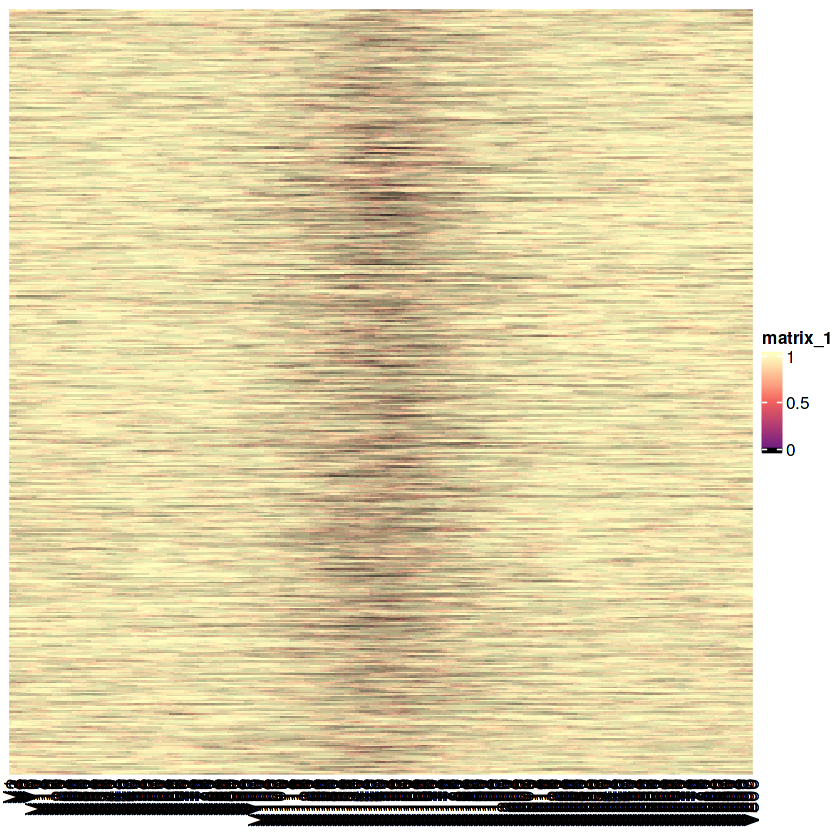

In [13]:
# plotting the raw H3K9me3 signal at promoters
log(h3k9me3_promoters_hires+1) %>% as.matrix() %>% ComplexHeatmap::Heatmap(cluster_rows = F, 
                                                                    cluster_columns = F,
                                                                    col= colorRamp2(c(0, 0.01, 0.5, 1), viridis::magma(4)))

Warning message in class(matrix) <- "matrix":
“Setting class(x) to "matrix" sets attribute to NULL; result will no longer be an S4 object”
`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.



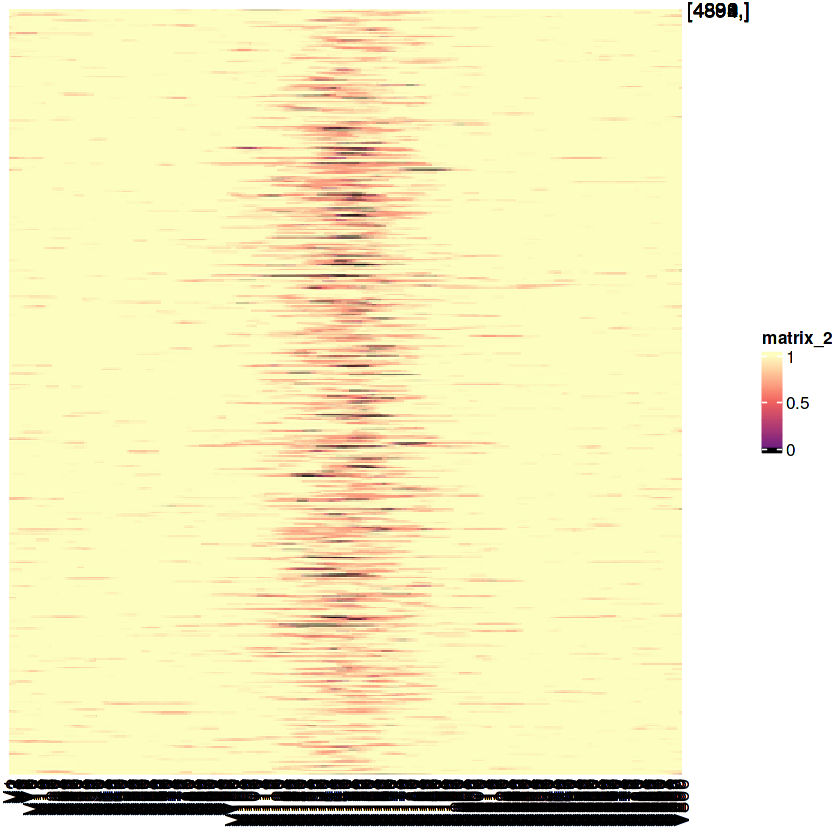

In [14]:
# let's attempt smoothing the signal to observe a more general trend
median_kernel_size = 4
gaussian_kernel_size = 7
nrow_padding = max(median_kernel_size, gaussian_kernel_size)
mat = log(h3k9me3_promoters_hires+1) %>% as.matrix()
# we pad by closing the circle, i.e. adding data from the other size of the circle
mat_padded = rbind((mat %>% tail(nrow_padding)), mat, (mat %>% head(nrow_padding)))
im.med = medianFilter(Image(mat_padded), size=4) %>% as.matrix()
im.med%>% ComplexHeatmap::Heatmap(cluster_rows = F, 
                                                                    cluster_columns = F,
                                                                    col= colorRamp2(c(0, 0.01, 0.5, 1), viridis::magma(4)))

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.



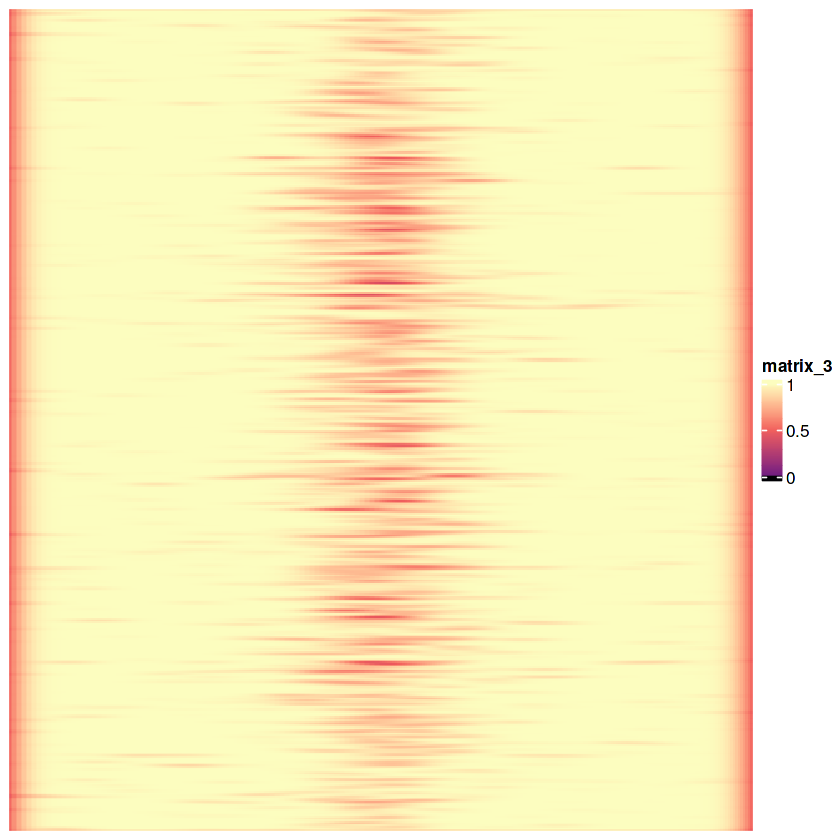

In [15]:
mat_smoothed = spatstat.explore::blur(as.im(im.med@.Data), sigma = 7, kernel = "gaussian", normalise = F, bleed = F) %>% as.matrix() %>%.[(nrow_padding+1):(nrow(mat)+nrow_padding), ]
mat_smoothed %>% ComplexHeatmap::Heatmap(cluster_rows = F, 
                                        cluster_columns = F,
                                        col= colorRamp2(c(0, 0.01, 0.5, 1), viridis::magma(4)))

In [16]:
cutoff = median(mat_smoothed[, 85:215] %>% as.vector())
cutoff

[1] 0.9685723

In [17]:
h3k9me3_signal_tss = mat_smoothed[, 85:215] %>% apply(., 1, function(x) sum(x > cutoff))/length(85:215)

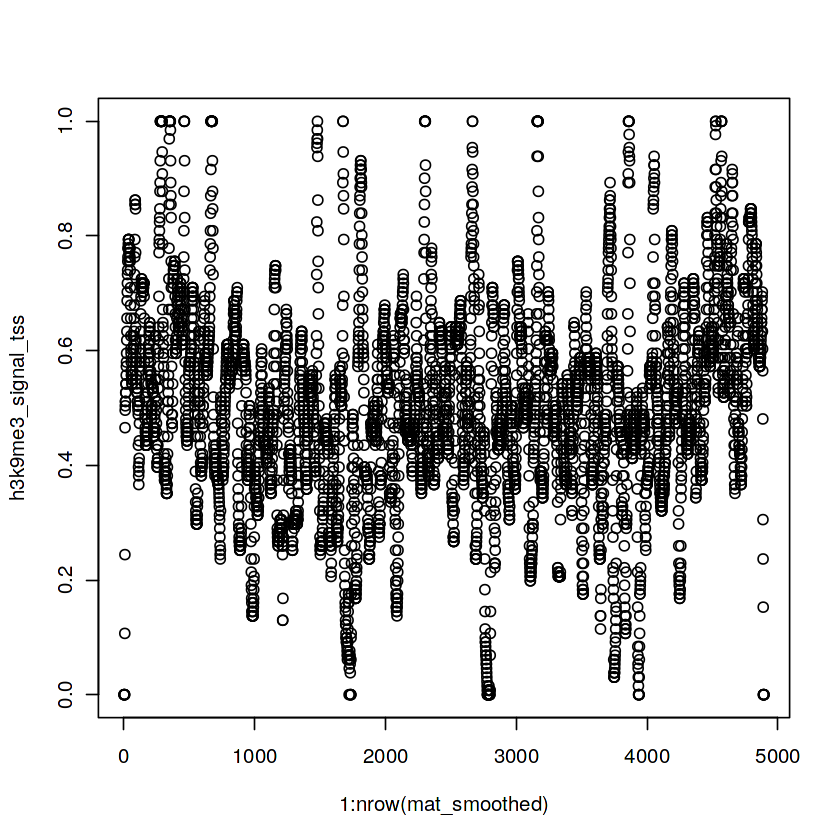

In [18]:
plot(1:nrow(mat_smoothed), h3k9me3_signal_tss)

In [19]:
plot_selection = rhythm %>% dplyr::filter(padj < 0.05) %>% 
    dplyr::arrange(acrophase) %>% 
    dplyr::left_join(., gene_metadata)

Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`


In [20]:
# setting up the legend of the plot
n_rhythmic = plot_selection %>% nrow()

In [21]:
paste0(n_rhythmic, ' rhythmic genes (padj < 0.05)')

[1] "4894 rhythmic genes (padj < 0.05)"

In [22]:
plot_order = (plot_selection %>% dplyr::arrange(acrophase))$ensembl
col_fun = colorRamp2(c(0, 0.5, 1), c("blue", "white", "red"))
lgd = Legend(col_fun = col_fun, title = "expr z-scored log2", direction = "horizontal")

In [23]:
plot_selection$RIF1_tss_body %>% summary()

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-1.87900 -0.42772 -0.21518 -0.18773  0.03148  1.12300      315 

In [24]:
plot_selection$RTindex_K562 %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -4.917   1.965   3.596   2.831   4.273   5.930     307 

In [25]:
cols = list(`bas. expr.` = colorRamp2(breaks = c(-2.5, 2.5, 4, 6, 10), colors = viridis::mako(5)),
    RIF1 =  colorRamp2(c(-0.5, -0.2, 0, 0.2, 0.5), hcl.colors(n = 5, palette = "Cividis", rev = F)),
    RT = colorRamp2(breaks = seq(from = 2.5, to = 4.5, length.out = 4), colors = viridis::viridis(4)),
    H3K9me3 = colorRamp2(breaks = seq(from = 0.4, to = 0.8, length.out = 10), colors = viridis::magma(10)))

In [26]:
# legacy: RepliTiming was added to row_anno in the past `Repl. timing` = RepliTiming,

row_anno = plot_selection %>% dplyr::select(RTindex_K562, RIF1_tss_body, mesor) %>% 
                        dplyr::rename(RIF1 = RIF1_tss_body, `bas. expr.` = mesor, RT = RTindex_K562)
row_anno$H3K9me3 = h3k9me3_signal_tss

In [27]:
row_anno %>% head()

RT       RIF1       bas. expr. H3K9me3
1 2.107615 -0.1328000  4.7958670 0      
2 3.644514 -0.2920000 -1.1005728 0      
3 2.997479 -0.6248570  2.0232367 0      
4 5.444013 -0.7690000 -0.4632211 0      
5 2.846770 -0.5659000 -0.2147367 0      
6 4.540679  0.1681585 -1.8128311 0

In [28]:
# annotating the top 10 rhythmic gene per phase merged with the top 10 rhythmic genes overall
genes_to_label = c(rhythm %>% 
    dplyr::filter(padj < 0.05, !phase_assigned %in% c()) %>% 
    dplyr::group_by(phase_assigned) %>%
    dplyr::arrange(padj) %>% dplyr::slice_head(n=1) %>% dplyr::pull(symbol),
  rhythm %>%
      dplyr::arrange(padj) %>% head(10) %>% pull(symbol) %>% unique())

In [29]:
genes_to_label_idx = match(genes_to_label, (rhythm %>% dplyr::filter(padj < 0.05) %>% arrange(acrophase) %>% pull(symbol)))

In [30]:
genes_to_label_idx

[1]  935 2785 3424 4288 1497 2439  206  562  935  654 1497  672  562 2785 1139
[16]  943  952 1631

In [31]:
ha = rowAnnotation(df = row_anno, col = cols)
label_annotation = ComplexHeatmap::rowAnnotation(foo = anno_mark(at = genes_to_label_idx, side = "left", padding = 2,
    labels = genes_to_label))
plot_order = plot_selection$ensembl

In [32]:
expr_color = colorRamp2(breaks = c(-2, -1, 0, 1, 2), colors = hcl.colors(5, palette = "RdBu", rev = T))

In [33]:
# loading the expression values for the heatmap
expr_zscore = read.table('../out/tables/expr_zscore_RNAseq_cellcycle_romain.tsv', sep = '\t', header = T) %>% as.matrix()
expr_zscore %>% head()

eG1        lG1        G1.S        S1          S2        
ENSG00000223972  0.3727613 -0.2445188 -0.72271242  0.91060267 -0.4882113
ENSG00000227232  0.6051427 -0.6893431 -0.42486266 -0.89406694  0.7248628
ENSG00000238009 -1.3774741  0.7297707  0.36537273  0.83670461 -0.3207461
ENSG00000237683  0.8267984 -1.6196387  0.02860690  0.47452656 -0.3728155
ENSG00000268903 -1.7145442 -0.1647183 -0.68056244 -0.07369288  1.4579901
ENSG00000241860 -1.0790718 -0.8949763  0.02956345  0.34193243  0.1998559
                G2          G2.M        M        
ENSG00000223972 -0.29367285 -1.35090029  1.816652
ENSG00000227232  0.26020609 -1.29067336  1.708734
ENSG00000238009  1.23684401 -0.02017537 -1.450296
ENSG00000237683 -0.81828634 -0.14339432  1.624203
ENSG00000268903  0.21686067 -0.20342763  1.162095
ENSG00000241860 -0.05903161 -0.64846167  2.110190

In [34]:
cn = sapply(1:length((expr_zscore %>% colnames())), FUN = function(x) paste0((expr_zscore %>% colnames())[x], '\n', as.roman(x)))

htmp = Heatmap(expr_zscore[plot_order, ],
        show_row_names = F, 
        row_title = paste0(plot_order %>% length(), ' rhythmic genes (adj. p < 0.05)'), 
        show_column_names = F, #done via an annotation due to the automatic rotation
        heatmap_legend_param = list(
            title = "expr.",
            direction = "horizontal",
        title_position = "topcenter"),
        cluster_rows = FALSE, 
               cluster_columns = FALSE,
              right_annotation = ha,
               left_annotation = label_annotation,
              col = expr_color,
              bottom_annotation = HeatmapAnnotation(
        text = anno_text(cn, rot = 0, location = unit(1, "npc"), just = "top"),
        annotation_height = max_text_width(cn)),
              use_raster = T,
               raster_quality = 5,
               raster_by_magick = TRUE) %v% NULL

In [35]:
svg('../out/cell_cycle_figures/cycling_genes_heatmap_with_RepliTiming.svg', height = 5.5, width = 6)
draw(htmp, heatmap_legend_side="top", annotation_legend_side="right")
dev.off()


png 
  2

## Baseline expression, RIF1, RT and H3K9me3 at rhythmic promoters

In [36]:
# RIF1 M-S1 vs. S2-G2/M
acr = c("S2", "G2", "G2/M")
acr_excluded = c()

y_dashed = plot_selection %>% 
    dplyr::filter(!phase_assigned %in% acr_excluded) %>%
    dplyr::mutate(phase_in_S2_M = phase_assigned %in% acr) %>% 
    dplyr::filter(!phase_in_S2_M) %>% 
    dplyr::pull(RIF1_tss_body) %>% 
    median(na.rm = T)

p = plot_selection %>%
    dplyr::filter(!phase_assigned %in% acr_excluded) %>%
    dplyr::select(phase_assigned, RIF1_tss_body) %>% 
    dplyr::rename(RIF1 = RIF1_tss_body) %>% 
    dplyr::mutate(phase_in_S2_M = phase_assigned %in% acr) %>%
    ggpubr::ggviolin(x = "phase_in_S2_M", y = "RIF1", add = "boxplot") + 
    geom_hline(yintercept = y_dashed, linetype = "dashed") +
    stat_compare_means(label.x = 0.9, label.y = 2.4, step.increase = 1) +
    theme_classic() + 
    theme(axis.ticks.x=element_blank(), axis.line.x = element_blank()) + 
    xlab("") + ylab("RIF1 [log2 FC over input]") + 
    scale_x_discrete(breaks=c(F, T),
        labels=c("M-to-S1", "S2-to-G2/M")) + 
    coord_cartesian(ylim = c(-2, 2.5),
                      clip = 'off')

svg('../out/cell_cycle_figures/RIF1_stat_test.svg', height = 2.5, width = 2)
p
dev.off()

Warning message:
“Removed 315 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 315 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 315 rows containing non-finite outside the scale range
(`stat_compare_means()`).”


png 
  2

In [37]:
# MESOR (baseline expression) M-S1 vs. S2-G2/M
acr = c("S2", "G2", "G2/M")
acr_excluded = c()

y_dashed = plot_selection %>% 
    dplyr::filter(!phase_assigned %in% acr_excluded) %>%
    dplyr::mutate(phase_in_S2_M = phase_assigned %in% acr) %>% 
    dplyr::filter(!phase_in_S2_M) %>% 
    dplyr::pull(mesor) %>% 
    median(na.rm = T)

p = plot_selection %>%
    dplyr::filter(!phase_assigned %in% acr_excluded) %>%
    dplyr::select(phase_assigned, mesor) %>% 
    dplyr::rename(`bas. expr.` = mesor) %>% 
    dplyr::mutate(phase_in_S2_M = phase_assigned %in% acr) %>%
    ggpubr::ggviolin(x = "phase_in_S2_M", y = "bas. expr.", add = "boxplot") + 
    geom_hline(yintercept = y_dashed, linetype = "dashed") +
    stat_compare_means(label.x = 0.9, label.y = 14, step.increase = 1) +
    theme_classic() + 
    theme(axis.ticks.x=element_blank(), axis.line.x = element_blank()) + 
    xlab("") + ylab("bas. expr. [log norm. counts]") + 
    scale_x_discrete(breaks=c(F, T),
        labels=c("M-to-S1", "S2-to-G2/M")) + 
    coord_cartesian(ylim = c(-5, 15),
                      clip = 'off')

svg('../out/cell_cycle_figures/bas_expr_stat_test.svg', height = 2.5, width = 2)
p
dev.off()

png 
  2

In [38]:
plot_selection$RT

NULL

In [39]:
# RT K562 M-S1 vs. S2-G2/M
acr = c("S2", "G2", "G2/M")
acr_excluded = c()

y_dashed = plot_selection %>% 
    dplyr::filter(!phase_assigned %in% acr_excluded) %>%
    dplyr::mutate(phase_in_S2_M = phase_assigned %in% acr) %>% 
    dplyr::filter(!phase_in_S2_M) %>% 
    dplyr::pull(RTindex_K562) %>% 
    median(na.rm = T)

p = plot_selection %>%
    dplyr::filter(!phase_assigned %in% acr_excluded) %>%
    dplyr::select(phase_assigned, RTindex_K562) %>% 
    dplyr::rename(`RT` = RTindex_K562) %>% 
    dplyr::mutate(phase_in_S2_M = phase_assigned %in% acr) %>%
    ggpubr::ggviolin(x = "phase_in_S2_M", y = "RT", add = "boxplot") + 
    geom_hline(yintercept = y_dashed, linetype = "dashed") +
    stat_compare_means(label.x = 0.9, label.y = 7, step.increase = 1) +
    theme_classic() + 
    theme(axis.ticks.x=element_blank(), axis.line.x = element_blank()) + 
    xlab("") + ylab("RT [RTindex]") + 
    scale_x_discrete(breaks=c(F, T),
        labels=c("M-to-S1", "S2-to-G2/M")) + 
    coord_cartesian(ylim = c(-6, 8),
                      clip = 'off')

svg('../out/cell_cycle_figures/RT_stat_test.svg', height = 2.5, width = 2)
p
dev.off()

Warning message:
“Removed 307 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 307 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 307 rows containing non-finite outside the scale range
(`stat_compare_means()`).”


png 
  2

In [40]:
# H3K9me3 TSS + body K562 M-S1 vs. S2-G2/M
acr = c("S2", "G2", "G2/M")
acr_excluded = c()

y_dashed = plot_selection %>% 
    dplyr::filter(!phase_assigned %in% acr_excluded) %>%
    dplyr::mutate(phase_in_S2_M = phase_assigned %in% acr) %>% 
    dplyr::filter(!phase_in_S2_M) %>% 
    dplyr::pull(H3K9me3_tss_body) %>% 
    median(na.rm = T)

p = plot_selection %>%
    dplyr::filter(!phase_assigned %in% acr_excluded) %>%
    dplyr::select(phase_assigned, H3K9me3_tss_body) %>% 
    dplyr::mutate(`H3K9me3` = log(H3K9me3_tss_body+1)) %>% 
    dplyr::mutate(phase_in_S2_M = phase_assigned %in% acr) %>%
    ggpubr::ggviolin(x = "phase_in_S2_M", y = "H3K9me3", add = "boxplot") + 
   # geom_hline(yintercept = y_dashed, linetype = "dashed") +
    stat_compare_means(label.x = 0.9, label.y = 7, step.increase = 1) +
    theme_classic() + 
    theme(axis.ticks.x=element_blank(), axis.line.x = element_blank()) + 
    xlab("") + ylab("H3K9me3") + 
    scale_x_discrete(breaks=c(F, T),
        labels=c("M-to-S1", "S2-to-G2/M"))
    #coord_cartesian(ylim = c(5, 10),
     #                 clip = 'off')

svg('../out/cell_cycle_figures/H3K9me3_tss_body_stat_test.svg', height = 2.5, width = 2)
p
dev.off()

Warning message:
“Removed 307 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 307 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 307 rows containing non-finite outside the scale range
(`stat_compare_means()`).”


png 
  2

In [41]:
# H3K9me3 at promoters, counting the number of bases where the signal is more than a certain cutoff, K562 M-S1 vs. S2-G2/M

# mat contains the raw log(H3K9me3+1) values as a matrix on the promtoers
# im.med contains the median-filtered values

In [42]:
mat_median_filtered = im.med %>% as.matrix() %>%.[(nrow_padding+1):(nrow(mat)+nrow_padding), ]

In [43]:
cutoff = mean((mat_median_filtered[, 85:215] %>% as.vector()))
cutoff

[1] 0.9346552

In [44]:
1:4

[1] 1 2 3 4

In [45]:
h3k9me3_signal_tss = mat_median_filtered[, 85:215] %>% apply(., 1, function(x) sum(x > cutoff))/(length(85:215))

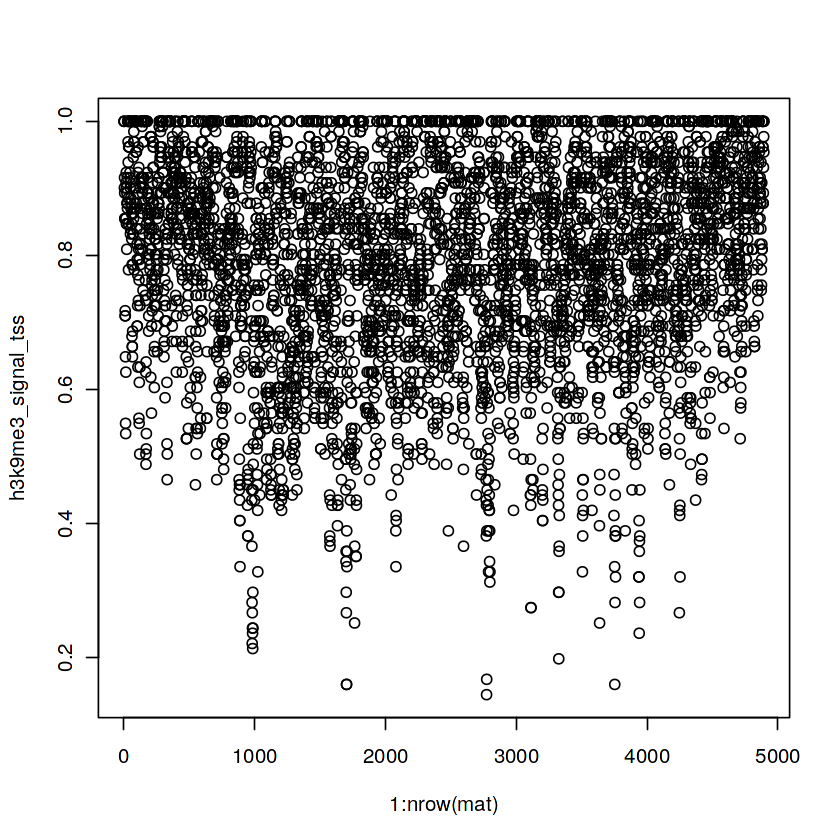

In [46]:
plot(1:nrow(mat), h3k9me3_signal_tss)

In [47]:
plot_selection$H3K9me3_tss_processed = h3k9me3_signal_tss

In [48]:
acr = c("S2", "G2", "G2/M")
acr_excluded = c()

y_dashed = plot_selection %>% 
    dplyr::filter(!phase_assigned %in% acr_excluded) %>%
    dplyr::mutate(phase_in_S2_M = phase_assigned %in% acr) %>% 
    dplyr::filter(!phase_in_S2_M) %>% 
    dplyr::pull(H3K9me3_tss_processed) %>% 
    median(na.rm = T)

p = plot_selection %>%
    dplyr::filter(!phase_assigned %in% acr_excluded) %>%
    dplyr::select(phase_assigned, H3K9me3_tss_processed) %>% 
    dplyr::mutate(`H3K9me3` = H3K9me3_tss_processed) %>% 
    dplyr::mutate(phase_in_S2_M = phase_assigned %in% acr) %>%
    ggpubr::ggviolin(x = "phase_in_S2_M", y = "H3K9me3", add = "boxplot") + 
   geom_hline(yintercept = y_dashed, linetype = "dashed") +
    stat_compare_means(label.x = 0.9, label.y = 1.1, step.increase = 1) +
    theme_classic() + 
    theme(axis.ticks.x=element_blank(), axis.line.x = element_blank()) + 
    xlab("") + ylab("H3K9me3 [frac. of prom. covered]") + 
    scale_x_discrete(breaks=c(F, T),
        labels=c("M-to-S1", "S2-to-G2/M"))+
    coord_cartesian(ylim = c(0, 1.2),
                      clip = 'off')

svg('../out/cell_cycle_figures/H3K9me3_tss_processed_stat_test.svg', height = 2.5, width = 2.5)
p
dev.off()

png 
  2

In [49]:
# exporting for romain
plot_selection %>% 
    dplyr::select(ensembl, symbol, H3K9me3_tss_processed) %>% 
    write.table('../out/tables/H3K9me3_tss_median_filtered_frac_covered.tsv', sep = '\t', col.names = T, row.names = F, quote = F)

## Age of TFs assessed for enrichment at rhythmic promoters

In [50]:
gene_metadata %>% head()

chr  start  end    ensembl         strand symbol     isKZFP isC2H2 isTF 
1 chr1  69091  70008 ENSG00000186092 +      OR4F5      FALSE  FALSE  FALSE
2 chr1 134901 139379 ENSG00000237683 -      AL627309.1 FALSE  FALSE  FALSE
3 chr1 367640 368634 ENSG00000235249 +      OR4F29     FALSE  FALSE  FALSE
4 chr1 621059 622053 ENSG00000185097 -      OR4F16     FALSE  FALSE  FALSE
5 chr1 738532 739137 ENSG00000269831 -      AL669831.1 FALSE  FALSE  FALSE
6 chr1 818043 819983 ENSG00000269308 +      AL645608.2 FALSE  FALSE  FALSE
  tf_category ⋯ Tycko_score_avg Age.Years.Coudray Age.Species.Coudray
1 not TF      ⋯ NA              NA                NA                 
2 not TF      ⋯ NA              NA                NA                 
3 not TF      ⋯ NA              NA                NA                 
4 not TF      ⋯ NA              NA                NA                 
5 not TF      ⋯ NA              NA                NA                 
6 not TF      ⋯ NA              NA                NA                 
  gene_Interval.GenOrigin gene_branch.GenOrigin gene_age.GenOrigin
1 352-413                 18                    382               
2 NA                      NA                     NA               
3 16-20                   31                     18               
4 16-20                   31                     18               
5 NA                      NA                     NA               
6 NA                      NA                     NA               
  branch.GenTree clade.GenTree                      age.GenTree age_combined
1 13             Homo Sapiens                        0.0         0.0        
2 13             Homo Sapiens                        0.0         0.0        
3 13             Homo Sapiens                        0.0         0.0        
4 12             Homo Sapiens & Pan Troglodytes LCA  6.1         6.1        
5 NA             NA                                   NA          NA        
6 11             Hominidae                          15.1        15.1

In [51]:
# assigning the gene age to 1) Imbeault, 2) genTree (vertebrates), 3) genOrigin (for older than vertebrates)

In [52]:
# loading enrichment data
in_phase_vs_all_genes_enrichment_long = read.table('../out/tables/TF_binding_enrichment_in_rhythmic_genes_from_each_phase.tsv', sep = '\t', header = T, quote = '')
in_phase_vs_all_genes_enrichment_long %>% head()
in_phase_vs_all_genes_enrichment_long %>% dim()
in_phase_vs_all_genes_enrichment_long %>% dplyr::select(TF_symbol) %>% unique() %>% dim()

TF_symbol is_kzfp padj_rhythm phase_assigned stars_rhythm RepliTiming
1 ADNP      FALSE   0.6466081   G1/S                        S1         
2 ADNP      FALSE   0.6466081   G1/S                        S1         
3 ADNP      FALSE   0.6466081   G1/S                        S1         
4 ADNP      FALSE   0.6466081   G1/S                        S1         
5 ADNP      FALSE   0.6466081   G1/S                        S1         
6 ADNP      FALSE   0.6466081   G1/S                        S1         
  median_rank_signif_pval best_rank_signif_pval median_rank_signif_padj
1 365.75                  46                    406.75                 
2 365.75                  46                    406.75                 
3 365.75                  46                    406.75                 
4 365.75                  46                    406.75                 
5 365.75                  46                    406.75                 
6 365.75                  46                    406.75                 
  best_rank_signif_padj pval_enrich_min promoters_active_in_phase pval_enrich 
1 275                   2.408072e-05    M                         0.0010482790
2 275                   2.408072e-05    G2                        0.0007824965
3 275                   2.408072e-05    eG1                       1.0000000000
4 275                   2.408072e-05    S1                        1.0000000000
5 275                   2.408072e-05    G1/S                      1.0000000000
6 275                   2.408072e-05    G2/M                      0.0179941412
  padj_enrich rank  specificity n_promoters_bound
1 0.006108870  46.0 8.8423913   1189             
2 0.004646158 331.0 1.2288520   1189             
3 1.000000000 399.0 1.0194236   1189             
4 1.000000000 446.5 0.9109742   1189             
5 1.000000000 421.5 0.9650059   1189             
6 0.085617068 554.5 0.7335437   1189

[1] 6352   17

[1] 794   1

In [53]:
gene_metadata_TF = gene_metadata %>% dplyr::filter(symbol %in% in_phase_vs_all_genes_enrichment_long$TF_symbol)

In [54]:
in_phase_vs_all_genes_enrichment_long = in_phase_vs_all_genes_enrichment_long %>% 
    dplyr::mutate(promoters_active_in_phase = factor(promoters_active_in_phase, levels = c("eG1", "lG1", "G1/S", "S1", "S2", "G2", "G2/M", "M")))

In [55]:
#gene_metadata_TF$age_category = cut(gene_metadata_TF$age_combined, breaks = c(-Inf, 25, 50, 100, 250, 500, 1000, 2000, Inf))

In [56]:
gene_metadata_TF$age_category = cut(gene_metadata_TF$age_combined, breaks = c(-Inf, 50, 250, 1000, Inf))


In [57]:
gene_metadata_TF$age_category %>% levels()

[1] "(-Inf,50]"    "(50,250]"     "(250,1e+03]"  "(1e+03, Inf]"

In [58]:
gene_metadata_TF %>% dplyr::filter(symbol == "ZNF8")

chr   start    end      ensembl         strand symbol isKZFP isC2H2 isTF
1 chr19 58790317 58807254 ENSG00000083842 +      ZNF8   TRUE   TRUE   TRUE
2 chr19 58790318 58807254 ENSG00000273439 +      ZNF8   TRUE   TRUE   TRUE
  tf_category ⋯ Age.Years.Coudray Age.Species.Coudray gene_Interval.GenOrigin
1 KZFP        ⋯ NA                NA                  177-312                
2 KZFP        ⋯ NA                NA                  177-312                
  gene_branch.GenOrigin gene_age.GenOrigin branch.GenTree clade.GenTree
1 20                    244                 4             Theria       
2 20                    244                NA             NA           
  age.GenTree age_combined age_category
1 176.1       176.1        (50,250]    
2    NA       244.0        (50,250]

In [59]:
gene_metadata_TF %>% dim()
gene_metadata_TF = gene_metadata_TF %>% dplyr::filter(!((symbol == "ZNF8") & (ensembl == "ENSG00000273439")))
gene_metadata_TF %>% dim()

[1] 790  53

[1] 789  53

In [60]:
to_plot = in_phase_vs_all_genes_enrichment_long %>% dplyr::left_join(., gene_metadata_TF %>% 
    dplyr::select(symbol, age_combined, tf_category, isC2H2, isKZFP, age_category) %>%
    unique(), by = c("TF_symbol" = "symbol")) %>% 
    dplyr::filter(!age_category == "NA") %>%
    dplyr::group_by(TF_symbol) %>% 
   slice_max(specificity, n = 1, with_ties = F)

In [61]:
to_plot %>% head()

TF_symbol is_kzfp padj_rhythm phase_assigned stars_rhythm RepliTiming
1 ADNP      FALSE   0.646608128 G1/S                        S1         
2 AFF1      FALSE   0.302116440 G2                          S1         
3 AFF4      FALSE   0.106382490 eG1                         G1         
4 AGO1      FALSE   0.131728867 G2                          S1         
5 ARHGAP35  FALSE   0.000374730 G2             ***          G1         
6 ARID1B    FALSE   0.007377017 G2             **           S2         
  median_rank_signif_pval best_rank_signif_pval median_rank_signif_padj
1 365.75                   46                   406.75                 
2 399.75                   51                   397.50                 
3 311.75                   36                   397.50                 
4 313.25                   93                   397.50                 
5 436.25                  345                   421.50                 
6 302.25                   60                   397.50                 
  best_rank_signif_padj ⋯ pval_enrich  padj_enrich  rank specificity
1 275.0                 ⋯ 1.048279e-03 6.108870e-03  46   8.842391  
2  51.0                 ⋯ 2.445281e-17 7.924706e-16  51   7.794118  
3  36.0                 ⋯ 7.553559e-19 3.075654e-17  36  11.041667  
4 110.0                 ⋯ 9.231462e-17 2.714734e-15 110   3.613636  
5 397.5                 ⋯ 3.258967e-03 1.757297e-02 345   1.221739  
6  61.0                 ⋯ 3.547199e-03 1.896617e-02  60   6.625000  
  n_promoters_bound age_combined tf_category isC2H2 isKZFP age_category
1 1189              645.0        TF          FALSE  FALSE  (250,1e+03] 
2 5442              361.2        not TF      FALSE  FALSE  (250,1e+03] 
3 3751              544.0        not TF      FALSE  FALSE  (250,1e+03] 
4 4595              544.0        not TF      FALSE  FALSE  (250,1e+03] 
5  331              680.0        TF          FALSE  FALSE  (250,1e+03] 
6 5904              950.0        not TF      FALSE  FALSE  (250,1e+03]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


svg 
  3

png 
  2

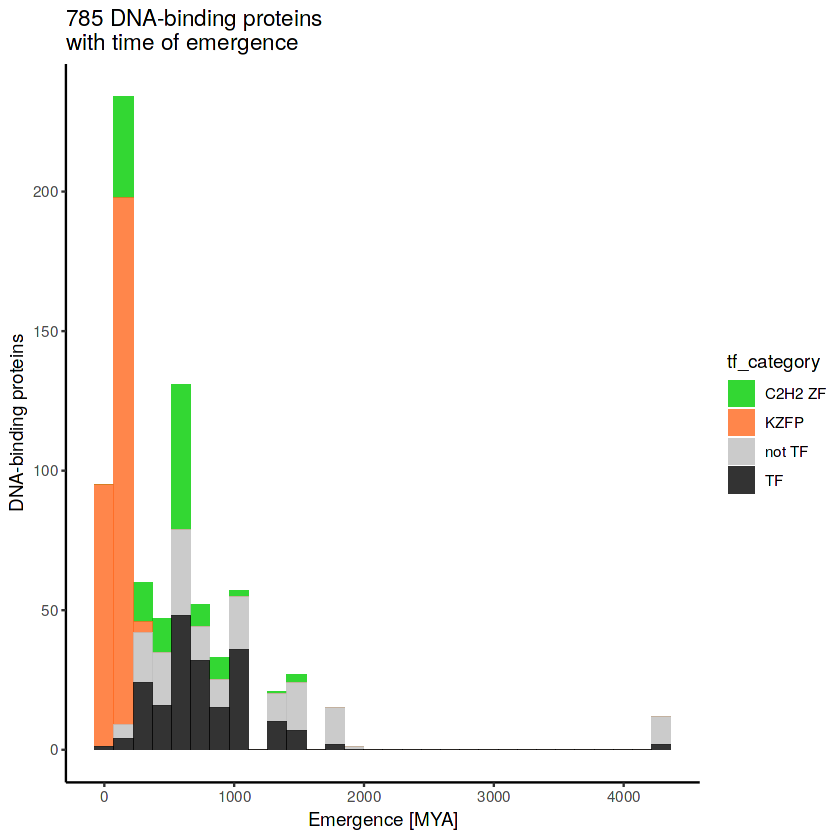

In [62]:
to_plot$block = ifelse(to_plot$age_combined <=1000, yes = "A", no = "B")

to_plot %>%
ggplot(aes(x = age_combined, fill = tf_category)) + 
geom_histogram(alpha = 0.8) +
#+ facet_grid(.~block, scales = "free_x", space = "free_x", ) +
theme_classic() + 
labs(x = "Emergence [MYA]", y = "DNA-binding proteins", title = paste0(as.character(nrow(to_plot)), " DNA-binding proteins\nwith time of emergence")) + 
scale_fill_manual(values = c("green3", "#FF681F", "grey", "black"))
dev.copy(svg, '../out/cell_cycle_figures/KZFP_age_histogram.svg', height = 3, width = 4)
dev.off()

## Over-representation of old TFs in phase specific TFs

In [63]:
for_enrichment = in_phase_vs_all_genes_enrichment_long %>% dplyr::left_join(., gene_metadata_TF %>% 
    dplyr::select(symbol, age_combined, tf_category, isC2H2, isKZFP, age_category) %>%
    unique(), by = c("TF_symbol" = "symbol")) %>% 
    dplyr::filter(!age_category == "NA") %>%
    dplyr::group_by(TF_symbol) %>% 
    slice_min(pval_enrich_min, n = 1, with_ties = F)
for_enrichment %>% head()
for_enrichment %>% dim()

TF_symbol is_kzfp padj_rhythm phase_assigned stars_rhythm RepliTiming
1 ADNP      FALSE   0.646608128 G1/S                        S1         
2 AFF1      FALSE   0.302116440 G2                          S1         
3 AFF4      FALSE   0.106382490 eG1                         G1         
4 AGO1      FALSE   0.131728867 G2                          S1         
5 ARHGAP35  FALSE   0.000374730 G2             ***          G1         
6 ARID1B    FALSE   0.007377017 G2             **           S2         
  median_rank_signif_pval best_rank_signif_pval median_rank_signif_padj
1 365.75                   46                   406.75                 
2 399.75                   51                   397.50                 
3 311.75                   36                   397.50                 
4 313.25                   93                   397.50                 
5 436.25                  345                   421.50                 
6 302.25                   60                   397.50                 
  best_rank_signif_padj ⋯ pval_enrich padj_enrich rank  specificity
1 275.0                 ⋯ 0.001048279 0.00610887   46.0 8.8423913  
2  51.0                 ⋯ 1.000000000 1.00000000  432.5 0.9190751  
3  36.0                 ⋯ 1.000000000 1.00000000  432.5 0.9190751  
4 110.0                 ⋯ 0.041453239 0.18569180  432.5 0.9190751  
5 397.5                 ⋯ 1.000000000 1.00000000  432.5 0.9745665  
6  61.0                 ⋯ 0.003547199 0.01896617   60.0 6.6250000  
  n_promoters_bound age_combined tf_category isC2H2 isKZFP age_category
1 1189              645.0        TF          FALSE  FALSE  (250,1e+03] 
2 5442              361.2        not TF      FALSE  FALSE  (250,1e+03] 
3 3751              544.0        not TF      FALSE  FALSE  (250,1e+03] 
4 4595              544.0        not TF      FALSE  FALSE  (250,1e+03] 
5  331              680.0        TF          FALSE  FALSE  (250,1e+03] 
6 5904              950.0        not TF      FALSE  FALSE  (250,1e+03]

[1] 785  22

In [64]:
age_threshold = 450

In [65]:
x_observed = for_enrichment %>% dplyr::filter(age_combined > age_threshold, pval_enrich_min <= 0.05) %>% nrow()
m = for_enrichment %>% dplyr::filter(pval_enrich_min <= 0.05) %>% nrow()
n = for_enrichment %>% dplyr::filter(pval_enrich_min > 0.05) %>% nrow()

k = for_enrichment %>% dplyr::filter(age_combined > age_threshold) %>% nrow()

x = 0:m # is the variable tested
probs <- dhyper(x, m, n, k, log = FALSE)


# we compute the probability of observing a more extreme enrichment, therefore using a one sided test. 
pval_one_sided = sum(probs[x>=x_observed])

# we make the test two-sided, by summing the probabilities that are smaller or equal to our pval
pval_two_sided = sum(probs[probs <= pval_one_sided])

pval_two_sided

[1] 1.702361e-38

svg 
  3

png 
  2

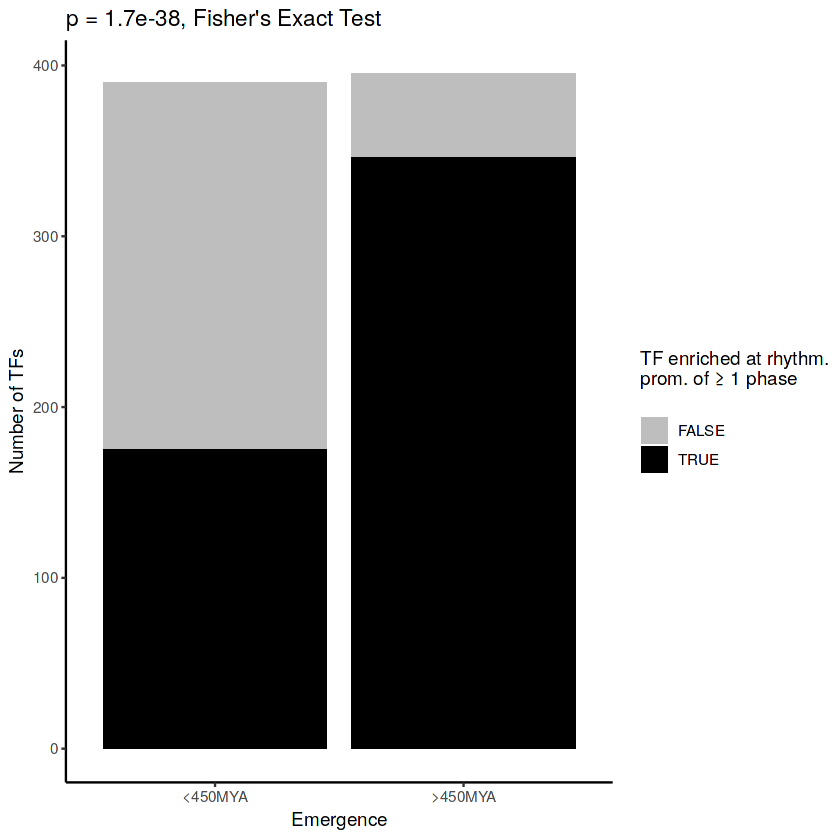

In [66]:
in_phase_vs_all_genes_enrichment_long %>% dplyr::left_join(., gene_metadata_TF %>% 
    dplyr::select(symbol, age_combined, tf_category, isC2H2, isKZFP, age_category) %>%
    unique(), by = c("TF_symbol" = "symbol")) %>% 
    dplyr::filter(!age_category == "NA") %>%
    dplyr::group_by(TF_symbol) %>% 
    slice_min(pval_enrich_min, n = 1, with_ties = F) %>%
ggplot(aes(x = age_combined > age_threshold, fill = pval_enrich_min < 0.05)) + 
geom_bar() +
# legend
labs(title = paste0("p = ", format(pval_two_sided, scientific = T, digits = 2), ", Fisher's Exact Test"), x = "Emergence", y = "Number of TFs", fill = "TF enriched at rhythm.\nprom. of \u2265 1 phase\n") +
scale_fill_manual(labels = c("FALSE", "TRUE"), values = c("grey", "black")) +
scale_x_discrete(labels=c(paste0("<", age_threshold,"MYA"), paste0(">", age_threshold, "MYA"))) + 
theme_classic()
dev.copy(svg, '../out/cell_cycle_figures/TF_enrichment_at_rhythmic_proms_vs_age_Fisher_test.svg', height = 2.2, width = 3.8)
dev.off()

## Age of TFs vs enrichment for binding promoters of rhythmic genes

In [67]:
to_plot %>% head()

TF_symbol is_kzfp padj_rhythm phase_assigned stars_rhythm RepliTiming
1 ADNP      FALSE   0.646608128 G1/S                        S1         
2 AFF1      FALSE   0.302116440 G2                          S1         
3 AFF4      FALSE   0.106382490 eG1                         G1         
4 AGO1      FALSE   0.131728867 G2                          S1         
5 ARHGAP35  FALSE   0.000374730 G2             ***          G1         
6 ARID1B    FALSE   0.007377017 G2             **           S2         
  median_rank_signif_pval best_rank_signif_pval median_rank_signif_padj
1 365.75                   46                   406.75                 
2 399.75                   51                   397.50                 
3 311.75                   36                   397.50                 
4 313.25                   93                   397.50                 
5 436.25                  345                   421.50                 
6 302.25                   60                   397.50                 
  best_rank_signif_padj ⋯ padj_enrich  rank specificity n_promoters_bound
1 275.0                 ⋯ 6.108870e-03  46   8.842391   1189             
2  51.0                 ⋯ 7.924706e-16  51   7.794118   5442             
3  36.0                 ⋯ 3.075654e-17  36  11.041667   3751             
4 110.0                 ⋯ 2.714734e-15 110   3.613636   4595             
5 397.5                 ⋯ 1.757297e-02 345   1.221739    331             
6  61.0                 ⋯ 1.896617e-02  60   6.625000   5904             
  age_combined tf_category isC2H2 isKZFP age_category block
1 645.0        TF          FALSE  FALSE  (250,1e+03]  A    
2 361.2        not TF      FALSE  FALSE  (250,1e+03]  A    
3 544.0        not TF      FALSE  FALSE  (250,1e+03]  A    
4 544.0        not TF      FALSE  FALSE  (250,1e+03]  A    
5 680.0        TF          FALSE  FALSE  (250,1e+03]  A    
6 950.0        not TF      FALSE  FALSE  (250,1e+03]  A

In [68]:
to_plot$age_category = cut(to_plot$age_combined, breaks = c(-Inf, 50, 250, 1000, Inf))

Warning message in ggrepel::geom_text_repel(aes(x = age_category, y = log2(specificity), :
“Ignoring unknown parameters: `label.size` and `fill`”


svg 
  3

png 
  2

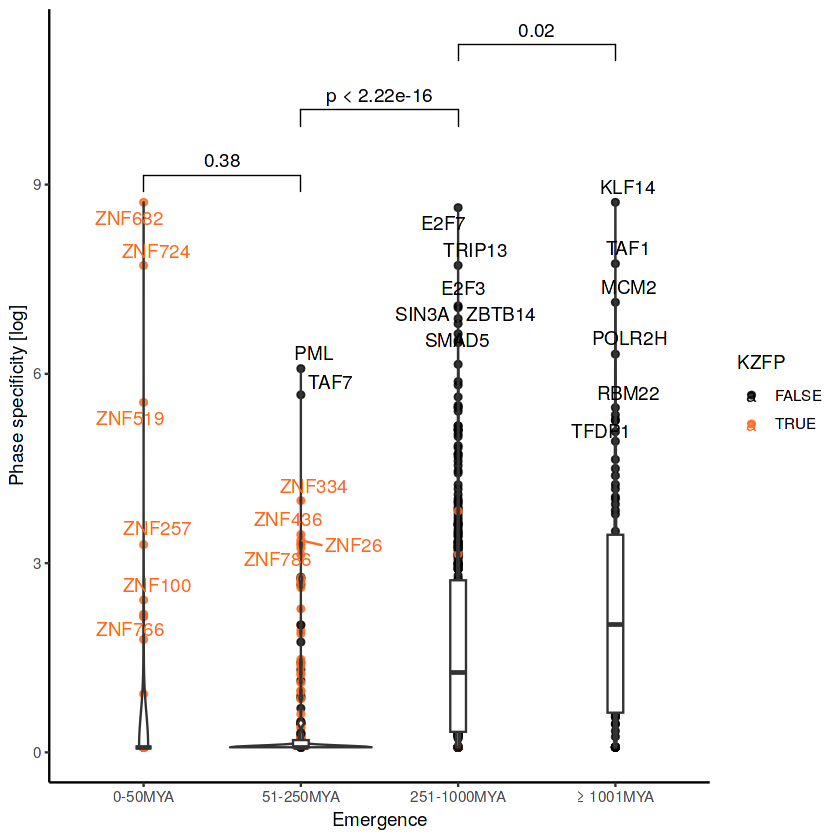

In [69]:
to_plot %>% ggplot(aes(x = age_category, y = log2(specificity))) + 
    geom_point(aes(col = isKZFP), alpha = 0.8) + 
    geom_violin() + 
    geom_boxplot(width = 0.1, outliers = F) + 
    ggpubr::stat_compare_means(comparisons = list(c(1, 2), c(2, 3), c(3, 4)), method = "wilcox.test") + 
    theme_classic() + 
    scale_color_manual(values = c("black", "#FF681F")) + 
    ggrepel::geom_text_repel(aes(x = age_category, y = log2(specificity), label = TF_symbol, col = is_kzfp),
                              data = to_plot %>% group_by(age_category) %>% slice_max(specificity, n = 6),
                              label.size = 0, fill = alpha(c("white"),0), max.overlaps = 10, seed = 1, force = 5) +
    labs(x = "Emergence", y = "Phase specificity [log]", col = "KZFP") +
    scale_x_discrete(labels=c("0-50MYA", "51-250MYA", "251-1000MYA", "\u2265 1001MYA"))
   

dev.copy(svg, '../out/cell_cycle_figures/specificity_vs_age.svg', height = 4, width = 5.5)
dev.off()

## TF binding enrichment at promoters of rhythmic genes

### Focus on G1/S

In [317]:
## x axis: -log10(padj) instead of rank
to_plot = in_phase_vs_all_genes_enrichment_long %>% 
    dplyr::filter(promoters_active_in_phase %in% c("G1/S")) %>%
    dplyr::filter(padj_enrich < 0.05) %>%
    # for labelling KZFPs better
    dplyr::group_by(promoters_active_in_phase) %>% 
    dplyr::mutate(thresh_label_padj = sort(padj_enrich)[8],
                 thresh_label_spec = sort(specificity, decreasing = T)[4])  %>%
    dplyr::mutate(TF_symbol_label = ifelse((padj_enrich<=thresh_label_padj | specificity >= thresh_label_spec | promoters_active_in_phase == "eG1" | is_kzfp | TF_symbol %in% c("RB1", "TFDP1", "E2F1", "E2F2", "E2F3", "E2F4")), TF_symbol, "")) %>%
    dplyr::ungroup()

In [318]:
p = to_plot %>%
    ggplot(aes(x = -log10(padj_enrich), y = log2(specificity), label = TF_symbol, col = is_kzfp, size = n_promoters_bound)) + 
    #ggrastr::geom_point_rast(alpha = 0.8) + 
    geom_point(alpha = 0.8) + 
    ggrepel::geom_text_repel(aes(x = -log10(padj_enrich), y = log2(specificity), label = TF_symbol_label, col = is_kzfp),
                              min.segment.length = 0, segment.alpha = 0.8, size = 3.5, label.size = 0, fill = alpha(c("white"),0), max.overlaps = 50, box.padding = 0.3, seed = 2, force = 30) + 
    ylab("Phase specificity [log]") + 
    xlab("-log10(adj. p)") +
    theme_classic() +
    #theme(legend.position = "none") + 
    guides(color = "none") +
    scale_size(name = "Nr. bound prom.", breaks = c(10, 100, 1000, 10000), range = c(1, 3.5)) +
    scale_color_manual(values = c("black", "#FF681F"))

Warning message in ggrepel::geom_text_repel(aes(x = -log10(padj_enrich), y = log2(specificity), :
“Ignoring unknown parameters: `label.size` and `fill`”


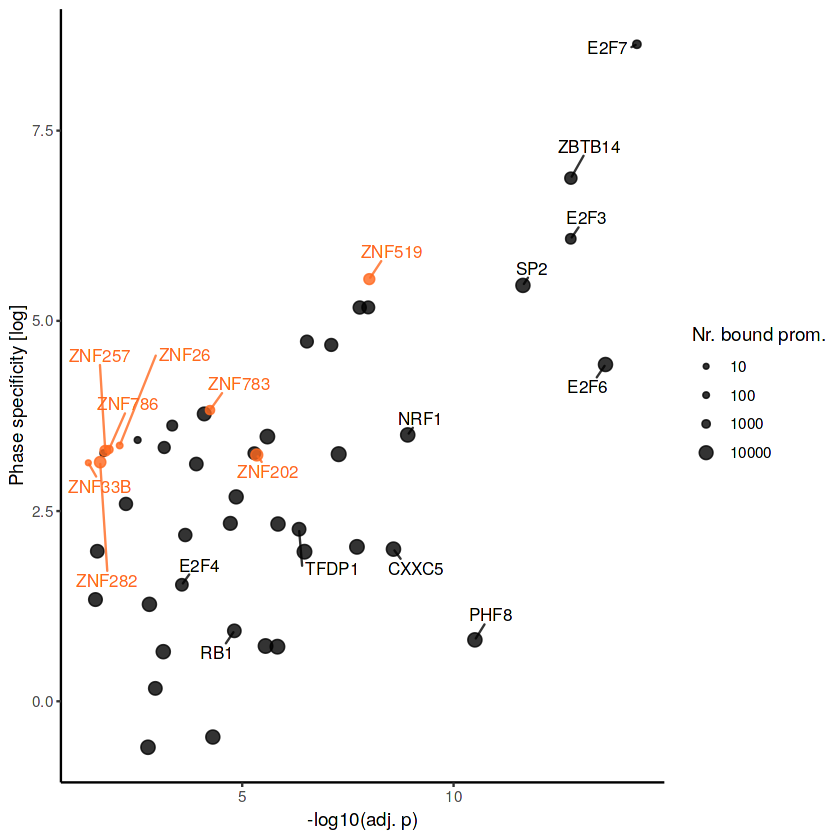

In [319]:
p

In [320]:
ggsave('../out/cell_cycle_figures/specialization_vs_log10padj_all_TFs_G1_S.svg', p, svg, width = 4.5, height = 3.5)

In [74]:
to_plot %>% arrange(desc(specificity)) %>% head(10)

TF_symbol is_kzfp padj_rhythm  phase_assigned stars_rhythm RepliTiming
1  E2F7      FALSE   9.010316e-07 S1             ***          S3         
2  ZBTB14    FALSE   5.925765e-08 G1/S           ***          S4         
3  E2F3      FALSE   4.044877e-01 S1                          S1         
4  ZNF519     TRUE   5.494173e-04 G1/S           ***          S4         
5  SP2       FALSE   1.062406e-04 S1             ***          G1         
6  KLF15     FALSE   2.037073e-03 S1             **           S3         
7  SP4       FALSE   1.492219e-06 G1/S           ***          S4         
8  MGA       FALSE   4.719243e-01 S2                          S1         
9  ZFP64     FALSE   1.777465e-02 M              *            S3         
10 E2F6      FALSE   2.097915e-02 S2             *            S1         
   median_rank_signif_pval best_rank_signif_pval median_rank_signif_padj
1  399.75                   1                    397.50                 
2  353.25                   3                    352.25                 
3  271.25                   2                    270.25                 
4  454.50                   9                    421.25                 
5  221.00                   5                    221.00                 
6  322.00                  10                    361.75                 
7  180.00                  11                    397.50                 
8  396.25                  15                    397.50                 
9  295.00                  14                    359.75                 
10  43.00                   2                     43.00                 
   best_rank_signif_padj pval_enrich_min promoters_active_in_phase pval_enrich 
1   1.0                  1.654944e-46    G1/S                      1.658935e-16
2   3.5                  7.485137e-15    G1/S                      7.485137e-15
3   2.0                  2.041626e-34    G1/S                      7.554011e-15
4   9.5                  8.341050e-10    G1/S                      8.341050e-10
5   5.0                  2.471276e-17    G1/S                      1.180763e-13
6   9.5                  8.881605e-10    G1/S                      8.881605e-10
7  11.0                  2.950699e-12    G1/S                      1.447005e-09
8  15.0                  2.943370e-08    G1/S                      2.943370e-08
9  14.0                  7.379506e-09    G1/S                      7.379506e-09
10  2.0                  1.237549e-24    G1/S                      1.022609e-15
   padj_enrich  rank specificity n_promoters_bound thresh_label_padj
1  4.601553e-15  1   397.50000    1004             2.642531e-09     
2  1.680056e-13  3   117.41667    6238             2.642531e-09     
3  1.689545e-13  4    67.56250    3242             2.642531e-09     
4  9.848020e-09  9    46.80556    4005             2.642531e-09     
5  2.286648e-12  5    44.20000   10731             2.642531e-09     
6  1.042809e-08 10    36.17500    7403             2.642531e-09     
7  1.659093e-08 11    36.13636    8150             2.642531e-09     
8  2.944297e-07 15    26.50000    7422             2.642531e-09     
9  7.825480e-08 14    25.69643    7748             2.642531e-09     
10 2.547299e-14  2    21.50000   10669             2.642531e-09     
   thresh_label_spec TF_symbol_label
1  46.80556          E2F7           
2  46.80556          ZBTB14         
3  46.80556          E2F3           
4  46.80556          ZNF519         
5  46.80556          SP2            
6  46.80556                         
7  46.80556                         
8  46.80556                         
9  46.80556                         
10 46.80556          E2F6

In [75]:
in_phase_vs_all_genes_enrichment_long %>% dplyr::filter(promoters_active_in_phase == "G1/S", TF_symbol == "ZNF519")

TF_symbol is_kzfp padj_rhythm  phase_assigned stars_rhythm RepliTiming
1 ZNF519    TRUE    0.0005494173 G1/S           ***          S4         
  median_rank_signif_pval best_rank_signif_pval median_rank_signif_padj
1 454.5                   9                     421.25                 
  best_rank_signif_padj pval_enrich_min promoters_active_in_phase pval_enrich
1 9.5                   8.34105e-10     G1/S                      8.34105e-10
  padj_enrich rank specificity n_promoters_bound
1 9.84802e-09 9    46.80556    4005

# Fig. 1 supp

## CCNA FACS vs expr.: Romain

## E2F1 expression throughout the eight gates

In [76]:
rhythm_for_plot = read.table('../out/tables/rhythm_for_plot.tsv', sep = '\t', header = T, quote = '')
rhythm_for_plot %>% head()
rhythm_for_plot %>% dplyr::select(symbol) %>% unique() %>% dim()

ensembl         entrez symbol genename                                 chr 
1 ENSG00000187634 148398 SAMD11 sterile alpha motif domain containing 11 chr1
2 ENSG00000187634 148398 SAMD11 sterile alpha motif domain containing 11 chr1
3 ENSG00000187634 148398 SAMD11 sterile alpha motif domain containing 11 chr1
4 ENSG00000187634 148398 SAMD11 sterile alpha motif domain containing 11 chr1
5 ENSG00000187634 148398 SAMD11 sterile alpha motif domain containing 11 chr1
6 ENSG00000187634 148398 SAMD11 sterile alpha motif domain containing 11 chr1
  start  end    strand coding mesor      ⋯ phase_rounded delta    
1 860260 879955 +      TRUE   -0.5981156 ⋯ 7             0.2123308
2 860260 879955 +      TRUE   -0.5981156 ⋯ 7             0.2123308
3 860260 879955 +      TRUE   -0.5981156 ⋯ 7             0.2123308
4 860260 879955 +      TRUE   -0.5981156 ⋯ 7             0.2123308
5 860260 879955 +      TRUE   -0.5981156 ⋯ 7             0.2123308
6 860260 879955 +      TRUE   -0.5981156 ⋯ 7             0.2123308
  phase_assigned tf_category sample_id gate pca_outlier phase_corrected
1 M              not TF      G1_1      1    FALSE       eG1            
2 M              not TF      G1.S_1    2    FALSE       lG1            
3 M              not TF      G2_1      7    FALSE       G2/M           
4 M              not TF      M_1       8    FALSE       M              
5 M              not TF      S1_1      3    FALSE       G1/S           
6 M              not TF      S2_1      4    FALSE       S1             
  norm.counts batch
1 -0.6212601  0    
2  0.1193580  0    
3 -0.6061061  0    
4 -0.3226334  0    
5 -0.7035174  0    
6 -1.3119264  0

[1] 13742     1

In [77]:
plot_rhythmic_expression <- function(g) {
    to_plot = rhythm_for_plot %>% 
        dplyr::filter(!pca_outlier) %>%
        dplyr::filter(symbol == g) %>% 
        dplyr::mutate(batch_corrected = norm.counts - delta)

    fit.phase = to_plot$phase %>% unique()
    fit.acr = to_plot$acrophase %>% unique()
    fit.mesor = to_plot$mesor %>% unique()
    fit.ampl = to_plot$amplitude %>% unique()
    fit.padj = to_plot$padj %>% unique()
    fit.phase_ass = to_plot$phase_assigned %>% unique()
    x_estimation = seq(from = -0.5, to = 7.5, by = 0.1)
    estimated_expr = sapply(x_estimation, function(x) fit.mesor + fit.ampl*(cos(2*pi*x/8+fit.phase)))
    fit.df = data.frame(x_estimation, estimated_expr)

    p = to_plot %>% 
    ggplot(., aes(x = factor(phase_corrected, levels = c("eG1", "lG1", "G1/S", "S1", "S2", "G2", "G2/M", "M")), 
           y = norm.counts)) + 
    geom_point(size = 2, aes(col = factor(batch, levels = c(0, 1))), show.legend = F) + 
    scale_color_manual(values = c("black", "grey")) + 
    theme_classic() + 
    geom_curve(data = to_plot %>% dplyr::filter(batch == 1),
             aes(x = factor(phase_corrected, levels = c("eG1", "lG1", "G1/S", "S1", "S2", "G2", "G2/M", "M")),
                                xend = factor(phase_corrected, levels = c("eG1", "lG1", "G1/S", "S1", "S2", "G2", "G2/M", "M")), 
                                                  y = norm.counts, 
            yend = batch_corrected),
             lty = 3,             
            col = "grey") +
    geom_point(data = to_plot %>% dplyr::filter(batch == 1),
    aes(x = factor(phase_corrected, levels = c("eG1", "lG1", "G1/S", "S1", "S2", "G2", "G2/M", "M")),
        y = batch_corrected),
        col = "black") + 
    labs(x = "Phase", y = "expression [log2]") +
    ggtitle(label = paste0(g, 
                           " | peak phase = ", fit.phase_ass,
                           " | adj. p = ", format(fit.padj, scientific = T, digits = 2))) +
    theme(plot.title = element_text(size=11)) +
    geom_line(data = fit.df, aes(x = x_estimation + 1, estimated_expr)) + 
    geom_hline(yintercept = fit.mesor, lty = 2) + 
    geom_segment(data = data.frame(x = fit.acr + 1, xend = fit.acr + 1, 
                                   y = fit.mesor, yend = fit.mesor + fit.ampl),
                 aes(x = x, xend = xend, y = y, yend = yend),
                 lty = 2
                )
    return(p)
}

svg 
  3

png 
  2

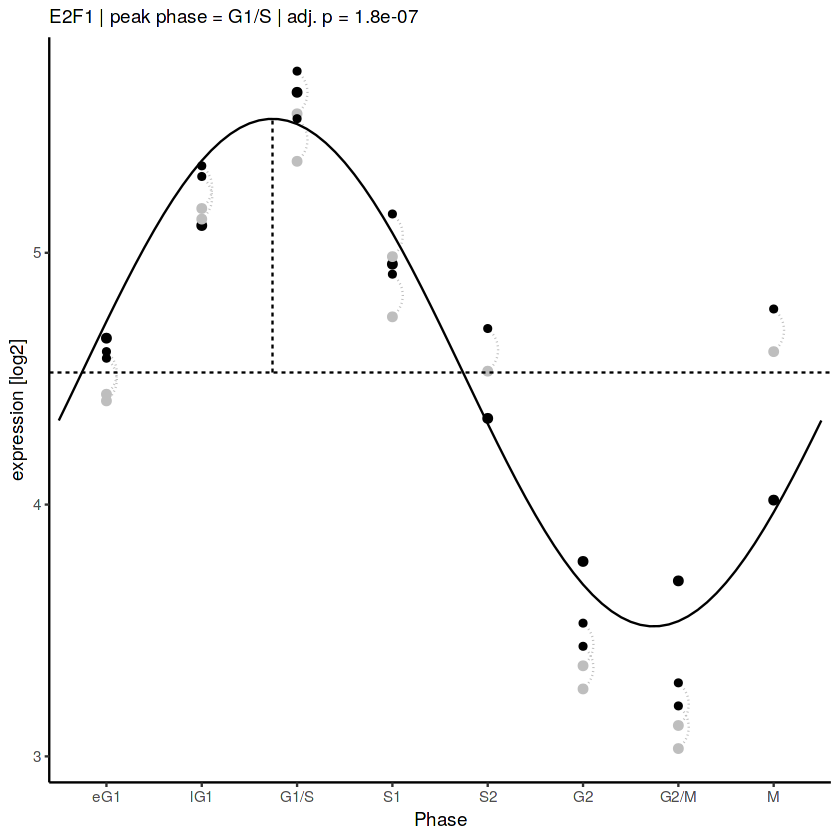

In [78]:
plot_rhythmic_expression("E2F1")
dev.copy(svg, filename = '../out/cell_cycle_figures/E2F1_rhythmic_expr.svg', width = 4, height = 4)
dev.off()

## Correlating phases estimated by Velocycle and the cosinor

In [79]:
sc = read.csv('../data/velocycle_output//cyril_cycle_gene_harmonics_metadata.csv', header = T)
colnames(sc)[1] = "symbol"
sc %>% head()
sc %>% dim()

symbol nu0.mean    nu1sin.mean nu1cos.mean nu0.std    nu1sin.std nu1cos.std
1 AAAS   -1.97800120 -0.25558236 -0.06318688 0.04022840 0.05121274 0.05117498
2 AACS   -1.91206130 -0.05622081 -0.08088822 0.04025723 0.05278615 0.04866394
3 AAED1  -5.32722570 -0.19180533 -0.15918379 0.09084602 0.07207081 0.06413336
4 AAGAB  -0.56366360 -0.10052246 -0.10376552 0.02790650 0.03855828 0.03821687
5 AAK1   -0.02229429  0.14536218  0.02596653 0.02297536 0.03376011 0.03144779
6 AAMDC  -0.38431406  0.09418766  0.14937524 0.02698174 0.03786129 0.03474847
  peak_phase amplitude  is_seurat_marker
1 4.4700220   0.4101655 False           
2 3.7489843  -0.0127841 False           
3 4.0196667   0.2624559 False           
4 3.9111173   0.2745619 False           
5 1.3940272   0.3549721 False           
6 0.5625763   0.3859729 False

[1] 10154    10

In [80]:
merged = dplyr::full_join(rhythm %>% 
                              dplyr::mutate(acrophase_angular = acrophase*(2*pi/8)), 
                          sc, by = c("symbol"), suffix = c("_cosinor", "_velocycle"))
merged %>% dim()

[1] 14712    50

In [81]:
amplitude_threshold = merged$amplitude_velocycle %>% quantile(., probs = 0.90, na.rm = TRUE)
amplitude_threshold

90% 
0.65478

Function to compute the direction (mean angle) of several angles: 
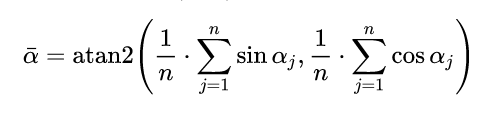

In [82]:
mean_direction <- function(alphas) {
    return(atan2(mean(sin(alphas)), mean(cos(alphas))))
    }

In [83]:
mean_direction(c(2*pi-0.1, 0.1))

[1] 5.578987e-17

In [84]:
merged %>% head()

ensembl         entrez symbol 
1 ENSG00000187634 148398 SAMD11 
2 ENSG00000188976  26155 NOC2L  
3 ENSG00000187961 339451 KLHL17 
4 ENSG00000187583  84069 PLEKHN1
5 ENSG00000187642  84808 PERM1  
6 ENSG00000188290  57801 HES4   
  genename                                                 chr  start  end   
1 sterile alpha motif domain containing 11                 chr1 860260 879955
2 NOC2 like nucleolar associated transcriptional repressor chr1 879584 894689
3 kelch like family member 17                              chr1 895967 901095
4 pleckstrin homology domain containing N1                 chr1 901877 911245
5 PPARGC1 and ESRR induced regulator, muscle 1             chr1 910579 917497
6 hes family bHLH transcription factor 4                   chr1 934342 935552
  strand coding obs ⋯ acrophase_angular nu0.mean   nu1sin.mean nu1cos.mean 
1 +      TRUE   22  ⋯ 5.3607687                 NA          NA           NA
2 -      TRUE   22  ⋯ 4.0961936          0.6890125 -0.04274215 -0.005777875
3 +      TRUE   22  ⋯ 5.4765349         -5.5967830 -0.45002326 -0.237520720
4 +      TRUE   22  ⋯ 6.1868971                 NA          NA           NA
5 -      TRUE   22  ⋯ 0.1611021                 NA          NA           NA
6 -      TRUE   22  ⋯ 2.1422275         -4.0149770 -0.53250240 -0.388456300
  nu0.std    nu1sin.std nu1cos.std peak_phase amplitude_velocycle
1         NA         NA         NA       NA            NA        
2 0.01764766 0.02566483 0.02373841 4.578024   -0.05896686        
3 0.09753588 0.06323726 0.06124472 4.226752    0.61149060        
4         NA         NA         NA       NA            NA        
5         NA         NA         NA       NA            NA        
6 0.06454515 0.05890114 0.06263657 4.082143    0.73426240        
  is_seurat_marker
1 NA              
2 False           
3 False           
4 NA              
5 NA              
6 False

In [85]:
phase_deviations = merged %>% 
    dplyr::filter(amplitude_velocycle > amplitude_threshold, padj < 0.05) %>% 
    dplyr::mutate(a = sin(acrophase_angular - mean_direction(acrophase_angular)), b = sin(peak_phase-mean_direction(peak_phase))) %>% 
    dplyr::select(a, b)

In [86]:
phase_test = cor.test(x = phase_deviations$a, y = phase_deviations$b, method = "spearman")
phase_test$p.value

[1] 0

In [87]:
phase_test$estimate

rho 
0.8416096

In [88]:
phase_test$estimate[["rho"]]

[1] 0.8416096

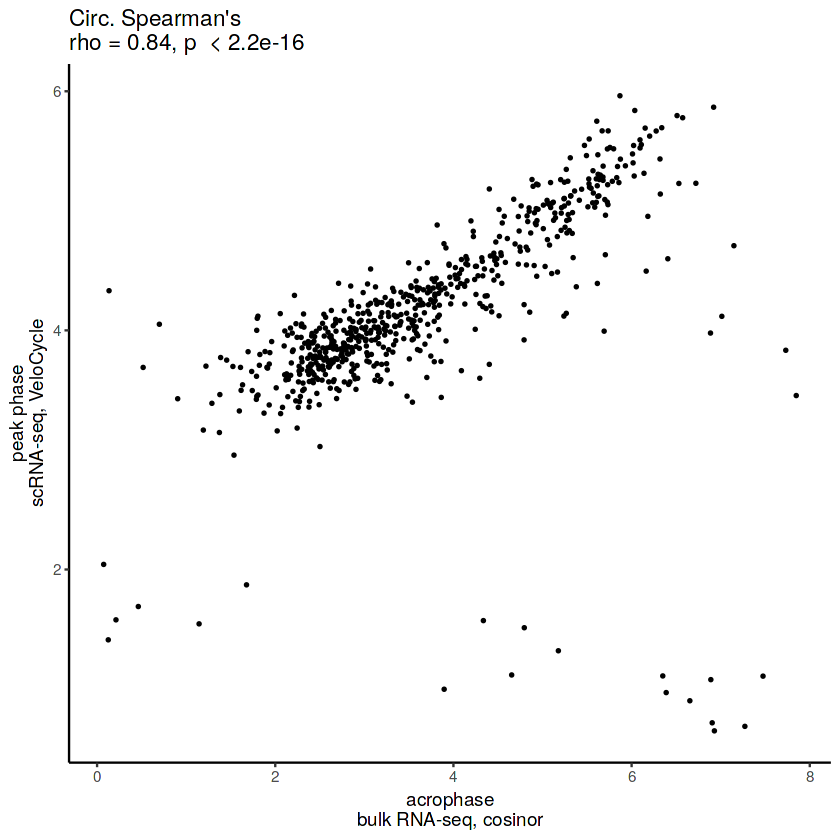

In [316]:
p = merged %>% dplyr::filter(amplitude_velocycle > amplitude_threshold, padj < 0.05) %>% 
    ggplot(aes(x = acrophase, y = peak_phase)) +
    #ggrastr::geom_point_rast(size = 0.5) + 
    geom_point(size = 0.5) +
    theme_classic() + 
    xlab("acrophase\nbulk RNA-seq, cosinor") + 
    ylab("peak phase\nscRNA-seq, VeloCycle") +
    ggtitle(paste0("Circ. Spearman's\nrho = ", 
                   phase_test$estimate[["rho"]] %>% format(., digits = 2),
                   ", p ",
                   ifelse(phase_test$p.value <=2.2e-16,
                         yes = " < 2.2e-16",
                         no = paste0(" = ", phase_test$pvalue))))
p

ggsave("../out/cell_cycle_figures/phase_comparisons_sc_vs_bulk.svg", p, svg, height = 2.5, width = 2.5)

## GO term enrichment in rhythmic genes

In [91]:
rhythm = rhythm %>% dplyr::mutate(phase_assigned = factor(phase_assigned, levels = c("eG1", "lG1", "G1/S", "S1", "S2", "G2", "G2/M", "M")))

In [92]:
GOcluster_per_phase <- clusterProfiler::compareCluster(symbol~phase_assigned, 
                            data = rhythm %>% dplyr::filter(padj < 0.05) %>% dplyr::select(symbol, phase_assigned), 
                            ont = "BP", 
                            keyType = 'SYMBOL',
                            universe = rhythm %>% dplyr::select(symbol) %>% unique() %>% pull(), 
                            OrgDb = org.Hs.eg.db, 
                            fun="enrichGO",
                            pAdjustMethod = "BH",
                            pvalueCutoff  = 0.05,
                            qvalueCutoff  = 0.1,
                            minGSSize = 10,
                            maxGSSize = 100
)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


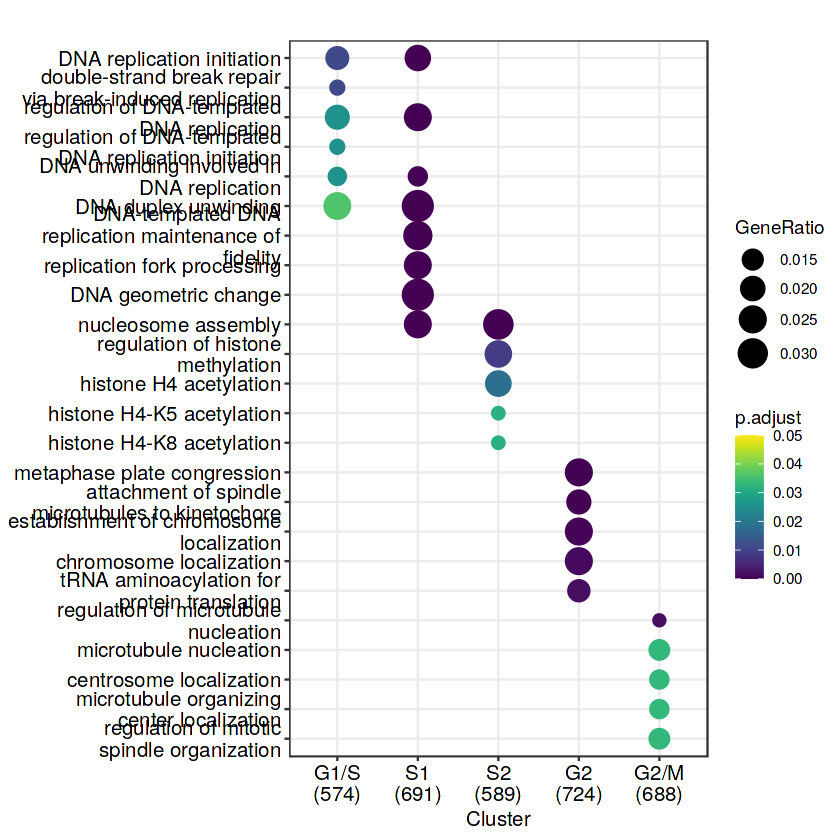

In [93]:
p = clusterProfiler::dotplot(GOcluster_per_phase, showCategory = 5) + 
scale_colour_gradientn(colours = viridis(100), limits=c(0, 0.05))
p

In [94]:
ggsave('../out/cell_cycle_figures/rhythmic_genes_enrichment_per_phase_shortened.svg', p, svg, height = 10, width = 6)

In [95]:
GOcluster_per_phase %>% write.table('../out/tables/TableSupp_GOBP_FigS1E.tsv', sep = '\t', col.names = T, row.names = F, quote = F)

## MESOR, RT, RIF1, H3K9me3 per bin

In [96]:
plot_selection = rhythm %>% 
    dplyr::filter(padj < 0.05) %>%
    dplyr::left_join(., gene_metadata)

Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`


Warning message:
“Removed 20 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 20 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


svg 
  3

png 
  2

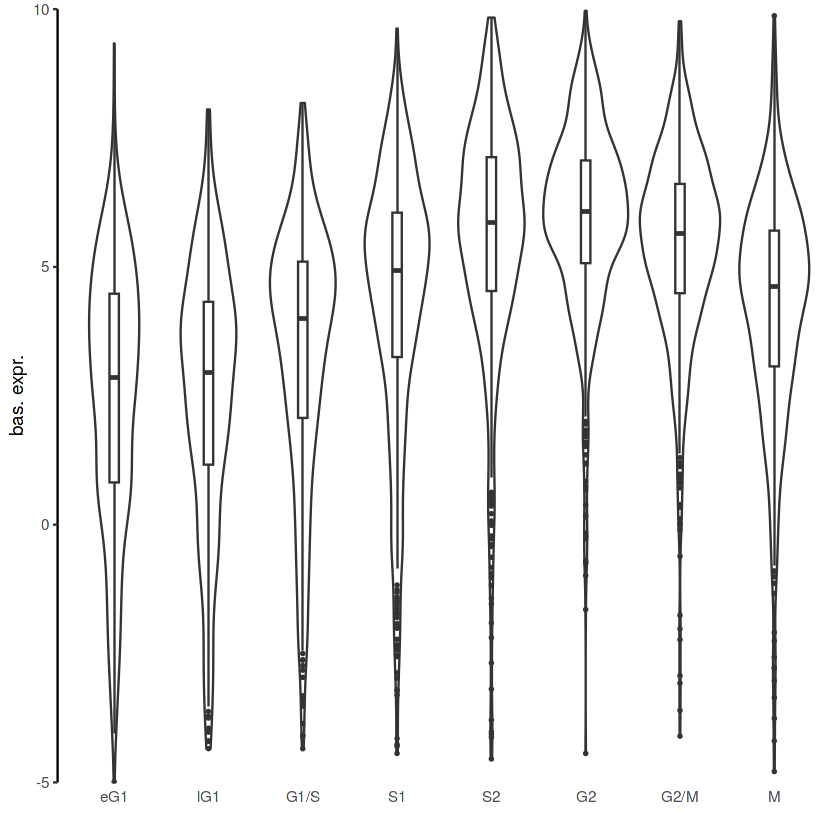

In [97]:
p = plot_selection %>% 
    dplyr::select(phase_assigned, mesor) %>% 
    dplyr::rename(`bas. expr.` = mesor) %>% 
    ggplot(aes(x = phase_assigned, y = `bas. expr.`)) + 
    geom_violin() + 
    geom_boxplot(width=0.1, outlier.size = 0.5) + 
    theme_classic() + 
    theme(axis.ticks.x=element_blank(), axis.line.x = element_blank()) + 
    xlab("") + ylab("bas. expr.") + 
    scale_y_continuous(limits = c(-5,10), expand = c(0, 0))
p
dev.copy(svg, '../out/cell_cycle_figures/bas_expr_per_phase.svg', height = 2.5, width = 4.5)
dev.off()


Warning message:
“Removed 307 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 307 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


svg 
  3

png 
  2

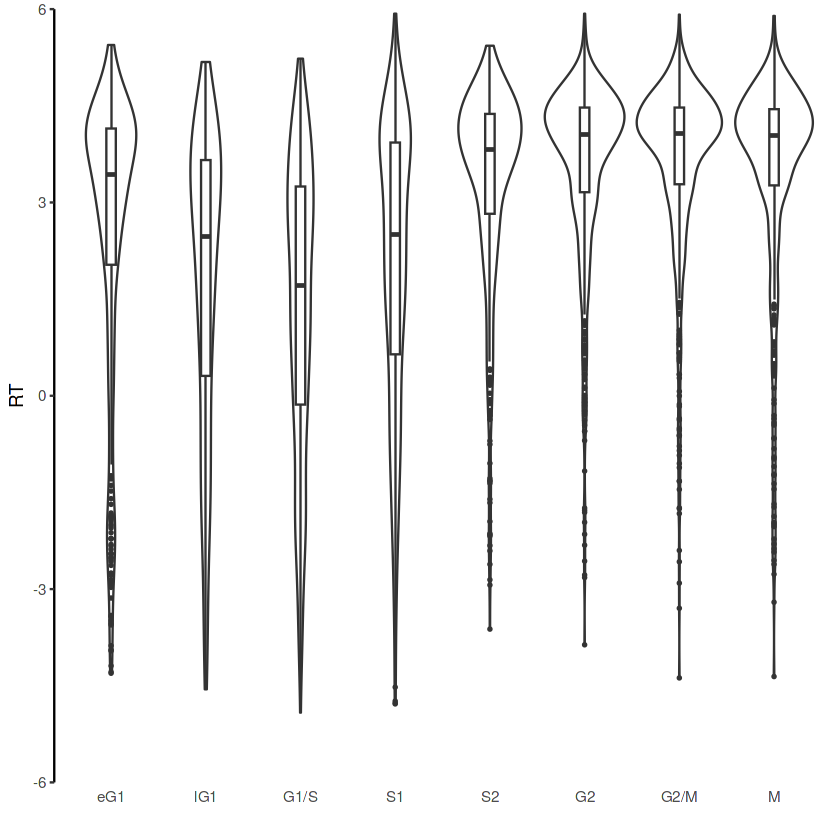

In [98]:
p = plot_selection %>% 
    dplyr::select(phase_assigned, RTindex_K562) %>% 
    dplyr::rename(RT = RTindex_K562) %>% 
    ggplot(aes(x = phase_assigned, y = RT)) + 
    geom_violin() + 
#    geom_jitter(width = 0.2, height = 0, size = 0.3, alpha = 0.3) + 
    geom_boxplot(width=0.1, outlier.size = 0.5) + 
    theme_classic() + 
    theme(axis.ticks.x=element_blank(), axis.line.x = element_blank()) + 
    xlab("") + ylab("RT") + 
    scale_y_continuous(limits = c(-6,6), expand = c(0, 0))
p
dev.copy(svg, '../out/cell_cycle_figures/RTindex_per_phase.svg', height = 2.5, width = 4.5)
dev.off()


Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`
Warning message:
“Removed 315 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 315 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


svg 
  3

png 
  2

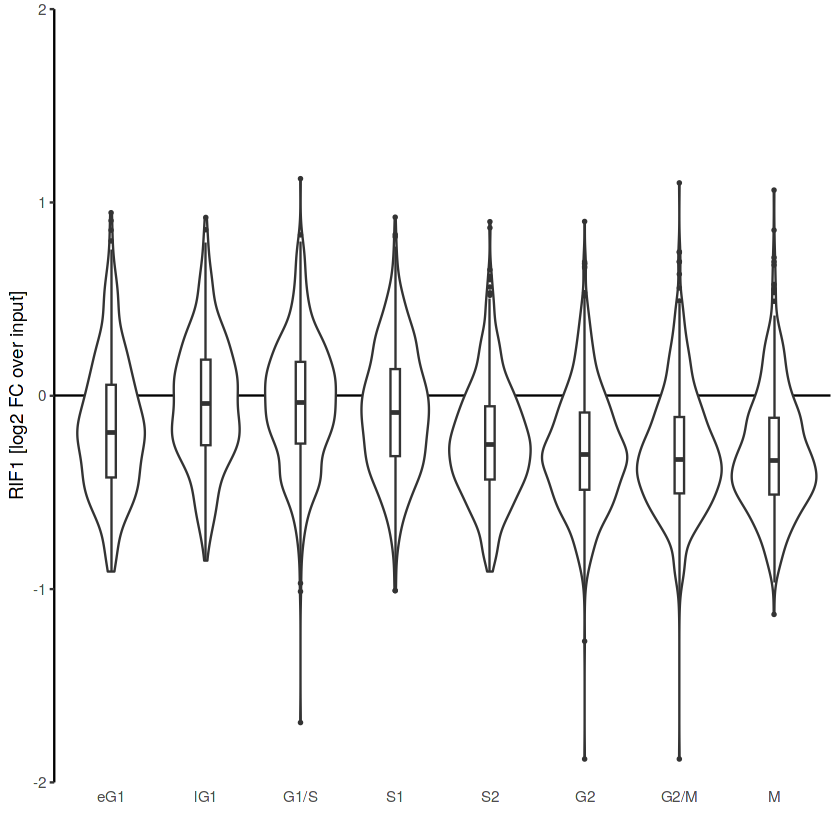

In [99]:
# RIF1
p = rhythm %>% 
    dplyr::filter(padj < 0.05) %>%
    dplyr::left_join(., gene_metadata) %>%
    dplyr::select(phase_assigned, RIF1_tss_body) %>% 
    dplyr::rename(RIF1 = RIF1_tss_body) %>% 
    ggplot(aes(x = phase_assigned, y = RIF1)) + 
    geom_hline(yintercept = 0) +
    geom_violin() + 
    #geom_jitter(width = 0.2, height = 0, size = 0.3, alpha = 0.3) + 
    geom_boxplot(width=0.1, outlier.size = 0.5) + 
    theme_classic() + 
    theme(axis.ticks.x=element_blank(), axis.line.x = element_blank()) + 
    xlab("") + ylab("RIF1 [log2 FC over input]") + 
    scale_y_continuous(limits = c(-2,2), expand = c(0, 0))

p

dev.copy(svg, '../out/cell_cycle_figures/RIF1_per_phase.svg', height = 2.5, width = 4.5)
dev.off()

Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`


svg 
  3

png 
  2

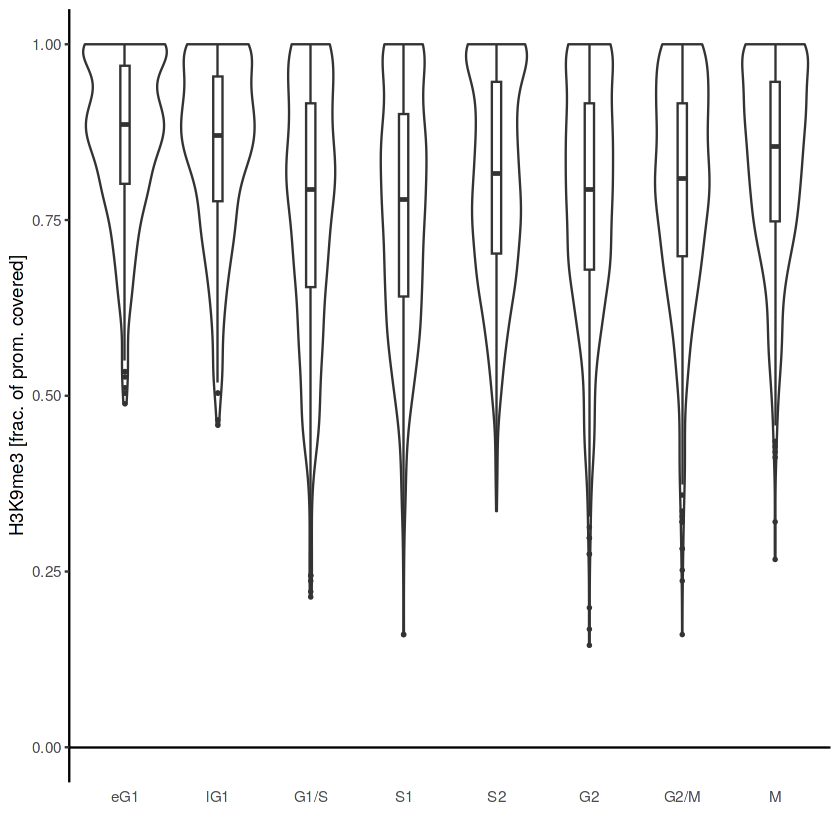

In [100]:
# H3K9me3 coverage at promoter
p = rhythm %>% 
    dplyr::filter(padj < 0.05) %>%
    dplyr::arrange(acrophase) %>%
    dplyr::mutate(H3K9me3 = h3k9me3_signal_tss) %>%
    dplyr::left_join(., gene_metadata) %>%
    dplyr::select(phase_assigned, H3K9me3) %>% 
    ggplot(aes(x = phase_assigned, y = H3K9me3)) + 
    geom_hline(yintercept = 0) +
    geom_violin() + 
    #geom_jitter(width = 0.2, height = 0, size = 0.3, alpha = 0.3) + 
    geom_boxplot(width=0.1, outlier.size = 0.5) + 
    theme_classic() + 
    theme(axis.ticks.x=element_blank(), axis.line.x = element_blank()) + 
    xlab("") + ylab("H3K9me3 [frac. of prom. covered]")
p
dev.copy(svg, '../out/cell_cycle_figures/H3K9me3_signal_per_phase.svg', height = 2.5, width = 4.5)
dev.off()

## GO BP term enriching within TFs enriched at promoters of specific phases

In [101]:
e = clusterProfiler::compareCluster(TF_symbol ~ promoters_active_in_phase,
                              data = in_phase_vs_all_genes_enrichment_long %>% dplyr::filter(padj_enrich < 0.05),
                              OrgDb = "org.Hs.eg.db", 
                              keyType = "SYMBOL",
                              ont = "BP",
                              universe = in_phase_vs_all_genes_enrichment_long %>% pull(TF_symbol) %>% unique(),
                            maxGSSize = 100,
                             )

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


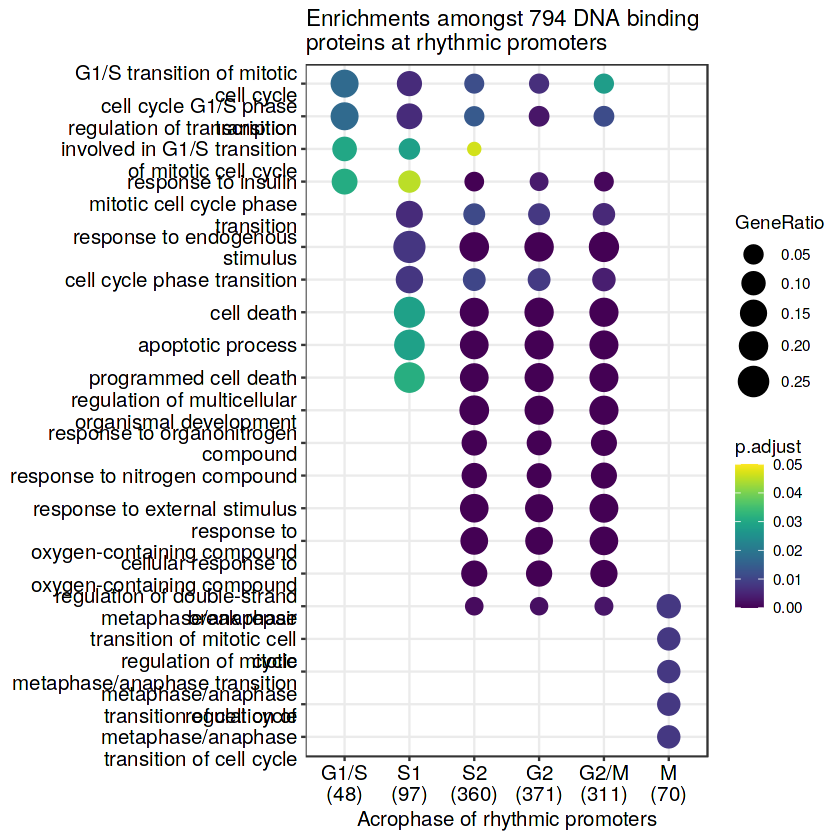

In [102]:
library(viridis)
p = enrichplot::dotplot(e) + 
    scale_colour_gradientn(colours = viridis(100), limits=c(0, 0.05)) + 
    xlab(NULL) +
    xlab("Acrophase of rhythmic promoters") + 
    ggtitle(paste0("Enrichments amongst ", in_phase_vs_all_genes_enrichment_long %>% pull(TF_symbol) %>% unique() %>% length(), " DNA binding\nproteins at rhythmic promoters"))

p

In [103]:
ggsave('../out/cell_cycle_figures/TF_binding_in_rhythmic_promoters_all_TFs_padj.svg', p, svg, height = 9.5, width = 7)

In [104]:
e %>% as.data.frame() %>% write.table('../out/tables/TableSupp_GOBP_FigS1J.tsv', col.names = T, row.names = F, sep = '\t', quote = F)

## TF binding enrichment significance vs specificity for promoters of rhythmic genes in each phase

In [312]:
## x axis: -log10(padj) instead of rank
to_plot = in_phase_vs_all_genes_enrichment_long %>% 
    #dplyr::filter(!promoters_active_in_phase %in% c("eG1", "lG1", "M")) %>%
    dplyr::filter(padj_enrich < 0.05) %>%
    # for labelling KZFPs better
    dplyr::group_by(promoters_active_in_phase) %>% 
    dplyr::mutate(thresh_label_padj = sort(padj_enrich)[8],
                 thresh_label_spec = sort(specificity, decreasing = T)[8])  %>%
    dplyr::mutate(TF_symbol_label = ifelse((padj_enrich<=thresh_label_padj | specificity >= thresh_label_spec | promoters_active_in_phase == "eG1" | is_kzfp), TF_symbol, "")) %>%
    dplyr::ungroup()

In [313]:
p = to_plot %>%
    ggplot(aes(x = -log10(padj_enrich), y = log2(specificity), label = TF_symbol, col = is_kzfp, size = n_promoters_bound)) + 
    #ggrastr::geom_point_rast(alpha = 0.8) + 
    geom_point(alpha = 0.8) + 
    ggrepel::geom_text_repel(aes(x = -log10(padj_enrich), y = log2(specificity), label = TF_symbol_label, col = is_kzfp),
                              min.segment.length = 0, segment.alpha = 0.8, size = 3.5, label.size = 0, fill = alpha(c("white"),0), max.overlaps = 50, box.padding = 0.3, seed = 1) + 
    xlim(c(0, 45)) +
    ylim(c(0, 9)) +
    ylab("Phase specificity [log]") + 
    xlab("-log10(adj. p)") +
    theme_classic() +
    guides(color = "none") +
    scale_size(name = "Nr. bound prom.", breaks = c(10, 100, 1000, 10000), range = c(1, 3.5)) + 
    scale_color_manual(values = c("black", "#FF681F")) + 
    facet_wrap( ~ promoters_active_in_phase, nrow = 2, dir = "h", scales = "free", drop = T)

Warning message in ggrepel::geom_text_repel(aes(x = -log10(padj_enrich), y = log2(specificity), :
“Ignoring unknown parameters: `label.size` and `fill`”


Warning message:
“Removed 41 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 41 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“ggrepel: 31 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 42 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 26 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


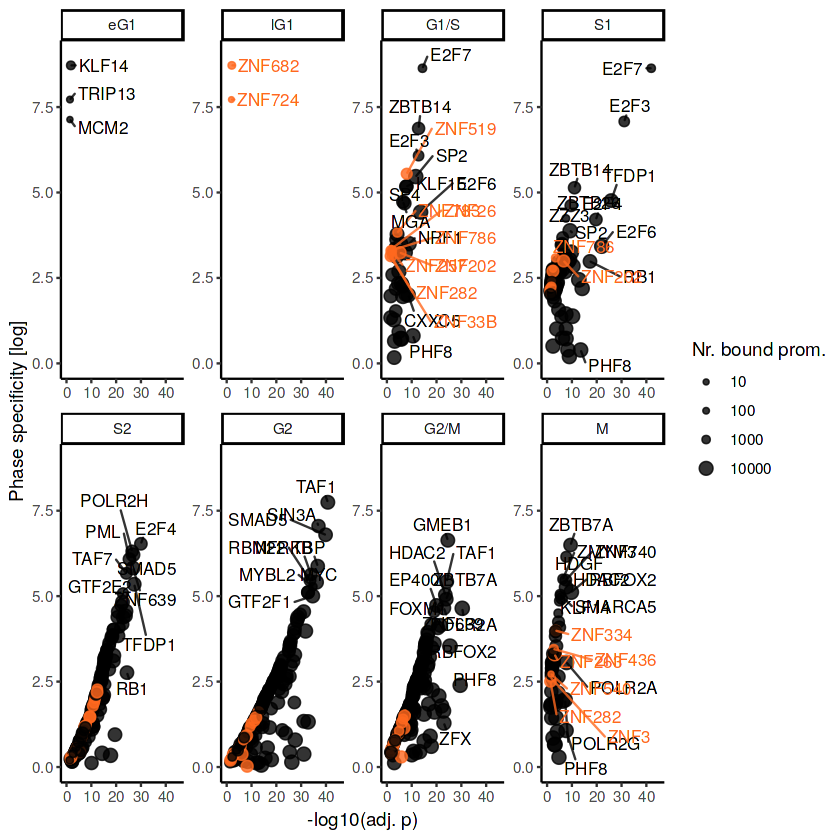

In [314]:
p

In [315]:
ggsave('../out/cell_cycle_figures/specialization_vs_log10padj_all_TFs.svg', p, svg, width = 12, height = 7)

Warning message:
“Removed 41 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 41 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“ggrepel: 31 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 42 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 26 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


## Visualizing the acrophase of TF targets

In [109]:
TF_to_targets = read.table('../out/tables/TFs_to_target_promoters.tsv', sep = '\t', header = T, quote = '')
TF_to_targets %>% head()
TF_to_targets %>% dim()
TF_to_targets$TF_symbol %>% unique() %>% length()


TF_symbol promoter_ensembl promoter_symbol
1 RUNX1     ENSG00000187961  KLHL17         
2 RUNX1     ENSG00000078808  SDF4           
3 RUNX1     ENSG00000176022  B3GALT6        
4 RUNX1     ENSG00000175756  AURKAIP1       
5 RUNX1     ENSG00000160075  SSU72          
6 RUNX1     ENSG00000197530  MIB2

[1] 1863392       3

[1] 794

In [110]:
# density of acrophases in rhythmic targets
plot_target_acrophases <- function(gene_of_interest, padj_threshold = 0.05, bw_adjust = 0.5, padding = T) {


    target_genes = TF_to_targets %>% dplyr::filter(TF_symbol == gene_of_interest)
    
    T = 8
    central_df = rhythm
    left_df = central_df %>% dplyr::mutate(acrophase = acrophase-T)
    right_df = central_df %>% dplyr::mutate(acrophase = acrophase+T)

    padded_df = rbind(left_df, central_df, right_df)
    padding_factor = 3
    bw_adjust_padded = bw_adjust/3
    
    if(!padding) {
        padding_factor = 1
        padded_df = central_df
    bw_adjust_padded = bw_adjust}

    p_dens_line = rbind(padded_df %>% 
        dplyr::filter(padj < padj_threshold, (ensembl %in% target_genes$promoter_ensembl | symbol %in% target_genes$promoter_symbol)) %>%
                        dplyr::mutate(`acr. dens. of` = paste0(gene_of_interest, " targets")),
                        padded_df %>% dplyr::filter(padj < padj_threshold) %>%
                        dplyr::mutate(`acr. dens. of` = "all genes")) %>%
        dplyr::mutate(`acr. dens. of` = factor(`acr. dens. of`, levels = c(paste0(gene_of_interest, " targets"), "all genes"))) %>%
                        
        ggplot(aes(x = acrophase, lty = `acr. dens. of`)) + 
        geom_density(adjust = bw_adjust_padded, key_glyph = draw_key_path) + 
        #geom_density(data = padded_df %>% dplyr::filter(padj < padj_threshold), lty = 2, adjust = bw_adjust_padded) + 
        theme_classic() + 
        theme(axis.ticks.x = element_blank(), 
              axis.text.x = element_blank(), 
              axis.line.y = element_blank(), 
              axis.text.y = element_blank(), 
              axis.ticks.y = element_blank(), 
              axis.title.y = element_blank(), 
              axis.title.x = element_blank(), 
              axis.line.x = element_blank(), 
              legend.position = "right", 
              legend.direction = "horizontal",
             plot.margin = unit(c(0, 0, 0, 0), 
                                    "inches")) +
            scale_x_continuous(name = "acrophase", breaks = seq(from = 0.5, to = 7.5, by = 1), labels = c("eG1", "lG1", "G1/S", "S1", "S2", "G2", "G2/M", "M"), expand = c(0, 0)) + 
        coord_cartesian(xlim=c(0, 8)) + 
        scale_linetype_manual(values = c(1, 2))


    p_dens_col = padded_df %>% 
        dplyr::filter(padj < padj_threshold, (ensembl %in% target_genes$promoter_ensembl | symbol %in% target_genes$promoter_symbol)) %>%
        dplyr::mutate(`acr. dens.` = approxfun(density(acrophase, adjust = bw_adjust_padded))(acrophase)*padding_factor)  %>%
        ggplot(aes(x = acrophase, y = 0)) + 
        geom_point(aes(color = `acr. dens.`), shape = 108, size = 45) + 
        scale_colour_viridis_c() +
        theme_classic() + 
        theme(axis.text.x = element_text(size = 20), 
              axis.line.y = element_blank(), 
              axis.text.y = element_blank(), 
              axis.ticks.y = element_blank(), 
              axis.title.y = element_blank(), 
              axis.title.x = element_blank(), 
              axis.line.x = element_blank(), 
              legend.position = "right", 
              legend.direction = "horizontal",
             plot.margin = unit(c(0, 0, 0, 0), 
                                    "inches")) +
            scale_x_continuous(name = "acrophase", breaks = seq(from = 0.5, to = 7.5, by = 1), labels = c("eG1", "lG1", "G1/S", "S1", "S2", "G2", "G2/M", "M"), expand = c(0, 0)) + 
        scale_linetype_manual(c(1, 2)) +
        coord_cartesian(xlim=c(0, 8), expand=0)


    # combining plots
    pcol = cowplot::plot_grid(p_dens_line + theme(legend.position = "none"), 
                              p_dens_col + theme(legend.position = "none"), 
                              ncol = 1, nrow = 2, rel_heights = c(0.8, 0.2))
    legend1 <- get_legend(p_dens_col)
    legend2 <- get_legend(p_dens_line)
    legends = plot_grid(legend1, legend2, nrow = 1, ncol = 2, rel_widths = c(0.4, 0.6))
    return(plot_grid(pcol, legends, ncol = 1, nrow = 2, rel_heights = c(0.8, 0.2)))
    #return(legend2)
}

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”
Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


svg 
  3

png 
  2

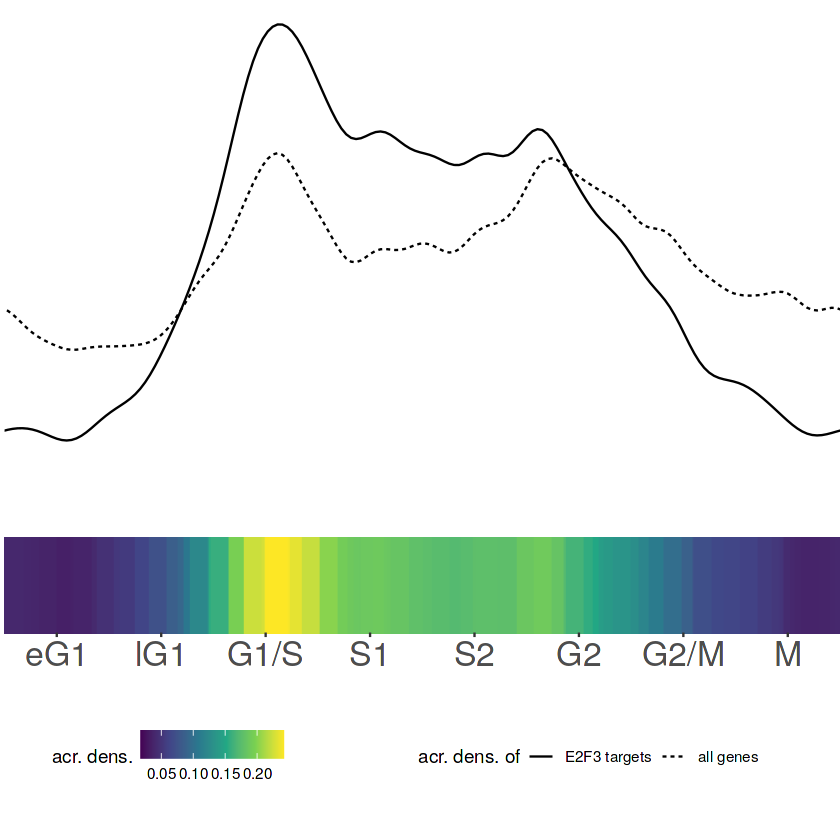

In [111]:
p = plot_target_acrophases("E2F3")
p
dev.copy(svg, '../out/cell_cycle_figures/E2F3_target_acrophase_density.svg', height = 3, width = 5)
dev.off()

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”
Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


svg 
  3

png 
  2

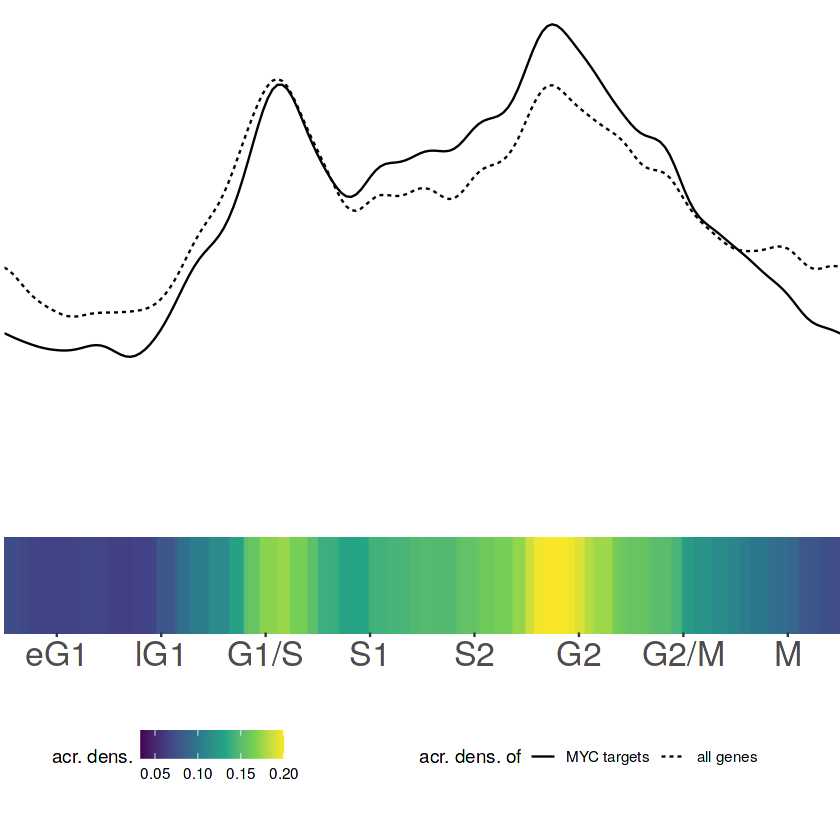

In [112]:
p = plot_target_acrophases("MYC")
p
dev.copy(svg, '../out/cell_cycle_figures/MYC_target_acrophase_density.svg', height = 3, width = 5)
dev.off()

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”
Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


svg 
  3

png 
  2

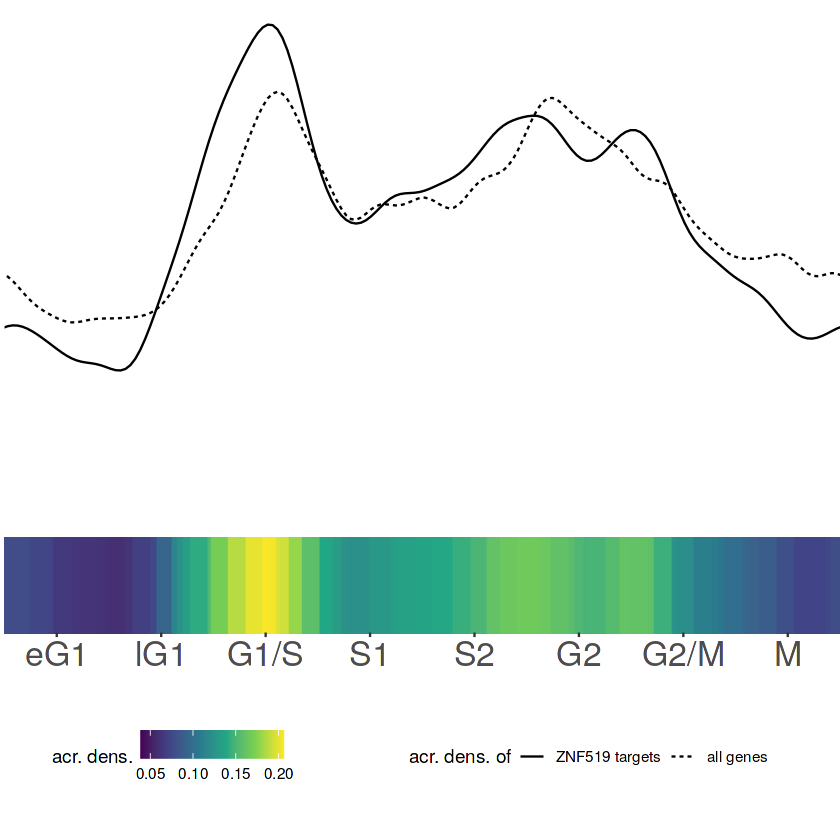

In [113]:
p = plot_target_acrophases("ZNF519")
p
dev.copy(svg, '../out/cell_cycle_figures/ZNF519_target_acrophase_density.svg', height = 3, width = 5)
dev.off()

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”
Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


svg 
  3

png 
  2

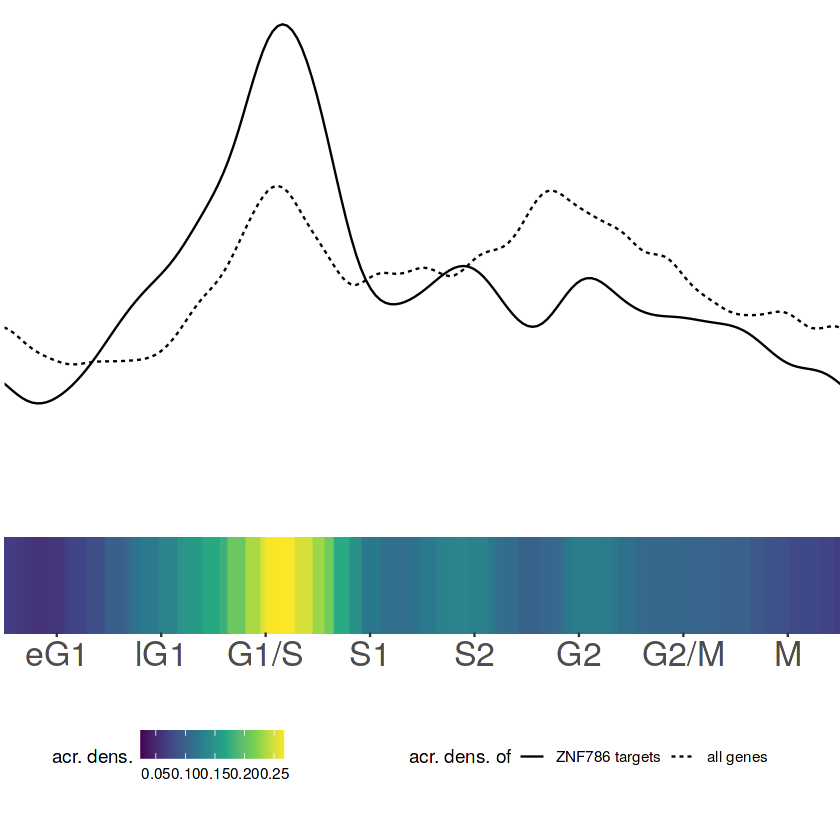

In [114]:
p = plot_target_acrophases("ZNF786")
p
dev.copy(svg, '../out/cell_cycle_figures/ZNF786_target_acrophase_density.svg', height = 3, width = 5)
dev.off()

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”
Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


svg 
  3

png 
  2

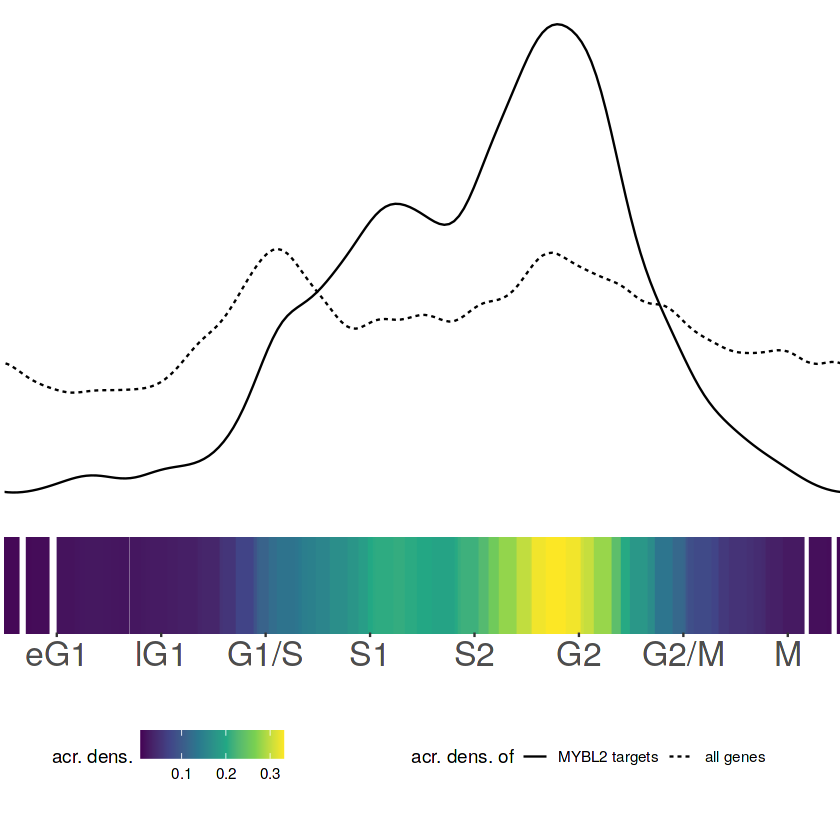

In [115]:
p = plot_target_acrophases("MYBL2")
p
dev.copy(svg, '../out/cell_cycle_figures/MYBL2_target_acrophase_density.svg', height = 3, width = 5)
dev.off()

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”
Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


svg 
  3

png 
  2

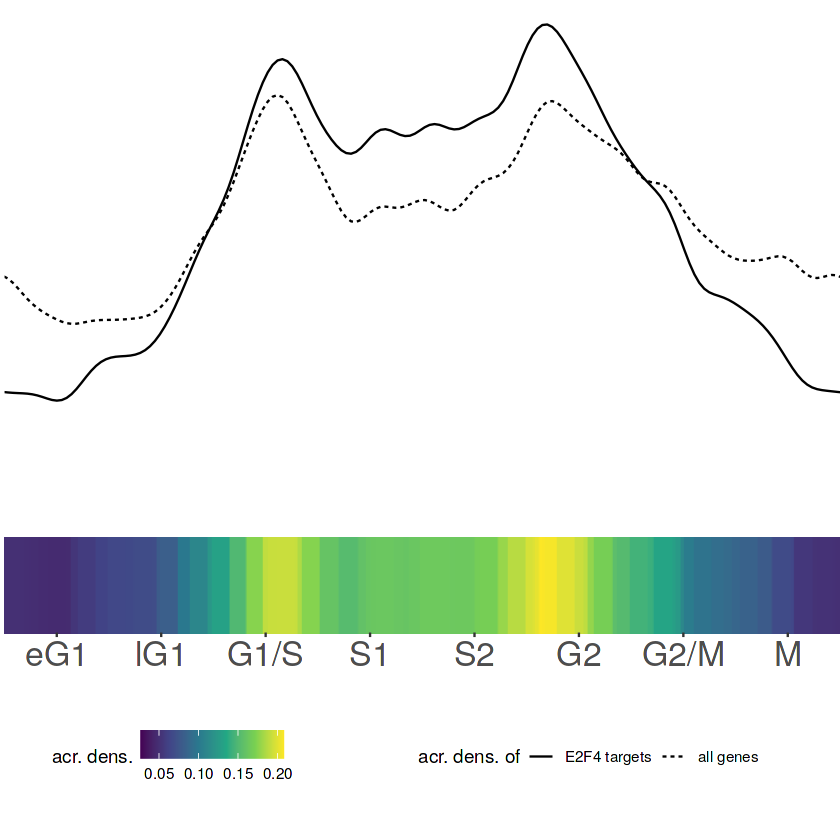

In [116]:
p = plot_target_acrophases("E2F4")
p
dev.copy(svg, '../out/cell_cycle_figures/E2F4_target_acrophase_density.svg', height = 3, width = 5)
dev.off()

## Figure 2
### The UMAP positions perturbations leading to similar imbalances together

In [117]:
# loading imbalance data
res_stats =  read.table('../out/tables/K562_perturbseq_imbalances_statistics.tsv', quote = '', header = T, sep = '\t')
res_stats %>% head()
res_stats %>% dim()
res_stats$condition %>% unique() %>% length()

bins        condition count count_expected_median p_smaller p_greater phase
1 [0,1.18)    A1BG       37    41                   0.26004   0.79190   M/eG1
2 [1.18,2.75) A1BG      108    96                   0.92460   0.09305   lG1  
3 [2.75,3.67) A1BG       59    59                   0.50630   0.54997   G1/S 
4 [3.67,5.11) A1BG       95   113                   0.02416   0.98158   S    
5 [5.11,6.28] A1BG       88    77                   0.92927   0.08850   G2/M 
6 [0,1.18)    AAAS       38    44                   0.18779   0.85306   M/eG1
  p_min   stars is_kzfp is_c2h2 is_other_tf tf_category
1 0.26004       FALSE   FALSE   FALSE       not a TF   
2 0.09305       FALSE   FALSE   FALSE       not a TF   
3 0.50630       FALSE   FALSE   FALSE       not a TF   
4 0.02416 *     FALSE   FALSE   FALSE       not a TF   
5 0.08850       FALSE   FALSE   FALSE       not a TF   
6 0.18779       FALSE   FALSE   FALSE       not a TF

[1] 46630    13

[1] 9326

In [118]:
# loading UMAP coordinates

In [119]:
umap_plot = read.table('../out/tables/imbalances_umap_plot.tsv', sep = '\t', header = T)
umap_plot %>% head()
umap_plot %>% dim()

symbol UMAP1      UMAP2     is_kzfp p_min   tf_category p_min_second
1 A1BG   -2.5840922  4.918871 FALSE   0.02416 not a TF    0.08850     
2 AAAS   -2.7678458  2.168037 FALSE   0.07165 not a TF    0.17930     
3 AACS   -0.5185864 -1.227537 FALSE   0.09103 not a TF    0.11878     
4 AAGAB  -2.5454007 -6.452825 FALSE   0.07300 not a TF    0.23326     
5 AAK1   -2.2592912  5.079895 FALSE   0.03658 not a TF    0.03796     
6 AAMDC   0.3860606  6.124501 FALSE   0.09377 not a TF    0.12182     
  signif_sum_p_smaller signif_sum_p_greater signif_sum_all tf_category_signif
1 2.563359             2.453405             5.016764       not a TF          
2 1.988098             1.974758             3.962856       n.s.              
3 2.218213             1.781222             3.999435       n.s.              
4 1.806695             1.748532             3.555226       n.s.              
5 2.135856             2.507780             4.643636       not a TF          
6 1.786755             1.928598             3.715353       n.s.

[1] 9326   11

In [120]:
umap_plot = umap_plot %>% dplyr::left_join(., y = res_stats %>% 
                                                    dplyr::select(bins, condition, p_smaller, p_greater, tf_category) %>% 
                                                    dplyr::arrange(condition, bins) %>% 
                                                    dplyr::group_by(condition) %>% 
                                                    dplyr::summarize(p_smaller_list = list(p_smaller),
                                                    p_greater_list = list(p_greater),
                                                                    p_min = min(c(p_smaller, p_greater)),
                                                                    tf_category = unique(tf_category)) %>% 
                                           dplyr::rename(symbol = condition)) %>% 
                            dplyr::filter(!symbol == "non-targeting")

Joining with `by = join_by(symbol, p_min, tf_category)`


In [321]:
breaks = c(0,
            pi/4+pi/8, # end of M/G1
           pi-pi/8, # end of G1
           pi+pi/6, # end of G1/S
           3*pi/2+pi/8, # end of S
           2*pi # end of G2M
          )
b = length(breaks)-1
b

[1] 5

In [322]:
sc <- scale_colour_gradientn(colours = rev(viridis::viridis(100)), limits=range(0, 2), oob = scales::squish)

# list of plots
plot_list = list(p_smaller_list = list(), p_greater_list = list())

In [323]:
# we're arranging the plots in two rows and four columns. Rows are greater or smaller. Columns are phases, from M/eG1 to G2/M.
# We only add x label to the first row of plots with the phases, and y labels to the two first plots of each column.


direction_labels = list("p_greater_list"="accumulation", "p_smaller_list"="attrition")
phase_assignment = c("M/eG1", "lG1", "G1/S", "S", "G2/M")


In [325]:
for (direction in names(plot_list)) {
    for (i in 1:(length(breaks)-1)) {
        to_plot = umap_plot %>% dplyr::filter(symbol != "non-targeting") %>%
        dplyr::select(UMAP1, UMAP2) %>% 
        dplyr::mutate(pval = (umap_plot %>% 
                      apply(., 1, function(x) x[direction][[1]][[i]], simplify = T) %>% unlist())) %>% 
                            dplyr::mutate(signif = -log10(pval))
        p = to_plot %>% dplyr::rename(`-log10(p-val)`=signif) %>% 
                            ggplot(aes(x = UMAP1, y = UMAP2, color = `-log10(p-val)`)) + 
                            #ggrastr::geom_point_rast(size = 0.2, raster.dpi = 250, alpha = 0.8) + 
                            geom_point(size = 0.2, alpha = 0.8) + 
                            sc + 
                            theme_classic()
        if (direction == "p_greater_list") {
            if (i == 1) {
                # leftmost plot: x and y axis titles
                p = p + xlab(phase_assignment[i]) + ylab(direction_labels[direction]) + 
                theme(axis.line=element_blank(),
                                  axis.text.x=element_blank(),
                                  axis.text.y=element_blank(),
                                  axis.ticks=element_blank(),
                                  #axis.title.x=element_blank(),
                                  #axis.title.y=element_blank()
                             )
                } else {
                    # second to fourth plots on the first row: only x axis title
                    p = p + xlab(phase_assignment[i]) + 
                        theme(axis.line=element_blank(),
                                      axis.text.x=element_blank(),
                                      axis.text.y=element_blank(),
                                      axis.ticks=element_blank(),
                                      #axis.title.x=element_blank(),
                                      axis.title.y=element_blank()
                                 )
                }
            } else if (direction == "p_smaller_list") {
            if (i == 1) {
                # leftmost plot on the second row: only y axis label
                 p = p + ylab(direction_labels[direction]) + 
                theme(axis.line=element_blank(),
                                      axis.text.x=element_blank(),
                                      axis.text.y=element_blank(),
                                      axis.ticks=element_blank(),
                                      axis.title.x=element_blank(),
                                      #axis.title.y=element_blank()
                              )
                } else{
                p = p + theme(axis.line=element_blank(),
                                      axis.text.x=element_blank(),
                                      axis.text.y=element_blank(),
                                      axis.ticks=element_blank(),
                                      axis.title.x=element_blank(),
                                      axis.title.y=element_blank()
                              )
                
            }
            }
                            
        plot_list[[direction]][[i]] = p
    }
}

In [326]:
prow = cowplot::plot_grid(
       plot_list[["p_greater_list"]][[1]] + theme(legend.position="none"),
    plot_list[["p_greater_list"]][[2]] + theme(legend.position="none"),
    plot_list[["p_greater_list"]][[3]] + theme(legend.position="none"),
    plot_list[["p_greater_list"]][[4]] + theme(legend.position="none"),
    plot_list[["p_greater_list"]][[5]] + theme(legend.position="none"),
    
  plot_list[["p_smaller_list"]][[1]] + theme(legend.position="none"),
  plot_list[["p_smaller_list"]][[2]] + theme(legend.position="none"),
  plot_list[["p_smaller_list"]][[3]] + theme(legend.position="none"),
  plot_list[["p_smaller_list"]][[4]] + theme(legend.position="none"),
  plot_list[["p_smaller_list"]][[5]] + theme(legend.position="none"),
    

  align = 'vh',
  hjust = -1,
  nrow = 2
)

legend <- get_legend(
  # create some space to the left of the legend
  plot_list[["p_greater_list"]][[1]] + theme(legend.box.margin = margin(0, 0, 0, 12))
)

ggsave('../out/cell_cycle_figures/umap_cell_cycle_dev_signif.svg', plot_grid(prow, legend, rel_widths = c(3, .4)), device = svg, width = 12, height = 5)

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


### Age of imbalance inducing genes

In [126]:
extreme_imbalances_in_text = c("CCND3", "CCNF", "CCNK", "TFDP1",
                             "MCM2", "MCM3", "RFC4", "GINS4", "WDHD1",
                              "ATRIP", "RAD21", "RINT1", "RNF138", "TTI1",
                                "MAD2L1", "SMC1A")

Warning message in dplyr::left_join(., gene_metadata %>% dplyr::mutate(age_category = cut(age_combined, :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 6776 of `x` matches multiple rows in `y`.
ℹ Row 10631 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”
Warning message in ggrepel::geom_text_repel(aes(x = age_category, y = -log10(p_min), :
“Ignoring unknown parameters: `label.size` and `fill`”


svg 
  3

png 
  2

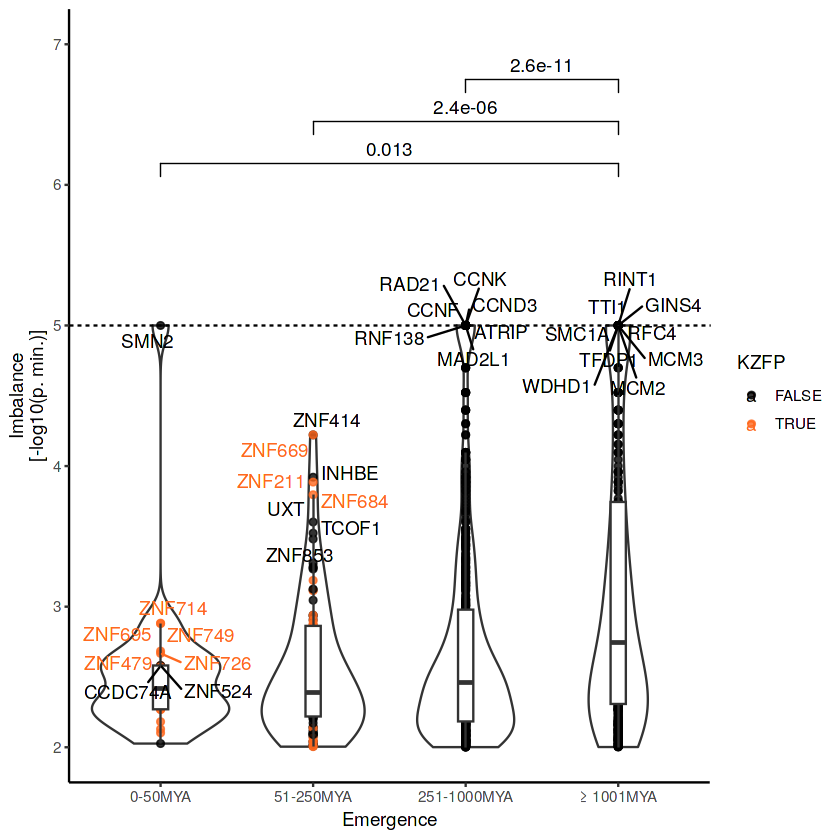

In [127]:
to_plot = res_stats %>% 
    dplyr::left_join(., gene_metadata %>% 
                    dplyr::mutate(age_category = cut(age_combined, breaks = c(-Inf, 50, 250, 1000, Inf))) %>%
                     dplyr::select(symbol, age_combined, age_category, isKZFP) %>% 
                     unique(),
                     by = c("condition" = "symbol")) %>%
    group_by(condition) %>% slice_min(order_by = p_min, n = 1, with_ties = F) %>%
    dplyr::filter(p_min < 0.01, age_category != "NA")

to_plot %>%
    ggplot(aes(x = age_category, y = -log10(p_min))) + 
    geom_violin() + 
    geom_point(aes(col = isKZFP), alpha = 0.8) + 
    scale_color_manual(values = c("black", "#FF681F")) + 
    geom_boxplot(width = 0.1, outliers = F) +
    ylim(c(2, 7)) +
    geom_abline(intercept = 5, slope = 0, lty = 2) +
    ggpubr::stat_compare_means(comparisons = list(c(1, 4), c(2, 4), c(3, 4)), label.y = 6, step.increase = 0.1) + 
    theme_classic() + 
    ggrepel::geom_text_repel(aes(x = age_category, y = -log10(p_min), label = condition, col = isKZFP),
                              data = rbind(to_plot %>% group_by(age_category) %>% slice_min(p_min, n = 8, with_ties = F) %>% dplyr::filter(age_combined <=250),
                                           to_plot %>% dplyr::filter(condition %in% extreme_imbalances_in_text)),
                              label.size = 0, fill = alpha(c("white"),0), max.overlaps = 100, seed = 1, force = 5) + 
    labs(x = "Emergence", y = "Imbalance\n[-log10(p. min.)]", col = "KZFP") +
    scale_x_discrete(labels=c("0-50MYA", "51-250MYA", "251-1000MYA", "\u2265 1001MYA"))
dev.copy(svg, '../out/cell_cycle_figures/imbalance_vs_age.svg', width = 6, height = 5)
dev.off()

## Proportion of non TFs, TFs and KZFPs leading to cell cycle imbalances

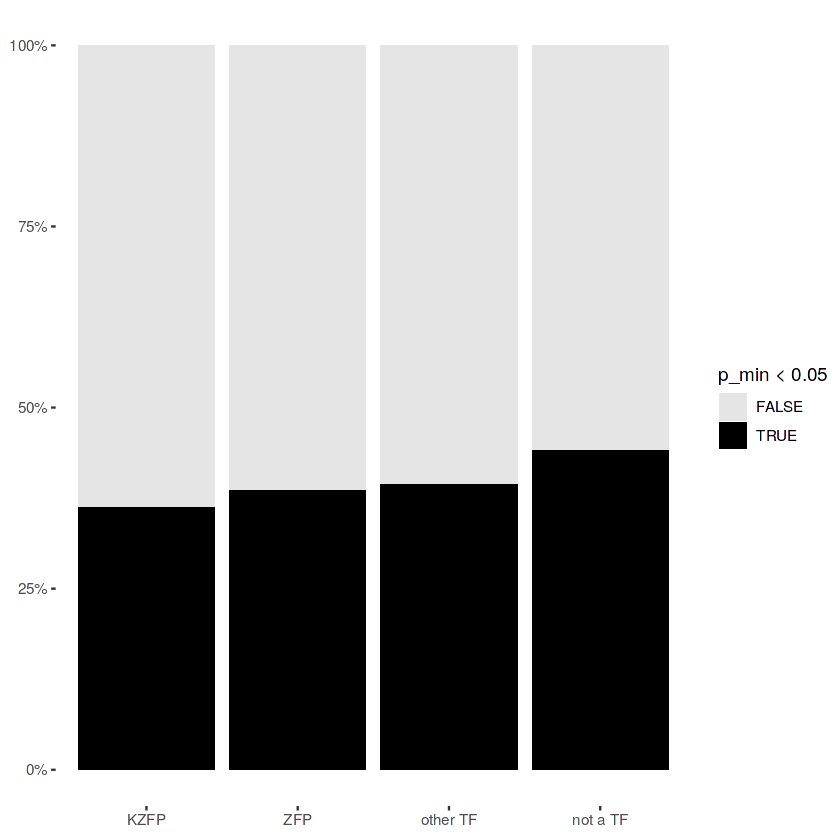

In [128]:
p = res_stats %>% dplyr::select(condition, p_min, tf_category) %>% 
    dplyr::group_by(condition, tf_category) %>% 
    dplyr::mutate(p_min = min(p_min), tf_category = factor(tf_category, levels = c("KZFP", "ZFP", "other TF", "not a TF"))) %>% 
    unique() %>%
    ggplot(aes(x = tf_category, fill = p_min < 0.05)) + geom_bar(position = "fill") + 
    scale_y_continuous(labels = scales::percent) + 
    scale_fill_manual(values = c("grey90", "black")) +
    theme_classic() + 
    theme(axis.line = element_blank(),
         axis.title = element_blank())
p

In [129]:
ggsave('../out/cell_cycle_figures/tf_category_signif_prop.svg', plot = p, device = svg, width = 4, height = 1.5)

### Location of KZFPs and other TFs on the perturbation UMAP

In [327]:
umap_plot$tf_category %>% table()

.
    KZFP not a TF other TF      ZFP 
     348     7805      817      356 

In [328]:
umap_plot = umap_plot %>% 
    dplyr::mutate(tf_category_signif = ifelse(umap_plot$p_min < 0.05, yes = umap_plot$tf_category, no = "n.s.")) %>%
    dplyr::mutate(tf_category_signif = ifelse(tf_category_signif == "ZFP", yes = "other TF", no = tf_category_signif)) %>%
    dplyr::mutate(tf_category_signif = factor(tf_category_signif, levels = c("KZFP", "other TF", "not a TF", "n.s.")))

In [329]:
umap_plot$tf_category_signif %>% levels()

[1] "KZFP"     "other TF" "not a TF" "n.s."

In [330]:
tf_category_signif_colors = c("#FF681F", "black", "grey70", "grey60")
names(tf_category_signif_colors) = umap_plot$tf_category_signif %>% levels()

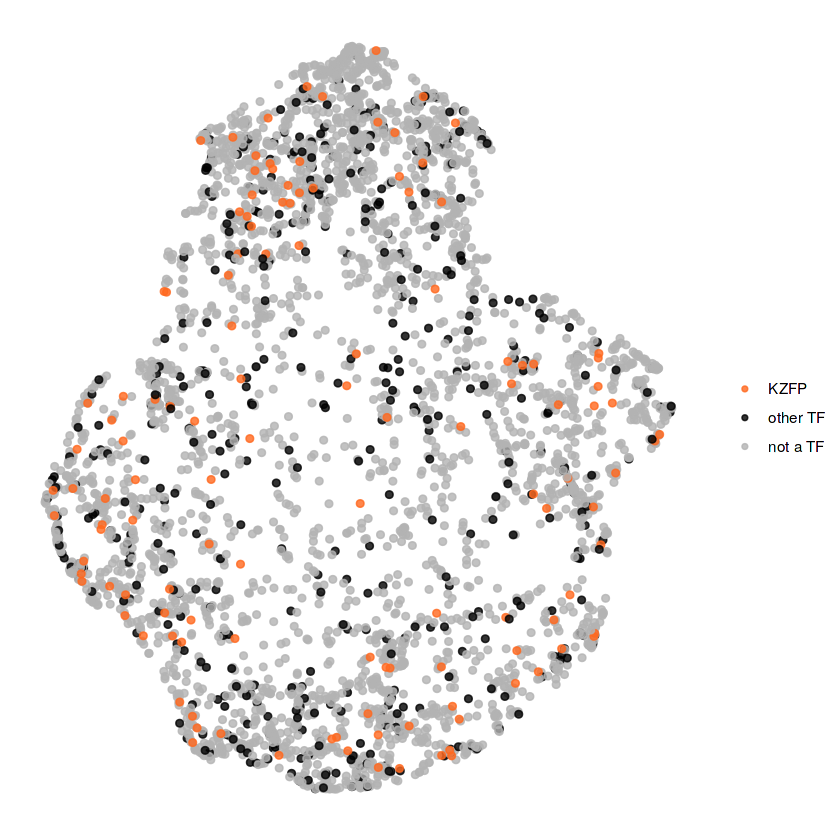

In [332]:
p = umap_plot %>% 
    dplyr::filter(p_min < 0.05) %>%
    dplyr::mutate(tf_category_signif = factor(tf_category_signif, levels = c("KZFP", "other TF", "not a TF"))) %>%
    ggplot(aes(x = UMAP1, y = UMAP2, color = (tf_category_signif))) + 
    #ggrastr::geom_point_rast(alpha = 0.8) + 
    geom_point(alpha = 0.8) + 
    theme_classic() + 
    theme(axis.ticks = element_blank(),
                            axis.line = element_blank(),
                            axis.text = element_blank(),
                            axis.title = element_blank(),
           legend.title=element_blank()) + 
    scale_color_discrete(type = tf_category_signif_colors) + 
    guides(colour = guide_legend(override.aes = list(size=1)))
p

In [333]:
ggsave('../out/cell_cycle_figures/UMAP_cell_positions_KZFPs.svg', plot = p, device = svg, width = 4, height = 3.5)

## KZFP categories: Romain

In [136]:
all_DNA_binding_proteins = in_phase_vs_all_genes_enrichment_long$TF_symbol %>% unique()
all_DNA_binding_proteins %>% head()
all_DNA_binding_proteins %>% length()

[1] "ADNP"     "AFF1"     "AFF4"     "AGO1"     "ARHGAP35" "ARID1B"

[1] 794

In [137]:
rhythmic_DNA_binding_proteins = rhythm %>% dplyr::filter(padj < 0.05, symbol %in% all_DNA_binding_proteins) %>% dplyr::pull(symbol) %>% unique()
rhythmic_DNA_binding_proteins %>% head()
rhythmic_DNA_binding_proteins %>% length()

[1] "RERE"   "ID3"    "GMEB1"  "THRAP3" "SNIP1"  "TOE1"

[1] 331

In [138]:
DNA_binding_proteins_enriched_at_ryhthmic_genes = in_phase_vs_all_genes_enrichment_long %>% dplyr::filter(padj_enrich < 0.05) %>% dplyr::pull(TF_symbol) %>% unique()
DNA_binding_proteins_enriched_at_ryhthmic_genes %>% head()
DNA_binding_proteins_enriched_at_ryhthmic_genes %>% length()

[1] "ADNP"     "AFF1"     "AFF4"     "AGO1"     "ARHGAP35" "ARID1B"

[1] 451

In [139]:
res_stats %>% colnames()

[1] "bins"                  "condition"             "count"                
 [4] "count_expected_median" "p_smaller"             "p_greater"            
 [7] "phase"                 "p_min"                 "stars"                
[10] "is_kzfp"               "is_c2h2"               "is_other_tf"          
[13] "tf_category"

In [140]:
DNA_binding_proteins_inducing_imbalances = res_stats %>% dplyr::filter(p_min < 0.05, condition %in% all_DNA_binding_proteins) %>% dplyr::pull(condition) %>% unique()
DNA_binding_proteins_inducing_imbalances %>% head()
DNA_binding_proteins_inducing_imbalances %>% length()

[1] "ADNP"  "AFF4"  "AGO1"  "ASH1L" "ATF1"  "ATF2"

[1] 296

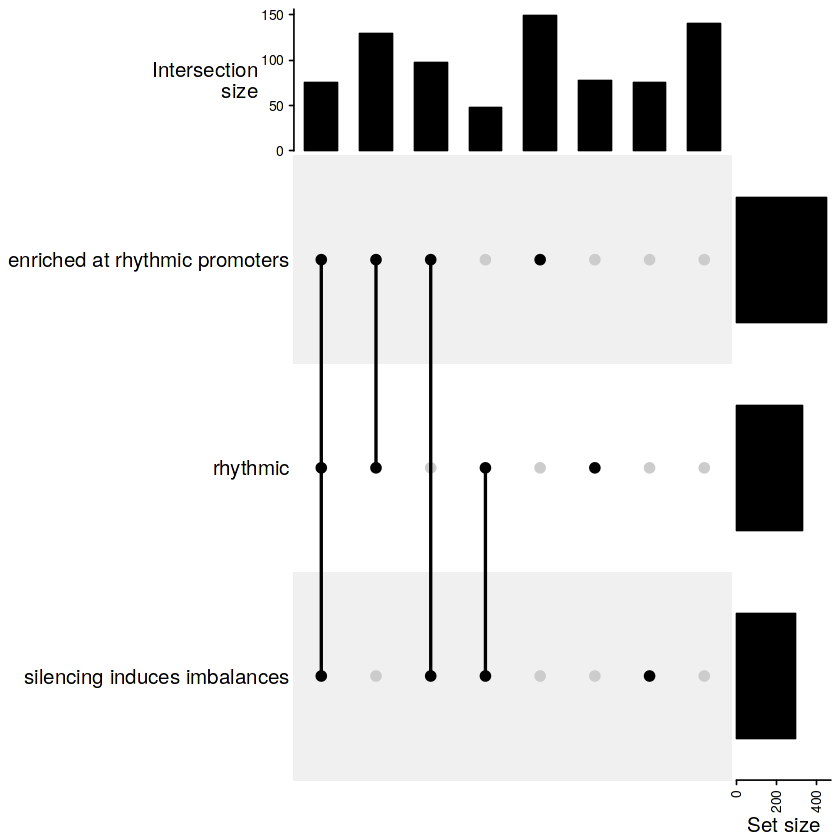

In [141]:
comb_mat = make_comb_mat(list(rhythmic = rhythmic_DNA_binding_proteins, 
                              `enriched at rhythmic promoters` = DNA_binding_proteins_enriched_at_ryhthmic_genes, 
                              `silencing induces imbalances` = DNA_binding_proteins_inducing_imbalances), 
                         mode = "distinct",
                         universal_set = all_DNA_binding_proteins)
ComplexHeatmap::UpSet(comb_mat)

## Cell cycle distribution of K562 transduced with non-targeting gRNAs

In [142]:
phi_df = read.csv('../data/velocycle_output/K562_conditions_phases_phis_results_13032024.csv')
cells_per_cond = phi_df %>% dplyr::select(condition) %>% dplyr::group_by(condition) %>% dplyr::mutate(ncells = n()) %>% unique() %>% as.data.frame()
rownames(cells_per_cond) = cells_per_cond$condition

In [143]:
to_plot = phi_df %>% dplyr::filter(condition == "non-targeting") %>% dplyr::mutate(bins = cut(phi, breaks = breaks, include.lowest = T, right = F))
to_plot %>% head()

condition     phi       phase bins       
1 non-targeting 2.8271494 G1    [2.75,3.67)
2 non-targeting 0.8191839 G2M   [0,1.18)   
3 non-targeting 4.4286870 G2M   [3.67,5.11)
4 non-targeting 4.6757090 G2M   [3.67,5.11)
5 non-targeting 3.7793736 G1    [3.67,5.11)
6 non-targeting 5.1262794 G2M   [5.11,6.28]

In [144]:
# legend
phase_assignment = c("M/eG1", "lG1", "G1/S", "S", "G2/M")
lgd = to_plot %>% dplyr::select(phi, bins) %>% dplyr::group_by(bins) %>% dplyr::summarize(phi_min = min(phi)) %>% dplyr::mutate(`phase assigned` = phase_assignment)
lgd

bins        phi_min      phase assigned
1 [0,1.18)    0.0000896522 M/eG1         
2 [1.18,2.75) 1.1784991000 lG1           
3 [2.75,3.67) 2.7489989000 G1/S          
4 [3.67,5.11) 3.6655083000 S             
5 [5.11,6.28] 5.1052547000 G2/M

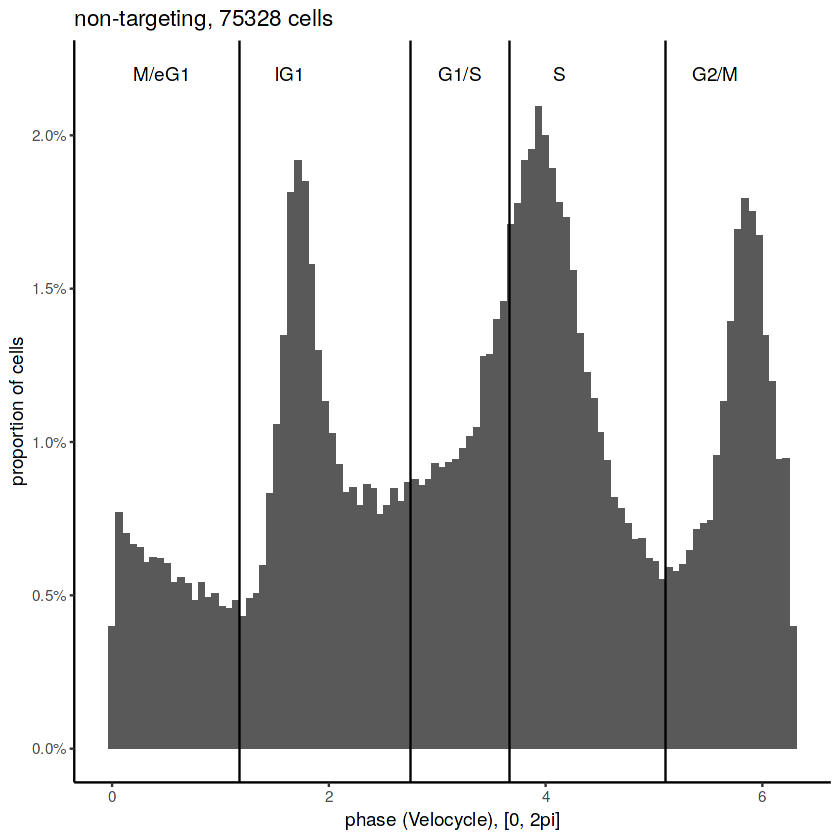

In [145]:
p = to_plot %>% ggplot(aes(x = phi)) + 
        geom_histogram(aes(y = after_stat(count / sum(count))), bins = 100) + 
        scale_y_continuous(labels = scales::percent) + 
        ggtitle(label = paste0("non-targeting",', ', cells_per_cond["non-targeting", "ncells"], " cells")) + 
        ylab("proportion of cells") + xlab("phase (Velocycle), [0, 2pi]") +
        geom_vline(xintercept = breaks[2:5]) + 
        theme_classic() + 
        geom_text(aes(x = phi_min, y = 0.022, label = `phase assigned`), data = lgd, nudge_x = 0.46)
        # scale_fill_manual(breaks = breaks, pal = plasma)   
ggsave('../out/cell_cycle_figures/perturbseq_non_targeting_distrib_breaks.svg', p, svg, width = 3.5, height = 2.5)
p

## Plotting the top 10 genes in term of significant imbalance on a UMAP that also has -log10(p) on it


In [146]:
umap_plot = umap_plot %>% dplyr::mutate(signif_sum_p_smaller = map(p_smaller_list, ~sum(-log10(.x)))) %>%
    dplyr::mutate(signif_sum_p_greater = map(p_greater_list, ~sum(-log10(.x))))

umap_plot$signif_sum_p_smaller = unlist(umap_plot$signif_sum_p_smaller)
umap_plot$signif_sum_p_greater = unlist(umap_plot$signif_sum_p_greater)

umap_plot$signif_sum_all = umap_plot$signif_sum_p_smaller + umap_plot$signif_sum_p_greater
umap_plot %>% head()

symbol UMAP1      UMAP2     is_kzfp p_min   tf_category p_min_second
1 A1BG   -2.5840922  4.918871 FALSE   0.02416 not a TF    0.08850     
2 AAAS   -2.7678458  2.168037 FALSE   0.07165 not a TF    0.17930     
3 AACS   -0.5185864 -1.227537 FALSE   0.09103 not a TF    0.11878     
4 AAGAB  -2.5454007 -6.452825 FALSE   0.07300 not a TF    0.23326     
5 AAK1   -2.2592912  5.079895 FALSE   0.03658 not a TF    0.03796     
6 AAMDC   0.3860606  6.124501 FALSE   0.09377 not a TF    0.12182     
  signif_sum_p_smaller signif_sum_p_greater signif_sum_all tf_category_signif
1 2.563359             2.453405             5.016764       not a TF          
2 1.988098             1.974758             3.962856       n.s.              
3 2.218213             1.781222             3.999435       n.s.              
4 1.806695             1.748532             3.555226       n.s.              
5 2.135856             2.507780             4.643636       not a TF          
6 1.786755             1.928598             3.715353       n.s.              
  p_smaller_list p_greater_list
1 0.26004,....   0.7919, ....  
2 0.18779,....   0.85306,....  
3 0.09103,....   0.94655,....  
4 0.49949,....   0.62954,....  
5 0.97525,....   0.03796,....  
6 0.73023,....   0.34924,....

In [147]:
umap_plot %>% head()
umap_plot %>% dim()

symbol UMAP1      UMAP2     is_kzfp p_min   tf_category p_min_second
1 A1BG   -2.5840922  4.918871 FALSE   0.02416 not a TF    0.08850     
2 AAAS   -2.7678458  2.168037 FALSE   0.07165 not a TF    0.17930     
3 AACS   -0.5185864 -1.227537 FALSE   0.09103 not a TF    0.11878     
4 AAGAB  -2.5454007 -6.452825 FALSE   0.07300 not a TF    0.23326     
5 AAK1   -2.2592912  5.079895 FALSE   0.03658 not a TF    0.03796     
6 AAMDC   0.3860606  6.124501 FALSE   0.09377 not a TF    0.12182     
  signif_sum_p_smaller signif_sum_p_greater signif_sum_all tf_category_signif
1 2.563359             2.453405             5.016764       not a TF          
2 1.988098             1.974758             3.962856       n.s.              
3 2.218213             1.781222             3.999435       n.s.              
4 1.806695             1.748532             3.555226       n.s.              
5 2.135856             2.507780             4.643636       not a TF          
6 1.786755             1.928598             3.715353       n.s.              
  p_smaller_list p_greater_list
1 0.26004,....   0.7919, ....  
2 0.18779,....   0.85306,....  
3 0.09103,....   0.94655,....  
4 0.49949,....   0.62954,....  
5 0.97525,....   0.03796,....  
6 0.73023,....   0.34924,....

[1] 9326   13

In [148]:
res_stats %>% head()
res_stats %>% dim()

bins        condition count count_expected_median p_smaller p_greater phase
1 [0,1.18)    A1BG       37    41                   0.26004   0.79190   M/eG1
2 [1.18,2.75) A1BG      108    96                   0.92460   0.09305   lG1  
3 [2.75,3.67) A1BG       59    59                   0.50630   0.54997   G1/S 
4 [3.67,5.11) A1BG       95   113                   0.02416   0.98158   S    
5 [5.11,6.28] A1BG       88    77                   0.92927   0.08850   G2/M 
6 [0,1.18)    AAAS       38    44                   0.18779   0.85306   M/eG1
  p_min   stars is_kzfp is_c2h2 is_other_tf tf_category
1 0.26004       FALSE   FALSE   FALSE       not a TF   
2 0.09305       FALSE   FALSE   FALSE       not a TF   
3 0.50630       FALSE   FALSE   FALSE       not a TF   
4 0.02416 *     FALSE   FALSE   FALSE       not a TF   
5 0.08850       FALSE   FALSE   FALSE       not a TF   
6 0.18779       FALSE   FALSE   FALSE       not a TF

[1] 46630    13

In [334]:
# finding top 3 genes in each bin, up
top_n_genes = 3
top_genes_df = rbind(res_stats %>% dplyr::left_join(., umap_plot %>% dplyr::select(symbol, signif_sum_p_smaller, signif_sum_p_greater, signif_sum_all), by = c("condition" = "symbol")) %>% 
                     dplyr::group_by(bins) %>% 
                         arrange(p_smaller, desc(signif_sum_all)) %>% 
                         slice_head(n=top_n_genes),
                          res_stats %>% dplyr::left_join(., umap_plot %>% dplyr::select(symbol, signif_sum_p_smaller, signif_sum_p_greater, signif_sum_all), by = c("condition" = "symbol")) %>% 
                     dplyr::group_by(bins) %>% arrange(p_greater, desc(signif_sum_all)) %>% slice_head(n=top_n_genes))

In [335]:
set.seed(4)
sc <- scale_colour_gradientn(colours = rev(viridis::viridis(100, begin = 0.35)), limits=range(-log10(0.05), -log10(0.001)), oob = scales::squish, na.value = "grey90")
expand_by = 15
p = umap_plot %>% dplyr::mutate(p_min = ifelse(umap_plot$p_min > 0.05, yes = NA, no = umap_plot$p_min)) %>% ggplot(aes(x = UMAP1, y = UMAP2, color = -log10(p_min))) + 
    #ggrastr::geom_point_rast(size = 0.1, alpha = 0.8) + 
    geom_point(size = 0.1, alpha = 0.8) + 
    ggrepel::geom_text_repel(data = umap_plot %>% arrange(p_min) %>% dplyr::filter(symbol %in% top_genes_df$condition), 
                             aes(x = UMAP1, y = UMAP2, label = symbol), 
                             xlim = c(-Inf, Inf), ylim = c(-Inf, Inf),
                             color = "black",
                            min.segment.length = unit(0, 'lines'),
                             segment.color = "black",
                             segment.linetype = 1,
                            force = 35,
                            #force_pull = 1,
                            max.overlaps = Inf) + 
                            theme_classic() + theme(axis.ticks = element_blank(),
                            axis.line = element_blank(),
                            axis.text = element_blank(),
                            axis.title = element_blank(),
                           legend.position = "right") + sc + expand_limits(x = c(-expand_by, expand_by),
                y = c(-expand_by, expand_by))

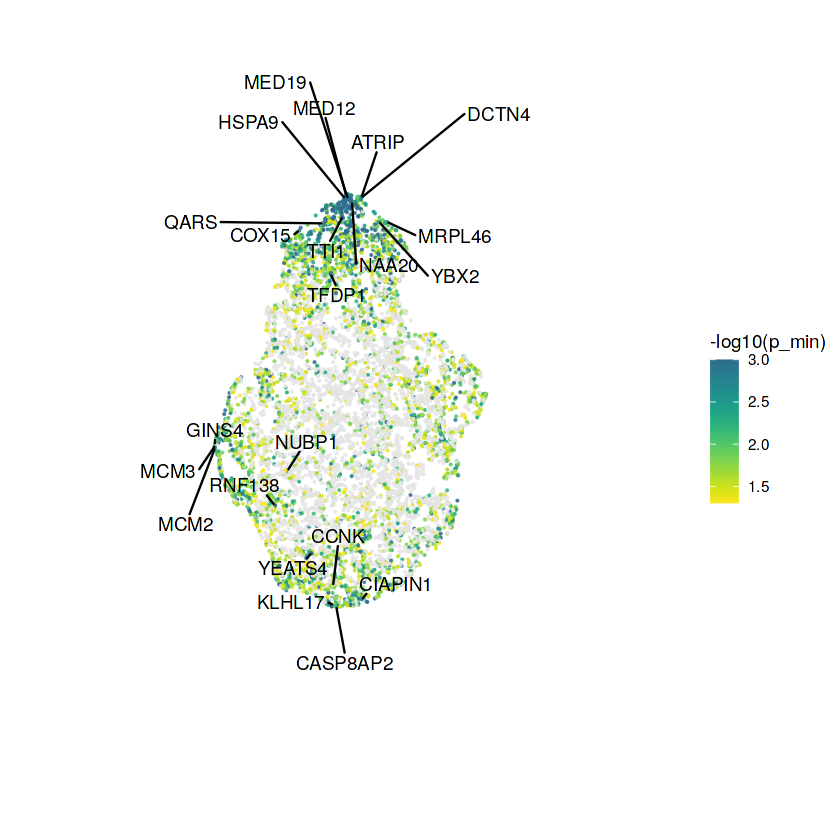

In [336]:
p

In [337]:
ggsave('../out/cell_cycle_figures/umap_cell_cycle_dev_signif_top_genes.svg', p, device = svg, width = 5, height = 4)

### Plotting genes belonging to the same cascade that fall together on the  UMAP

In [338]:
umap_plot = umap_plot %>% dplyr::mutate(signif_sum_p_smaller = map(p_smaller_list, ~sum(-log10(.x)))) %>%
    dplyr::mutate(signif_sum_p_greater = map(p_greater_list, ~sum(-log10(.x))))

umap_plot$signif_sum_p_smaller = unlist(umap_plot$signif_sum_p_smaller)
umap_plot$signif_sum_p_greater = unlist(umap_plot$signif_sum_p_greater)

umap_plot$signif_sum_all = umap_plot$signif_sum_p_smaller + umap_plot$signif_sum_p_greater
umap_plot %>% head()

symbol UMAP1      UMAP2     is_kzfp p_min   tf_category p_min_second
1 A1BG   -2.5840922  4.918871 FALSE   0.02416 not a TF    0.08850     
2 AAAS   -2.7678458  2.168037 FALSE   0.07165 not a TF    0.17930     
3 AACS   -0.5185864 -1.227537 FALSE   0.09103 not a TF    0.11878     
4 AAGAB  -2.5454007 -6.452825 FALSE   0.07300 not a TF    0.23326     
5 AAK1   -2.2592912  5.079895 FALSE   0.03658 not a TF    0.03796     
6 AAMDC   0.3860606  6.124501 FALSE   0.09377 not a TF    0.12182     
  signif_sum_p_smaller signif_sum_p_greater signif_sum_all tf_category_signif
1 2.563359             2.453405             5.016764       not a TF          
2 1.988098             1.974758             3.962856       n.s.              
3 2.218213             1.781222             3.999435       n.s.              
4 1.806695             1.748532             3.555226       n.s.              
5 2.135856             2.507780             4.643636       not a TF          
6 1.786755             1.928598             3.715353       n.s.              
  p_smaller_list p_greater_list
1 0.26004,....   0.7919, ....  
2 0.18779,....   0.85306,....  
3 0.09103,....   0.94655,....  
4 0.49949,....   0.62954,....  
5 0.97525,....   0.03796,....  
6 0.73023,....   0.34924,....

In [339]:
umap_plot %>% head()
umap_plot %>% dim()

symbol UMAP1      UMAP2     is_kzfp p_min   tf_category p_min_second
1 A1BG   -2.5840922  4.918871 FALSE   0.02416 not a TF    0.08850     
2 AAAS   -2.7678458  2.168037 FALSE   0.07165 not a TF    0.17930     
3 AACS   -0.5185864 -1.227537 FALSE   0.09103 not a TF    0.11878     
4 AAGAB  -2.5454007 -6.452825 FALSE   0.07300 not a TF    0.23326     
5 AAK1   -2.2592912  5.079895 FALSE   0.03658 not a TF    0.03796     
6 AAMDC   0.3860606  6.124501 FALSE   0.09377 not a TF    0.12182     
  signif_sum_p_smaller signif_sum_p_greater signif_sum_all tf_category_signif
1 2.563359             2.453405             5.016764       not a TF          
2 1.988098             1.974758             3.962856       n.s.              
3 2.218213             1.781222             3.999435       n.s.              
4 1.806695             1.748532             3.555226       n.s.              
5 2.135856             2.507780             4.643636       not a TF          
6 1.786755             1.928598             3.715353       n.s.              
  p_smaller_list p_greater_list
1 0.26004,....   0.7919, ....  
2 0.18779,....   0.85306,....  
3 0.09103,....   0.94655,....  
4 0.49949,....   0.62954,....  
5 0.97525,....   0.03796,....  
6 0.73023,....   0.34924,....

[1] 9326   13

In [340]:
res_stats %>% head()
res_stats %>% dim()

bins        condition count count_expected_median p_smaller p_greater phase
1 [0,1.18)    A1BG       37    41                   0.26004   0.79190   M/eG1
2 [1.18,2.75) A1BG      108    96                   0.92460   0.09305   lG1  
3 [2.75,3.67) A1BG       59    59                   0.50630   0.54997   G1/S 
4 [3.67,5.11) A1BG       95   113                   0.02416   0.98158   S    
5 [5.11,6.28] A1BG       88    77                   0.92927   0.08850   G2/M 
6 [0,1.18)    AAAS       38    44                   0.18779   0.85306   M/eG1
  p_min   stars is_kzfp is_c2h2 is_other_tf tf_category
1 0.26004       FALSE   FALSE   FALSE       not a TF   
2 0.09305       FALSE   FALSE   FALSE       not a TF   
3 0.50630       FALSE   FALSE   FALSE       not a TF   
4 0.02416 *     FALSE   FALSE   FALSE       not a TF   
5 0.08850       FALSE   FALSE   FALSE       not a TF   
6 0.18779       FALSE   FALSE   FALSE       not a TF

[1] 46630    13

In [341]:
# finding top 3 genes in each bin, up
top_n_genes = 3
top_genes_df = rbind(res_stats %>% dplyr::left_join(., umap_plot %>% dplyr::select(symbol, signif_sum_p_smaller, signif_sum_p_greater, signif_sum_all), by = c("condition" = "symbol")) %>% 
                     dplyr::group_by(bins) %>% 
                         arrange(p_smaller, desc(signif_sum_all)) %>% 
                         slice_head(n=top_n_genes),
                          res_stats %>% dplyr::left_join(., umap_plot %>% dplyr::select(symbol, signif_sum_p_smaller, signif_sum_p_greater, signif_sum_all), by = c("condition" = "symbol")) %>% 
                     dplyr::group_by(bins) %>% arrange(p_greater, desc(signif_sum_all)) %>% slice_head(n=top_n_genes))

In [342]:
to_label = list(RFC = c("RFC3", "RFC4"),
               MED = c("MED12", "MED19", "MED30"),
               ATR = c("ATR", "ATRIP"),
               `repl. init.` = c("GINS1", "GINS2", "GINS3", "GINS4",
            "MCM2", "MCM3", "MCM6",
             "ORC1", "ORC4",
            "CCNE2",
             "DBF4", "DBF4B"))

In [343]:
label_genes_df = umap_plot %>% dplyr::filter(symbol %in% (to_label %>% unlist() %>% as.vector()))
label_genes_df

symbol UMAP1       UMAP2     is_kzfp p_min   tf_category p_min_second
1  ATR     0.54709321  8.903224 FALSE   0.00044 not a TF    0.00169     
2  ATRIP   0.65716031  8.905045 FALSE   0.00001 not a TF    0.00026     
3  CCNE2  -6.05553506 -2.558926 FALSE   0.04074 not a TF    0.05530     
4  DBF4   -6.41005803 -1.493109 FALSE   0.00213 not a TF    0.01203     
5  DBF4B  -6.03504116 -2.648965 FALSE   0.01010 not a TF    0.03790     
6  GINS1  -6.55085467 -1.031650 FALSE   0.00003 not a TF    0.03482     
7  GINS2  -6.57260545 -1.139415 FALSE   0.00004 not a TF    0.00664     
8  GINS3  -6.57243976 -1.154158 FALSE   0.00003 not a TF    0.00972     
9  GINS4  -6.56042351 -1.097857 FALSE   0.00001 not a TF    0.00089     
10 MCM2   -6.57030635 -1.226505 FALSE   0.00001 not a TF    0.00083     
11 MCM3   -6.55818264 -1.120046 FALSE   0.00001 not a TF    0.00007     
12 MCM6   -6.25148155 -2.305553 FALSE   0.00114 not a TF    0.01313     
13 MED12  -0.10924413  9.004500 FALSE   0.00001 not a TF    0.00001     
14 MED19  -0.01629879  8.846322 FALSE   0.00001 not a TF    0.00001     
15 MED30   0.12581649  8.783009 FALSE   0.00001 not a TF    0.00019     
16 ORC1   -5.77797629 -2.615882 FALSE   0.00181 not a TF    0.03443     
17 ORC4   -6.30492448 -1.991654 FALSE   0.00897 not a TF    0.08312     
18 RFC3   -3.24375681 -6.821479 FALSE   0.01500 not a TF    0.07904     
19 RFC4   -3.38735111 -6.718253 FALSE   0.00001 not a TF    0.00086     
   signif_sum_p_smaller signif_sum_p_greater signif_sum_all tf_category_signif
1   5.332508            6.039111             11.371619      not a TF          
2   7.525669            7.123993             14.649663      not a TF          
3   2.230694            2.168013              4.398708      not a TF          
4   3.633600            4.245085              7.878685      not a TF          
5   2.691031            2.725424              5.416455      not a TF          
6   3.553756            4.824736              8.378492      not a TF          
7   3.806005            4.774928              8.580933      not a TF          
8   3.775074            5.180250              8.955324      not a TF          
9   6.386149            5.145169             11.531318      not a TF          
10  6.661986            5.878547             12.540533      not a TF          
11  8.237598            6.627613             14.865211      not a TF          
12  3.873662            3.907909              7.781571      not a TF          
13 19.096910            5.000013             24.096923      not a TF          
14 15.432268            5.000495             20.432763      not a TF          
15  9.059554            5.017612             14.077166      not a TF          
16  2.851517            3.343445              6.194963      not a TF          
17  2.397720            2.721932              5.119652      not a TF          
18  2.979632            2.663687              5.643319      not a TF          
19  6.560604            5.464550             12.025154      not a TF          
   p_smaller_list p_greater_list
1  0.99984,....   0.00044,....  
2  1, 0.995....   1e-05, 0....  
3  0.62979,....   0.50774,....  
4  0.97772,....   0.0346, ....  
5  0.56845,....   0.53292,....  
6  0.53715,....   0.61957,....  
7  0.60395,....   0.55258,....  
8  0.81237,....   0.2732, ....  
9  0.41142,....   0.73699,....  
10 0.87946,....   0.18063,....  
11 0.98563,....   0.02427,....  
12 0.72856,....   0.36578,....  
13 8e-05, 1....   0.99997,....  
14 8e-05, 1....   0.99997,....  
15 0.01439,....   0.99531,....  
16 0.62192,....   0.4439, ....  
17 0.74856,....   0.35119,....  
18 0.84752,....   0.22943,....  
19 0.9036, ....   0.15287,....

In [344]:
to_label

$RFC
[1] "RFC3" "RFC4"

$MED
[1] "MED12" "MED19" "MED30"

$ATR
[1] "ATR"   "ATRIP"

$`repl. init.`
 [1] "GINS1" "GINS2" "GINS3" "GINS4" "MCM2"  "MCM3"  "MCM6"  "ORC1"  "ORC4" 
[10] "CCNE2" "DBF4"  "DBF4B"

In [345]:
foo <- function(x) {
    for (n in names(to_label)) {
        if (x %in% to_label[[n]]) {
            return(n)
            }
        }
    }

In [346]:
label_genes_df$cascade = factor(sapply(label_genes_df$symbol, foo))
label_genes_df %>% head()

symbol UMAP1      UMAP2     is_kzfp p_min   tf_category p_min_second
1 ATR     0.5470932  8.903224 FALSE   0.00044 not a TF    0.00169     
2 ATRIP   0.6571603  8.905045 FALSE   0.00001 not a TF    0.00026     
3 CCNE2  -6.0555351 -2.558926 FALSE   0.04074 not a TF    0.05530     
4 DBF4   -6.4100580 -1.493109 FALSE   0.00213 not a TF    0.01203     
5 DBF4B  -6.0350412 -2.648965 FALSE   0.01010 not a TF    0.03790     
6 GINS1  -6.5508547 -1.031650 FALSE   0.00003 not a TF    0.03482     
  signif_sum_p_smaller signif_sum_p_greater signif_sum_all tf_category_signif
1 5.332508             6.039111             11.371619      not a TF          
2 7.525669             7.123993             14.649663      not a TF          
3 2.230694             2.168013              4.398708      not a TF          
4 3.633600             4.245085              7.878685      not a TF          
5 2.691031             2.725424              5.416455      not a TF          
6 3.553756             4.824736              8.378492      not a TF          
  p_smaller_list p_greater_list cascade    
1 0.99984,....   0.00044,....   ATR        
2 1, 0.995....   1e-05, 0....   ATR        
3 0.62979,....   0.50774,....   repl. init.
4 0.97772,....   0.0346, ....   repl. init.
5 0.56845,....   0.53292,....   repl. init.
6 0.53715,....   0.61957,....   repl. init.

In [347]:
set.seed(3)
sc <- scale_colour_gradientn(colours = rev(viridis::viridis(100, begin = 0.35)), limits=range(-log10(0.05), -log10(0.001)), oob = scales::squish, na.value = "grey90")
expand_by = 15
p = umap_plot %>% dplyr::mutate(p_min = ifelse(umap_plot$p_min > 0.05, yes = NA, no = umap_plot$p_min)) %>% ggplot(aes(x = UMAP1, y = UMAP2, color = -log10(p_min))) + 
    #ggrastr::geom_point_rast(size = 0.1, alpha = 0.8) + 
    geom_point(size = 0.1, alpha = 0.8) +
    sc +
    ggnewscale::new_scale_colour() + 
    ggrepel::geom_text_repel(data = label_genes_df, 
                             aes(x = UMAP1, y = UMAP2, label = symbol, col = cascade), 
                             xlim = c(-Inf, Inf), ylim = c(-Inf, Inf),
                            min.segment.length = unit(0, 'lines'),
                             segment.linetype = 1,
                            force = 35,
                            #force_pull = 1,
                            max.overlaps = Inf) + 
                            theme_classic() + theme(axis.ticks = element_blank(),
                            axis.line = element_blank(),
                            axis.text = element_blank(),
                            axis.title = element_blank(),
                           legend.position = "right") + 
    scale_color_manual(values = c("#b49711", "#922d0c", "#cb15c9", "#1136b4")) + 
    expand_limits(x = c(-expand_by, expand_by),
                y = c(-expand_by, expand_by))

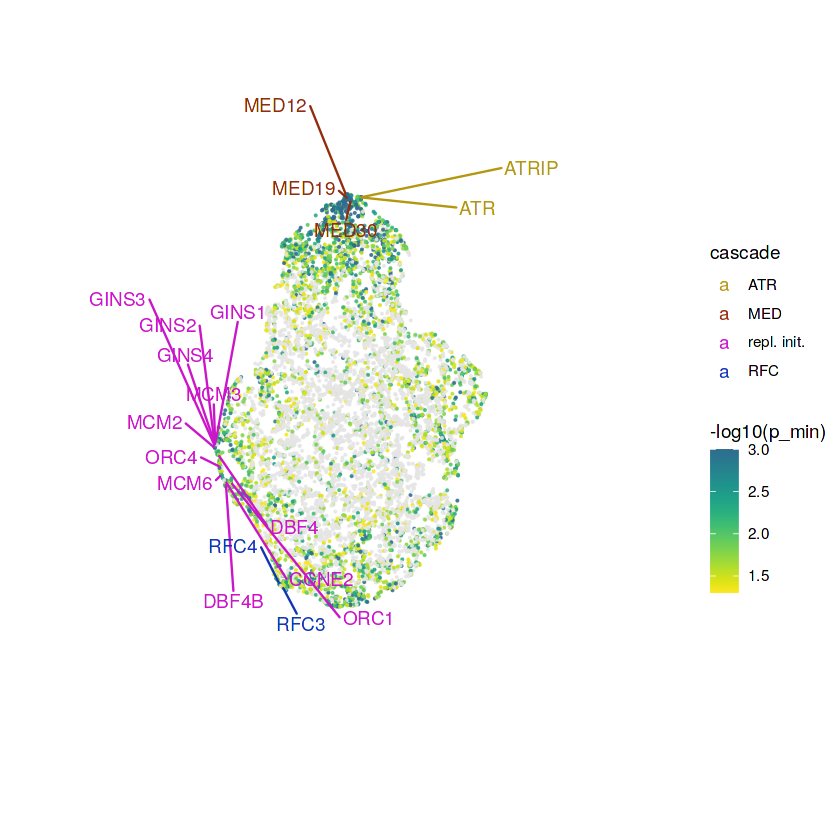

In [348]:
p

In [349]:
ggsave('../out/cell_cycle_figures/umap_cell_cycle_cascades.svg', p, device = svg, width = 5, height = 4)

## GO BP enrichment amongst imbalance-inducing targets

In [165]:
res_stats$phase = factor(res_stats$phase, levels = phase_assignment)

In [166]:
for_go = res_stats %>% dplyr::mutate(across(phase, factor))

In [167]:
GOcluster_all_imbalances <- clusterProfiler::compareCluster(geneClusters = list(`all imbalances` = res_stats %>% dplyr::filter(p_min < 0.05) %>% dplyr::select(condition) %>% unique() %>% pull()), 
                                             ont = "BP", 
                            keyType = 'SYMBOL',
                            universe = for_go %>% dplyr::select(condition) %>% unique() %>% pull() %>% as.character(), 
                            OrgDb = org.Hs.eg.db, 
                            fun="enrichGO",
                            pAdjustMethod = "BH",
                            pvalueCutoff  = 0.05,
                            qvalueCutoff  = 0.05,
                            minGSSize = 10,
                            maxGSSize = 500
)

In [168]:
GOcluster_all_imbalances %>% 
    as.data.frame() %>% head()

Cluster        ID        
1 all imbalances GO:0006261
2 all imbalances GO:0006260
3 all imbalances GO:0051276
4 all imbalances GO:0006367
5 all imbalances GO:0032508
6 all imbalances GO:0065004
  Description                                            GeneRatio BgRatio 
1 DNA-templated DNA replication                          91/3729   143/8571
2 DNA replication                                        135/3729  229/8571
3 chromosome organization                                226/3729  423/8571
4 transcription initiation at RNA polymerase II promoter 51/3729   77/8571 
5 DNA duplex unwinding                                   51/3729   77/8571 
6 protein-DNA complex assembly                           79/3729   130/8571
  pvalue       p.adjust    qvalue     
1 8.220675e-07 0.003221275 0.003200492
2 1.385494e-06 0.003221275 0.003200492
3 1.654796e-05 0.025649340 0.025483860
4 4.517903e-05 0.038400544 0.038152798
5 4.517903e-05 0.038400544 0.038152798
6 4.954909e-05 0.038400544 0.038152798
  geneID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
1 ATAD5/ATR/BARD1/BAZ1A/BLM/BOD1L1/BRCA1/BRCA2/CARM1/CCNE1/CCNE2/CDC34/CDC45/CDC6/CDC7/CDK2/DBF4/DBF4B/DDX21/DNAJA3/DONSON/DSCC1/E2F8/EME1/ETAA1/FANCM/FBXO5/GINS1/GINS2/GINS3/GINS4/INO80/KAT7/MCM10/MCM2/MCM3/MCM4/MCM5/MCM6/MCM7/MMS22L/MRE11/NBN/NFAT5/NUCKS1/ORC1/ORC2/ORC4/ORC5/ORC6/PARP1/PCNA/PNKP/POLA1/POLA2/POLB/POLD1/POLD2/POLD3/POLD4/POLE/POLE2/POLG/POLG2/POLQ/PRIM2/RAD51/RBBP8/RECQL/RECQL5/REV3L/RFC1/RFC2/RFC3/RFC4/RFC5/RPAIN/SAMHD1/SIRT7/SRPK2/SSBP1/TERF1/TICRR/TIMELESS/TIPIN/TOPBP1/UPF1/WDHD1/WDR18/WIZ/ZMPSTE24                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
2 ACTL6A/ACTR8/ATAD5/ATF1/ATR/BARD1/BAZ1A/BLM/BOD1L1/BRCA1/BRCA2/BRPF3/CARM1/CCNA2/CCNE1/CCNE2/CDC34/CDC45/CDC6/CDC7/CDK2/CHAF1B/CINP/DBF4/DBF4B/DDX21/DHX9/DNAJA3/DONSON/DSCC1/DTD1/DTL/E2F8/E4F1/EHMT2/EME1/ETAA1/FAF1/FANCM/FBXO5/GINS1/GINS2/GINS3/GINS4/GLI1/INO80/INO80B/INO80C/KAT7/KCTD13/MCM10/MCM2/MCM3/MCM4/MCM5/MCM6/MCM7/MMS22L/MRE1

Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


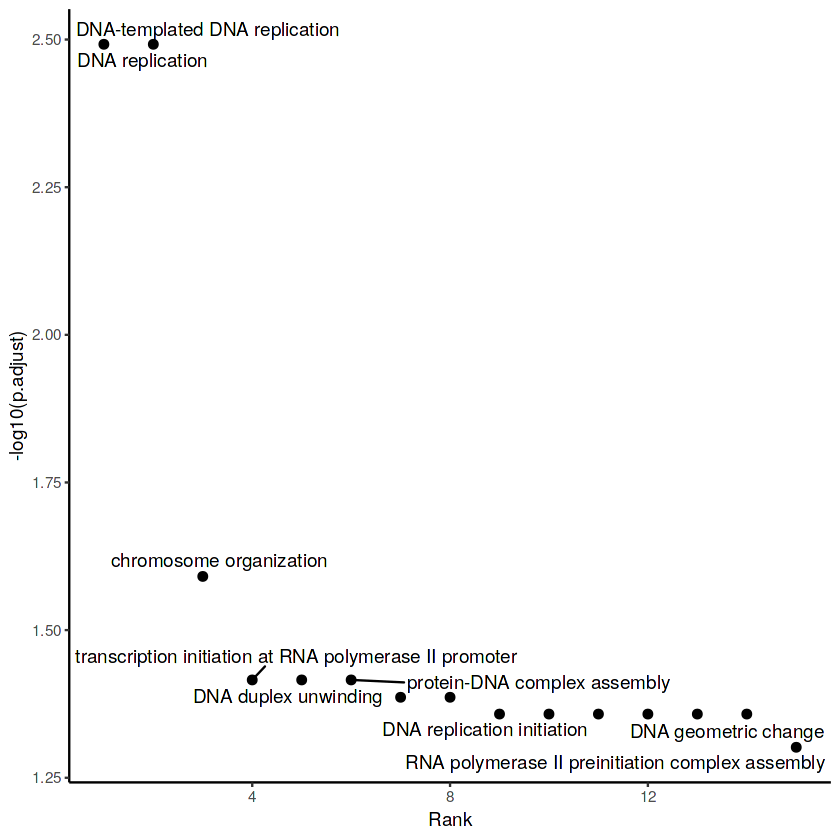

In [169]:
p = GOcluster_all_imbalances %>% 
    as.data.frame() %>% 
    arrange(p.adjust) %>% 
    dplyr::mutate(x_coord = 1:nrow(GOcluster_all_imbalances %>% as.data.frame())) %>%
    ggplot(aes(x = x_coord, y = -log10(p.adjust), label = Description)) + 
    geom_point(size = 2) + 
    xlab("Rank") +
    ggrepel::geom_text_repel(aes(x = x_coord, y = -log10(p.adjust), label = Description),
                             force = 10) +
    theme_classic()
p

In [170]:
ggsave('../out/cell_cycle_figures/go_perturbseq_all_genes_leading_to_imbalance.svg', p, svg, width = 3, height = 3)

Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [171]:
GOcluster_all_imbalances %>% write.table('../out/tables/TableSupp_GOBP_FigS2C.tsv', sep = '\t', col.names = T, row.names = F, quote = F)

## Top imbalance inducing genes per phase: TODO 

## GO BP of CRISPRi targets leading to attritions

In [172]:
GOcluster_per_phase_depletion <- clusterProfiler::compareCluster(condition~phase, 
                            data = res_stats %>%
                                                                 dplyr::filter(p_smaller < 0.05) %>% 
                                                                 dplyr::select(condition, phase) %>%
                                                                 dplyr::mutate(across(condition, as.character)), 
                            ont = "BP", 
                            keyType = 'SYMBOL',
                            universe = for_go %>% dplyr::select(condition) %>% unique() %>% pull() %>% as.character(), 
                            OrgDb = org.Hs.eg.db, 
                            fun="enrichGO",
                            pAdjustMethod = "BH",
                            pvalueCutoff  = 0.05,
                            qvalueCutoff  = 0.1,
                            minGSSize = 10,
                            maxGSSize = 500
)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


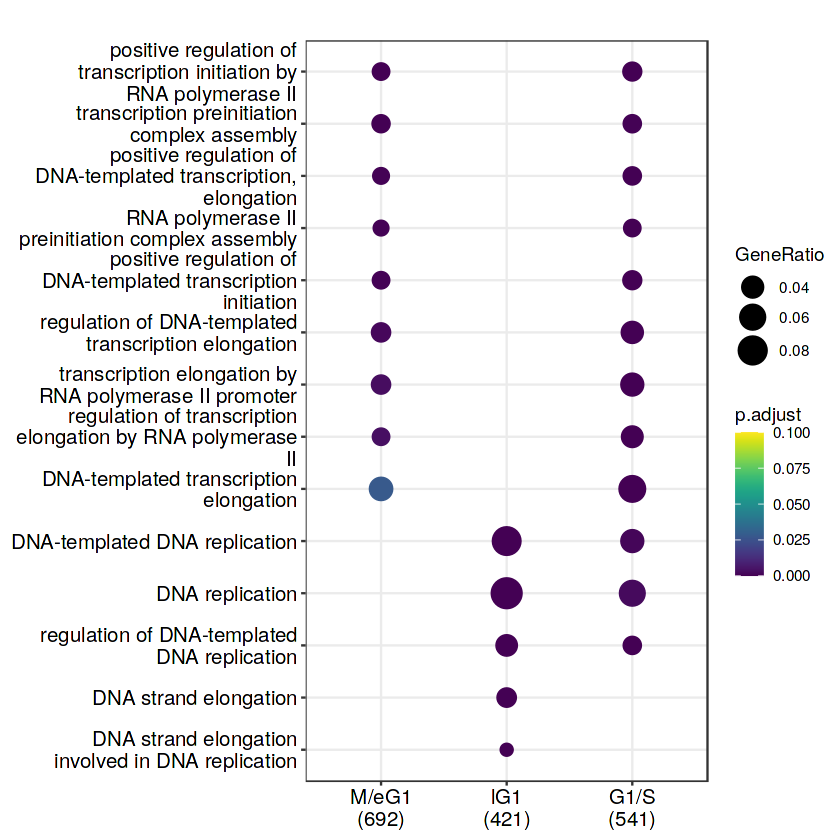

In [173]:
p = clusterProfiler::dotplot(GOcluster_per_phase_depletion) + 
    scale_colour_gradientn(colours = viridis(100), limits=c(0, 0.1)) + xlab(NULL)
p

In [174]:
ggsave('../out/cell_cycle_figures/go_perturbseq_genes_leading_to_phase_depletion.svg', p, svg, width = 6, height = 8)

In [175]:
GOcluster_per_phase_depletion %>% write.table('../out/tables/TableSupp_GOBP_FigS2F.tsv', sep = '\t', col.names = T, row.names = F, quote = F)

## GO BP of CRISPRi targets leading to accumulations

In [176]:
GOcluster_per_phase_enrichment <- clusterProfiler::compareCluster(condition~phase, 
                            data = res_stats %>% dplyr::filter(p_greater < 0.05) %>% dplyr::select(condition, phase) %>% dplyr::mutate(across(condition, as.character)), 
                            ont = "BP", 
                            keyType = 'SYMBOL',
                            universe = for_go %>% dplyr::select(condition) %>% unique() %>% pull() %>% as.character(), 
                            OrgDb = org.Hs.eg.db, 
                            fun="enrichGO",
                            pAdjustMethod = "BH",
                            pvalueCutoff  = 0.05,
                            qvalueCutoff  = 0.1,
                            minGSSize = 10,
                            maxGSSize = 500
)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


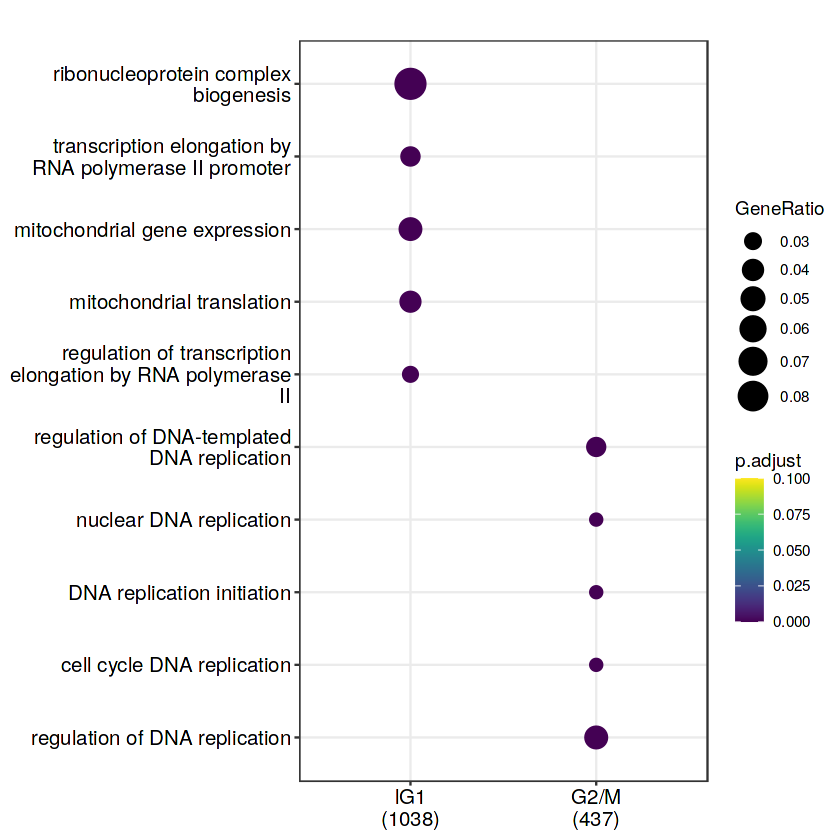

In [177]:
p = clusterProfiler::dotplot(GOcluster_per_phase_enrichment) + scale_colour_gradientn(colours = viridis(100), limits=c(0, 0.1)) + xlab(NULL)
p

In [178]:
ggsave('../out/cell_cycle_figures/go_perturbseq_genes_leading_to_phase_accumulation.svg', p, svg, width = 5, height = 5)

In [179]:
GOcluster_per_phase_enrichment %>% write.table('../out/tables/TableSupp_GOBP_FigS2G.tsv', sep = '\t', col.names = T, row.names = F, quote = F)

## GO term enrichment of DNA binding proteins falling in all three cats

In [180]:
category_df = data.frame(
           rhythmic = all_DNA_binding_proteins %in% rhythmic_DNA_binding_proteins,
    enriched_at_rhythmic_genes = all_DNA_binding_proteins %in% DNA_binding_proteins_enriched_at_ryhthmic_genes,
           inducing_imbalances = all_DNA_binding_proteins %in% DNA_binding_proteins_inducing_imbalances) %>% dplyr::mutate(in_cats = rhythmic + enriched_at_rhythmic_genes + inducing_imbalances,
                                                                                                                          TF_symbol = all_DNA_binding_proteins)
category_df %>% head()

rhythmic enriched_at_rhythmic_genes inducing_imbalances in_cats TF_symbol
1 FALSE    TRUE                        TRUE               2       ADNP     
2 FALSE    TRUE                       FALSE               1       AFF1     
3 FALSE    TRUE                        TRUE               2       AFF4     
4 FALSE    TRUE                        TRUE               2       AGO1     
5  TRUE    TRUE                       FALSE               2       ARHGAP35 
6  TRUE    TRUE                       FALSE               2       ARID1B

In [181]:
category_df %>% dplyr::filter(TF_symbol == "ZNF783")

rhythmic enriched_at_rhythmic_genes inducing_imbalances in_cats TF_symbol
1 TRUE     TRUE                       FALSE               2       ZNF783

In [182]:
category_df %>% dplyr::filter(in_cats == 2) %>% pull(TF_symbol) %>% length()

[1] 275

In [183]:
in_all_three_categories = intersect(rhythmic_DNA_binding_proteins, DNA_binding_proteins_inducing_imbalances) %>% intersect(., DNA_binding_proteins_enriched_at_ryhthmic_genes)

In [184]:
in_all_three_categories %>% head()
in_all_three_categories %>% length()
in_all_three_categories %>% sort() %>% print()

[1] "THRAP3" "TOE1"   "DMBX1"  "RBM15"  "SETDB1" "ASH1L"

[1] 75

 [1] "ASH1L"    "CBFA2T2"  "CBFA2T3"  "CEBPG"    "CTCF"     "DMBX1"   
 [7] "DPF2"     "E2F8"     "ELF4"     "ERF"      "EZH2"     "FOS"     
[13] "FOXK1"    "GTF2E2"   "GTF3C2"   "HNRNPL"   "HNRNPUL1" "KAT7"    
[19] "KLF1"     "KLF15"    "KLF6"     "LEF1"     "MAX"      "MCM2"    
[25] "MNT"      "MTA1"     "MYBL2"    "MYC"      "NFATC3"   "NFIX"    
[31] "NFYB"     "OTX1"     "PHF20"    "PML"      "RAD51"    "RB1"     
[37] "RBM15"    "RBM4"     "RCOR1"    "RUNX1"    "SETDB1"   "SIX5"    
[43] "SMARCA4"  "SP1"      "SP2"      "SUPT5H"   "SUZ12"    "TAF1"    
[49] "TBP"      "TCF7"     "TFAP4"    "TFDP1"    "TFE3"     "THRAP3"  
[55] "TOE1"     "TRIM24"   "TRIM25"   "USF2"     "VEZF1"    "XRCC5"   
[61] "ZBTB1"    "ZBTB43"   "ZBTB5"    "ZKSCAN8"  "ZNF311"   "ZNF319"  
[67] "ZNF334"   "ZNF519"   "ZNF574"   "ZNF586"   "ZNF587"   "ZNF641"  
[73] "ZNF740"   "ZNF84"    "ZSCAN22" 


In [185]:
gene_metadata %>% dplyr::filter(symbol %in% in_all_three_categories, isKZFP) %>% dplyr::select(symbol, Tycko_score_avg)

symbol  Tycko_score_avg
1 ZNF641   0.8290360     
2 ZNF84    0.4787291     
3 ZNF519   0.8657369     
4 ZNF586   0.8820678     
5 ZNF587   0.8893386     
6 ZNF334   0.8657369     
7 ZKSCAN8 -0.1212947     
8 ZNF311   0.6133533

In [186]:
e = clusterProfiler::enrichGO(category_df %>% dplyr::filter(in_cats == 3) %>% pull(TF_symbol), 
                              OrgDb = "org.Hs.eg.db", 
                              keyType = "SYMBOL",
                              ont = "BP",
                              universe = category_df %>% pull(TF_symbol),
                             maxGSSize = 100
                             )

Warning message:
“ggrepel: 65 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


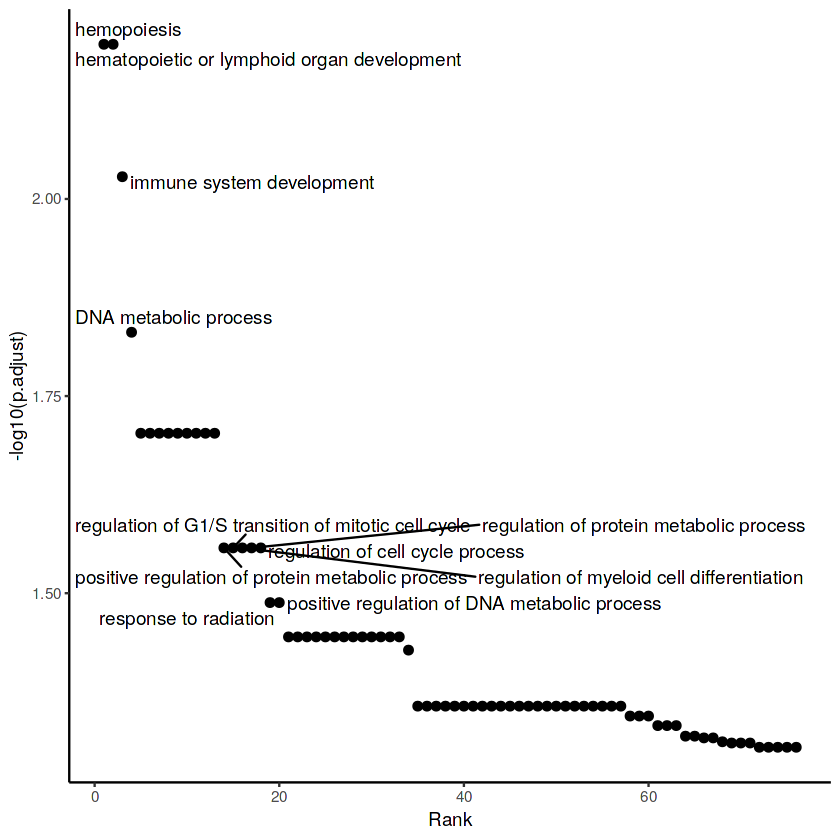

In [187]:
p = e %>% 
    as.data.frame() %>% 
    arrange(p.adjust) %>% 
    dplyr::mutate(x_coord = 1:nrow(e %>% as.data.frame())) %>%
    ggplot(aes(x = x_coord, y = -log10(p.adjust), label = Description)) + 
    geom_point(size = 2) + 
    xlab("Rank") +
    ggrepel::geom_text_repel(aes(x = x_coord, y = -log10(p.adjust), label = Description),
                             force = 10) +
    theme_classic()
p

In [188]:
e %>% arrange(p.adjust) %>% head()

ID         Description                                    GeneRatio
GO:0030097 GO:0030097 hemopoiesis                                    20/75    
GO:0048534 GO:0048534 hematopoietic or lymphoid organ development    20/75    
GO:0002520 GO:0002520 immune system development                      20/75    
GO:0006259 GO:0006259 DNA metabolic process                          19/75    
GO:0009605 GO:0009605 response to external stimulus                  19/75    
GO:1902806 GO:1902806 regulation of cell cycle G1/S phase transition 7/75     
           BgRatio pvalue       p.adjust    qvalue     
GO:0030097 81/786  1.659686e-05 0.006364896 0.004961588
GO:0048534 81/786  1.659686e-05 0.006364896 0.004961588
GO:0002520 85/786  3.665082e-05 0.009370394 0.007304445
GO:0006259 82/786  7.697029e-05 0.014759053 0.011505033
GO:0009605 86/786  1.567791e-04 0.019821718 0.015451501
GO:1902806 15/786  1.890434e-04 0.019821718 0.015451501
           geneID                                                                                                     
GO:0030097 CBFA2T3/CEBPG/DPF2/EZH2/FOS/KAT7/KLF1/KLF6/LEF1/MYC/PML/RB1/RBM15/RCOR1/RUNX1/SMARCA4/TCF7/TFE3/XRCC5/ZBTB1
GO:0048534 CBFA2T3/CEBPG/DPF2/EZH2/FOS/KAT7/KLF1/KLF6/LEF1/MYC/PML/RB1/RBM15/RCOR1/RUNX1/SMARCA4/TCF7/TFE3/XRCC5/ZBTB1
GO:0002520 CBFA2T3/CEBPG/DPF2/EZH2/FOS/KAT7/KLF1/KLF6/LEF1/MYC/PML/RB1/RBM15/RCOR1/RUNX1/SMARCA4/TCF7/TFE3/XRCC5/ZBTB1
GO:0006259 CEBPG/CTCF/DPF2/E2F8/EZH2/FOS/KAT7/LEF1/MCM2/MTA1/MYC/NFIX/PML/RAD51/SMARCA4/TCF7/TFDP1/XRCC5/ZBTB1        
GO:0009605 ASH1L/CEBPG/ELF4/FOS/FOXK1/HNRNPL/HNRNPUL1/LEF1/MAX/MTA1/PML/RB1/RBM4/SP1/TRIM24/TRIM25/USF2/XRCC5/ZBTB1   
GO:1902806 DPF2/EZH2/PML/RB1/SMARCA4/TAF1/TFDP1                                                                       
           Count
GO:0030097 20   
GO:0048534 20   
GO:0002520 20   
GO:0006259 19   
GO:0009605 19   
GO:1902806  7

In [189]:
e %>% write.table('../out/tables/TableSupp_GOBP_FigS2H.tsv', sep = '\t', quote = F, col.names = T, row.names = F)

# Fig. 3 and S3: Romain

## ZNF519 expression is rhythmic

svg 
  3

png 
  2

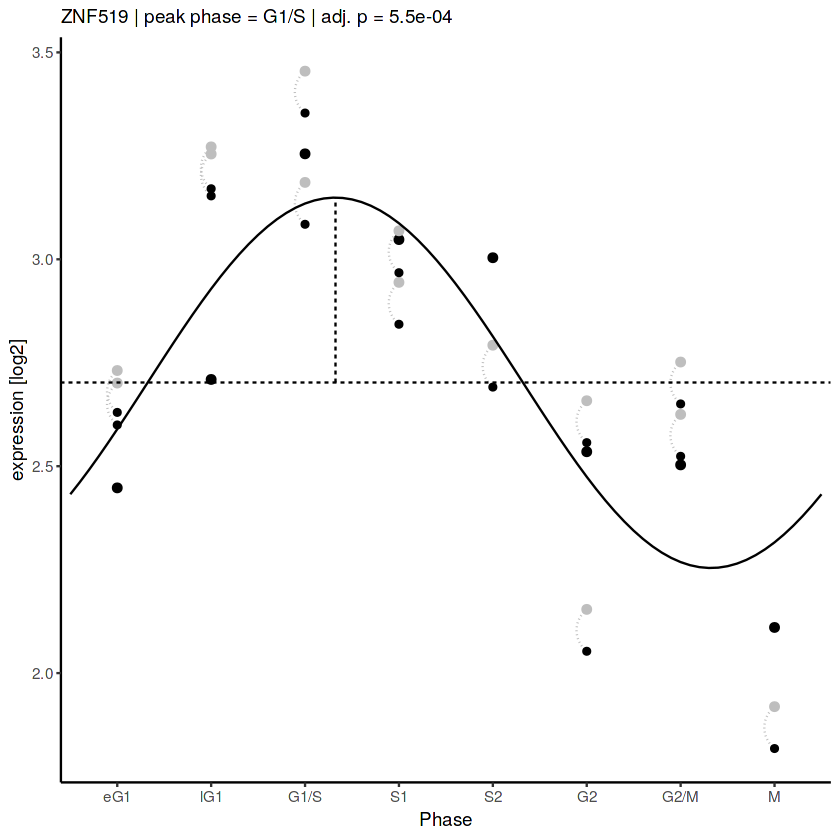

In [190]:
plot_rhythmic_expression("ZNF519")
dev.copy(svg, filename = '../out/cell_cycle_figures/ZNF519_rhythmic_expr.svg', width = 4, height = 4)
dev.off()

## Are ZNF519 true targets over-represented in genes that go in the expected direction in the KD and OE?

All genes in the ZNF519 DE analysis

| | genes with ZNF519 peak | genes without ZNF519 peak | total |
|---|:---:|:---:|:---:|
| Genes in wrong dir. | x | m-x | m |
| Genes in consistant dir. | k-x | n-(k-x) | n |
| total | k | (m+n-k) | m+n |

In [191]:
x_observed = 2697
k = 2697 + 501
m = 13257 + 2697
n = 501 + 1173


In [192]:
x = 0:m # is the variable tested
probs <- dhyper(x, m, n, k, log = FALSE)


# we compute the probability of observing a more extreme enrichment, therefore using a one sided test. 
pval_one_sided = sum(probs[x<=x_observed])

# we make the test two-sided, by summing the probabilities that are smaller or equal to our pval
pval_two_sided = sum(probs[probs <= pval_one_sided])

pval_two_sided


[1] 3.750194e-35

# Fig. 4

## Rhythmic expression of human transcription factors

In [193]:
rhythm %>% colnames()

[1] "ensembl"           "entrez"            "symbol"           
 [4] "genename"          "chr"               "start"            
 [7] "end"               "strand"            "coding"           
[10] "obs"               "mesor"             "amplitude"        
[13] "acrophase"         "rsquared"          "df.model"         
[16] "df.residual"       "statistic"         "pvalue"           
[19] "period"            "beta"              "gamma"            
[22] "delta"             "beta_2.5"          "beta_97.5"        
[25] "gamma_2.5"         "gamma_97.5"        "amplitude_2.5"    
[28] "amplitude_97.5"    "acrophase_2.5"     "acrophase_97.5"   
[31] "phase"             "phase_2.5"         "phase_97.5"       
[34] "phase_lower_upper" "phase_upper_lower" "padj"             
[37] "stars"             "phase_rounded"     "phase_gating"     
[40] "phase_assigned"

In [194]:
spring_pastels = c("#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7")
plot_selection = rhythm %>% dplyr::left_join(., gene_metadata) %>% dplyr::filter(padj < 0.05, isTF) %>% arrange(acrophase)

Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`


In [195]:
plot_selection$isKZFP %>% table()

.
FALSE  TRUE 
  353   115 

In [196]:
plot_selection$isC2H2 %>% table()

.
FALSE  TRUE 
  234   234 

In [197]:
plot_selection$tf_category %>% table()

.
C2H2 ZF    KZFP      TF 
    119     115     234 

In [198]:
plot_selection$tf_category_plot = ifelse(plot_selection$tf_category == "C2H2 ZF", yes = "TF", no = plot_selection$tf_category)

In [199]:
plot_selection$tf_category_plot %>% table()

.
KZFP   TF 
 115  353 

In [200]:
# FRACTION OF RHYTHMIC TFs vs detected TFs
plot_selection %>% nrow() # rhythmic TFs
rhythm %>% dplyr::left_join(., gene_metadata) %>% dplyr::filter(isTF) %>% nrow() # detected TFs

[1] 468

Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`


[1] 1216

In [201]:
(plot_selection %>% nrow()) / (rhythm %>% dplyr::left_join(., gene_metadata) %>% dplyr::filter(isTF) %>% nrow())

Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`


[1] 0.3848684

In [202]:
plot_selection %>% dplyr::filter(tf_category == "KZFP") %>% nrow()

(plot_selection %>% dplyr::filter(tf_category == "KZFP") %>% nrow()) / (rhythm %>% dplyr::left_join(., gene_metadata) %>% dplyr::filter(isKZFP) %>% nrow())

[1] 115

Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`


[1] 0.3333333

In [203]:
rhythm %>% nrow()

[1] 13749

In [204]:
(rhythm %>% dplyr::filter(padj < 0.05) %>% nrow()) / (rhythm %>% nrow())

[1] 0.3559532

In [205]:
plot_selection$tf_category_plot = factor(plot_selection$tf_category_plot, levels = c("TF", "KZFP"))

In [206]:
gene_category = c("#000000", "#FF681FCD")
names(gene_category) = levels(plot_selection$tf_category_plot)

In [207]:
cols = list(
            RT = colorRamp2(breaks = seq(from = 2.5, to = 4.5, length.out = 4), colors = viridis::viridis(4)),
            `bas. expr.` = colorRamp2(breaks = c(-2.5, 2.5, 4, 6, 10), colors = viridis::mako(5)),
             RIF1 =  colorRamp2(c(-0.5, -0.2, 0, 0.2, 0.5), hcl.colors(n = 5, palette = "Cividis", rev = F)),
           `cat.` = gene_category
)

In [208]:
# genes to highlight
genes_to_label = c("ZNF783", "ZNF786", "ZNF519", "ZNF274")               

genes_to_label_idx = match(genes_to_label, (plot_selection %>% dplyr::filter(padj < 0.05) %>% arrange(acrophase) %>% pull(symbol)))

label_annotation = ComplexHeatmap::rowAnnotation(foo = anno_mark(at = genes_to_label_idx, side = "left", padding = 2,
    labels = genes_to_label))

In [209]:
# KZFP rich regions in M/G1

idx_kzfp_1 = 1
idx_kzfp_2 = plot_selection %>% 
    dplyr::select(tf_category, phase_assigned) %>% 
    dplyr::mutate(idx = 1:nrow(plot_selection)) %>% 
    dplyr::filter(tf_category == "KZFP", phase_assigned == "lG1") %>% 
    dplyr::pull(idx) %>% 
    max

idx_kzfp_2

[1] 69

In [210]:
idx_kzfp_3 = plot_selection %>% 
    dplyr::select(tf_category, phase_assigned) %>% 
    dplyr::mutate(idx = 1:nrow(plot_selection)) %>% 
    dplyr::filter(tf_category == "KZFP", phase_assigned == "M") %>% 
    dplyr::pull(idx) %>% 
    min
idx_kzfp_4 = nrow(plot_selection)

idx_kzfp_3

[1] 380

In [211]:
# indicating KZFP-rich regions
panel_fun = function(index, nm) {
    #pushViewport(viewport(xscale = c(-0.1, 0.1), yscale = c(-1, 1)))
    #grid.rect()
    #grid.xaxis(gp = gpar(fontsize = 8))
    t = ifelse(index < idx_kzfp_3, yes = "G1 KZFPs", no = "M KZFPs")
    grid.text(label = t, x = 2.5, y = 0.5, gp = gpar(fontsize = 9))
    #popViewport()
}

align_to = list(KZFP_g1 = idx_kzfp_1:idx_kzfp_2,
                KZFP_m = idx_kzfp_3:idx_kzfp_4)

In [212]:
anno = anno_link(align_to = align_to, which = "row", panel_fun = panel_fun, 
    size = unit(0, "cm"), gap = unit(0, "cm"), width = unit(0, "cm"), side = "left")
label_annotation = ComplexHeatmap::rowAnnotation(foo = anno_mark(at = genes_to_label_idx, side = "left", padding = 2,
    labels = genes_to_label, labels_gp = gpar(fontsize = 9)), bar = anno)

In [213]:
row_anno = plot_selection %>% dplyr::select(RTindex_K562, RIF1_tss_body, mesor, tf_category_plot) %>% 
    dplyr::rename(RT = RTindex_K562, RIF1 = RIF1_tss_body, `bas. expr.` = mesor, `cat.` = tf_category_plot)
ha = rowAnnotation(df = row_anno, col = cols)
plot_order = plot_selection$ensembl

In [214]:
expr_color = colorRamp2(breaks = c(-2, -1, 0, 1, 2), colors = hcl.colors(5, palette = "RdBu", rev = T))

svg 
  3

png 
  2

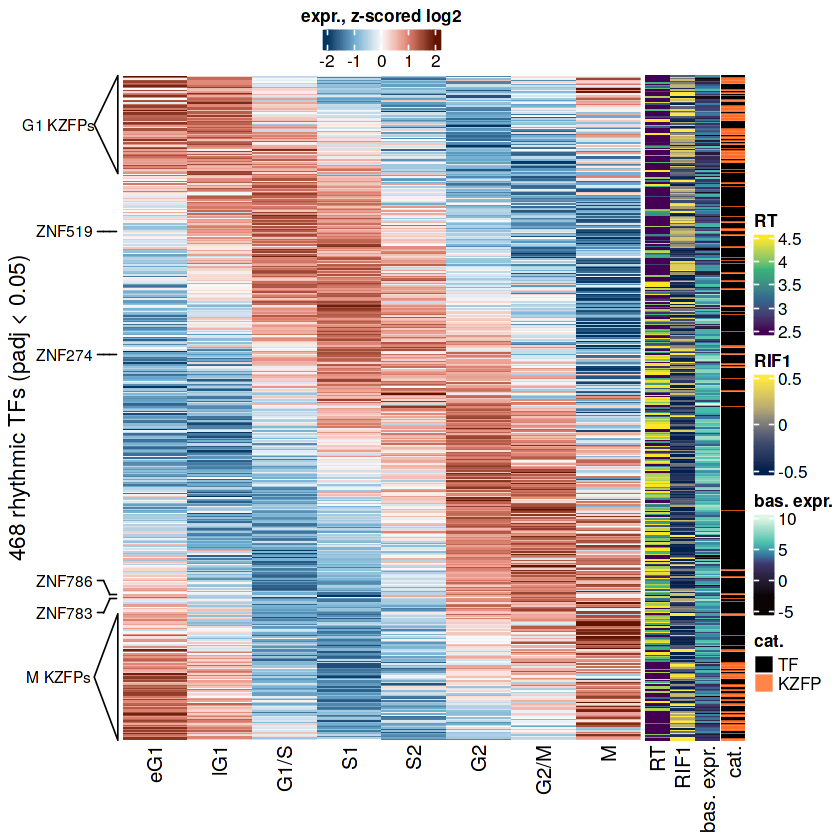

In [215]:
# compressed, no TF names
# all cycling TFs
plot_order = plot_selection$ensembl
n_rhythmic = length(plot_order)
to_plot = expr_zscore[plot_order, ]
rownames(to_plot) = (gene_metadata %>% column_to_rownames('ensembl'))[plot_order, 'symbol']
colnames(to_plot) = rhythm$phase_assigned %>% levels()
htmp = Heatmap(to_plot,
        name = 'expr., z-scored log2', 
        show_row_names = F,
        cluster_rows = FALSE, 
        cluster_columns = FALSE,
        row_title = paste0(n_rhythmic, ' rhythmic TFs (padj < 0.05)'),
        heatmap_legend_param = list(
            title = "expr., z-scored log2",
            direction = "horizontal",
            title_position = "topcenter"),
        right_annotation = ha,
        left_annotation = label_annotation,
       row_names_gp = grid::gpar(fontsize = 7),
      col = expr_color,
      use_raster = T,
       raster_quality = 5,
       raster_by_magick = TRUE) %v% NULL

draw(htmp, heatmap_legend_side="top", annotation_legend_side="right")
dev.copy(svg, '../out/cell_cycle_figures/cycling_TFs_no_names_heatmap.svg', height = 5, width = 5)
dev.off()

## Proportions of TFs and KZFPs that peak in M-to-S1 vs. S2-to-G2/M


Computing the enrichment using Fisher's exact test: https://www.pathwaycommons.org/guide/primers/statistics/fishers_exact_test/

The two gene categories are (among all significantly rhythmic genes):
- KZFP
- TF excluding KZFPs

The two acrophase categories are:
- phi in [S1-G2]
- phi in [M-G1/S]



In [216]:
k = plot_selection %>% dplyr::filter(tf_category == "KZFP") %>% nrow() # number of KZFPs

acr = c( "S2", "G2", "G2/M")

m = plot_selection %>% dplyr::filter(phase_assigned %in% acr) %>% nrow() # number of TFs in S-G2

n = plot_selection %>% dplyr::filter(!phase_assigned %in% acr) %>% nrow() # number of TFs in M-G1/S

x = 0:m # is the variable tested

x_observed = plot_selection %>% dplyr::filter(tf_category == "KZFP", phase_assigned %in% acr) %>% nrow() # number of KZFPs in S-G2,

probs <- dhyper(x, m, n, k, log = FALSE)

# we compute the probability of observing a more extreme depletion, therefore using a one sided test. 

pval_kzfp_vs_TFs_one_sided = sum(probs[x<=x_observed])

# we make the test two-sided, by summing the probabilities that are smaller or equal to our pval
pval_kzfp_vs_TFs_two_sided = sum(probs[probs <= pval_kzfp_vs_TFs_one_sided])
pval_kzfp_vs_TFs_two_sided
x_observed
k

[1] 1.309668e-13

[1] 14

[1] 115

Same test but with KRAB-less C2H2 ZFs vs other TFs

In [217]:
plot_selection$phase_assigned %>% table()

.
 eG1  lG1 G1/S   S1   S2   G2 G2/M    M 
  48   47   55   63   53   64   71   67 

In [218]:
k = plot_selection %>% dplyr::filter(tf_category == "C2H2 ZF") %>% nrow() # number of KRAB-less C2H2

m = plot_selection %>% dplyr::filter(phase_assigned %in% acr) %>% nrow() # number of TFs in S-G2

n = plot_selection %>% dplyr::filter(!phase_assigned %in% acr) %>% nrow() # number of TFs in M-G1/S

x = 0:m # is the variable tested

x_observed = plot_selection %>% dplyr::filter(tf_category == "C2H2 ZF", phase_assigned %in% acr) %>% nrow() # number of KRAB-less C2H2 in S-G2,

probs <- dhyper(x, m, n, k, log = FALSE)

# we compute the probability of observing a more extreme depletion, therefore using a one sided test. 

pval_c2h2_vs_TFs_one_sided = 1-sum(probs[x<=x_observed])

# we make the test two-sided, by summing the probabilities that are smaller or equal to our pval
pval_c2h2_vs_TFs_two_sided = sum(probs[probs <= pval_c2h2_vs_TFs_one_sided])
pval_c2h2_vs_TFs_two_sided

[1] 1

In [219]:
# same for rhythmic TFs amongst rhythmic genes

k = plot_selection %>% nrow() # number of rhythmic TFs

m = rhythm %>% dplyr::filter(padj < 0.05, phase_assigned %in% acr) %>% nrow() # number of genes in S-G2

n = rhythm %>% dplyr::filter(padj < 0.05, !phase_assigned %in% acr) %>% nrow() # number of genes in M-G1/S

x = 0:m # is the variable tested

x_observed = plot_selection %>% dplyr::filter(phase_assigned %in% acr) %>% nrow() # number of TFs in S-G2,

probs <- dhyper(x, m, n, k, log = FALSE)

# we compute the probability of observing a more extreme depletion, therefore using a one sided test. 

pval_TFs_vs_genes_one_sided = 1-sum(probs[x<=x_observed])

# we make the test two-sided, by summing the probabilities that are smaller or equal to our pval
pval_TFs_vs_genes_two_sided = sum(probs[probs <= pval_TFs_vs_genes_one_sided])
pval_TFs_vs_genes_two_sided

x_observed
k
m

[1] 1

[1] 188

[1] 468

[1] 2147

In [220]:
n_tf_left = plot_selection %>% dplyr::filter(phase_assigned %in% acr, tf_category == "TF") %>% nrow()
n_kzfp_left = plot_selection %>% dplyr::filter(phase_assigned %in% acr, tf_category == "KZFP") %>% nrow()
n_C2H2_left = plot_selection %>% dplyr::filter(phase_assigned %in% acr, tf_category == "C2H2 ZF") %>% nrow()

n_tf_right = plot_selection %>% dplyr::filter(!phase_assigned %in% acr, tf_category == "TF") %>% nrow()
n_kzfp_right = plot_selection %>% dplyr::filter(!phase_assigned %in% acr, tf_category == "KZFP") %>% nrow()
n_C2H2_right = plot_selection %>% dplyr::filter(!phase_assigned %in% acr, tf_category == "C2H2 ZF") %>% nrow()

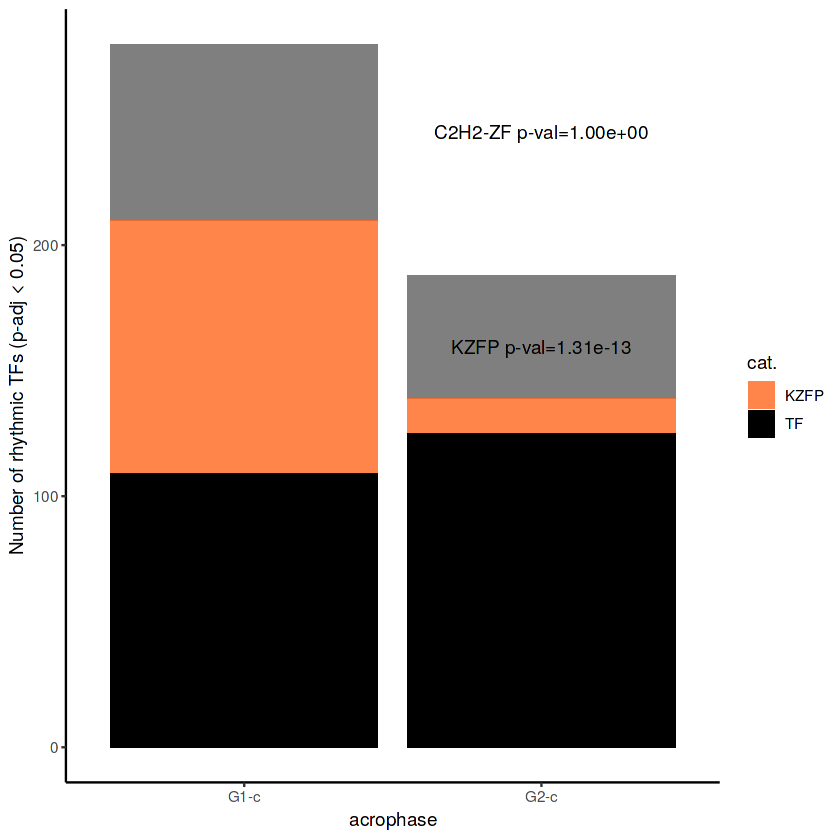

In [221]:
p = plot_selection %>% dplyr::rename(`cat.`=tf_category) %>% ggplot(aes(ifelse(phase_assigned %in% acr, yes = "G2-c", no = "G1-c"), fill = `cat.`)) + 
    geom_bar() + 
    ggplot2::scale_fill_manual(values = cols$`cat.`) + 
    theme_classic() + 
    ylab("Number of rhythmic TFs (p-adj < 0.05)") + 
    xlab("acrophase") + 
    annotate(geom="text", x=2, y=n_tf_right+n_kzfp_right/2, label=paste0("KZFP p-val=", formatC(pval_kzfp_vs_TFs_two_sided, format = 'e', digits=2))) + 
    annotate(geom="text", x=2, y=n_tf_right+n_kzfp_right + n_C2H2_right/2, label=paste0("C2H2-ZF p-val=", formatC(pval_c2h2_vs_TFs_two_sided, format = 'e', digits=2)))
p
ggsave("../out/cell_cycle_figures/KFZPs_vs_TFs_enrichment.svg", p, svg, height = 4, width = 5)


In [222]:
plot_selection %>% dplyr::filter(phase_assigned %in% c("S2", "G2", "G2/M"), isKZFP)

ensembl         entrez    symbol  genename                                
1  ENSG00000196793      8187 ZNF239  zinc finger protein 239                 
2  ENSG00000198551    199692 ZNF627  zinc finger protein 627                 
3  ENSG00000171606     10782 ZNF274  zinc finger protein 274                 
4  ENSG00000169951     92595 ZNF764  zinc finger protein 764                 
5  ENSG00000155592    342357 ZKSCAN2 zinc finger with KRAB and SCAN domains 2
6  ENSG00000177873    285267 ZNF619  zinc finger protein 619                 
7  ENSG00000156853    115509 ZNF689  zinc finger protein 689                 
8  ENSG00000130844     55422 ZNF331  zinc finger protein 331                 
9  ENSG00000166526      7551 ZNF3    zinc finger protein 3                   
10 ENSG00000196652     23660 ZKSCAN5 zinc finger with KRAB and SCAN domains 5
11 ENSG00000181220    155061 ZNF746  zinc finger protein 746                 
12 ENSG00000197362    136051 ZNF786  zinc finger protein 786                 
13 ENSG00000204946 100289678 ZNF783  zinc finger family member 783           
14 ENSG00000267041    342892 ZNF850  zinc finger protein 850                 
   chr   start     end       strand coding obs ⋯ Age.Years.Coudray
1  chr10  44051792  44070066 -      TRUE   22  ⋯ 105.0            
2  chr19  11670189  11729950 +      TRUE   22  ⋯  75.9            
3  chr19  58694396  58724928 +      TRUE   22  ⋯ 105.0            
4  chr16  30565085  30569819 -      TRUE   22  ⋯ 105.0            
5  chr16  25247322  25269252 -      TRUE   22  ⋯ 179.2            
6  chr3   40518604  40531727 +      TRUE   22  ⋯ 105.0            
7  chr16  30613879  30635333 -      TRUE   22  ⋯ 105.0            
8  chr19  54024235  54083523 +      TRUE   22  ⋯ 105.0            
9  chr7   99661656  99680171 -      TRUE   22  ⋯ 163.7            
10 chr7   99102274  99132323 +      TRUE   22  ⋯ 163.7            
11 chr7  149169885 149194908 -      TRUE   22  ⋯ 179.2            
12 chr7  148766735 148787874 -      TRUE   22  ⋯ 105.0            
13 chr7  148959262 148994393 +      TRUE   22  ⋯ 320.5            
14 chr19  37205285  37263727 -      TRUE   22  ⋯  29.1            
   Age.Species.Coudray       gene_Interval.GenOrigin gene_branch.GenOrigin
1  Hoffmann's two-toed sloth 159-177                 21                   
2  Gray mouse lemur          67-74                   27                   
3  Cape golden mole          105-159                 22                   
4  Cape golden mole          952-1023                 8                   
5  Platypus                  159-177                 21                   
6  West Indian manatee       67-74                   27                   
7  Cape golden mole          952-1023                 8                   
8  Cape golden mole          96-105                  23                   
9  Tammar wallaby            177-312                 20                   
10 Tammar wallaby            159-177                 21                   
11 Platypus                  352-413                 18                   
12 African bush elephant     105-159                 22                   
13 Green sea turtle          312-352                 19                   
14 Sooty mangabey            29-43                   29                   
   gene_age.GenOrigin branch.GenTree clade.GenTree age.GenTree age_combined
1  168                 5             Eutheria      104.7       105.0       
2   70                 3             Mammalia      220.2        75.9       
3  132                 4             Theria        176.1       105.0       
4  987                 4             Theria        176.1       105.0       
5  168                 3             Mammalia      220.2       179.2       
6   70                 5             Eutheria      104.7       105.0       
7  987                 4             Theria        176.1       105.0       
8  101                NA             NA               NA       105.0       
9  244             

## Age of M-to-S1 vs S2-to-G2/M KZFPs

In [224]:
plot_selection = rhythm %>% 
    dplyr::left_join(., gene_metadata) %>%
    dplyr::filter(!is.na(age_combined), padj < 0.05, isKZFP)
age_means= plot_selection %>%
    dplyr::mutate(in_S2_to_M = phase_assigned %in% acr) %>%
    dplyr::group_by(in_S2_to_M) %>% 
    dplyr::summarize(age_mean = mean(age_combined), n_kzfps = n())
age_means

Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`


in_S2_to_M age_mean  n_kzfps
1 FALSE       80.75437 103    
2  TRUE      166.08667  15

In [225]:
age_means_diff_observed = diff(age_means$age_mean)
age_means_diff_observed

[1] 85.3323

Now, running permutations: we split the KZFPs in groups of the same size as the one observed and compute the difference in mean age. 

In [226]:
to_permute = plot_selection %>% dplyr::pull(age_combined)
stopifnot(length(to_permute) == (age_means$n_kzfps %>% sum()))

In [227]:
to_permute %>% head()

[1]  29.1  29.1  97.5 105.0 105.0 179.2

In [228]:
set.seed(5)
k_draws = 1e6
diff_means_permuted = rep(NA, times = k_draws)
for (i in c(1:k_draws)) {
    s = sample(1:length(to_permute), size = min(age_means$n_kzfps), replace = F) 
    diff_means_permuted[i] = (to_permute[s] %>% mean()) - (to_permute[-s] %>% mean())
    }

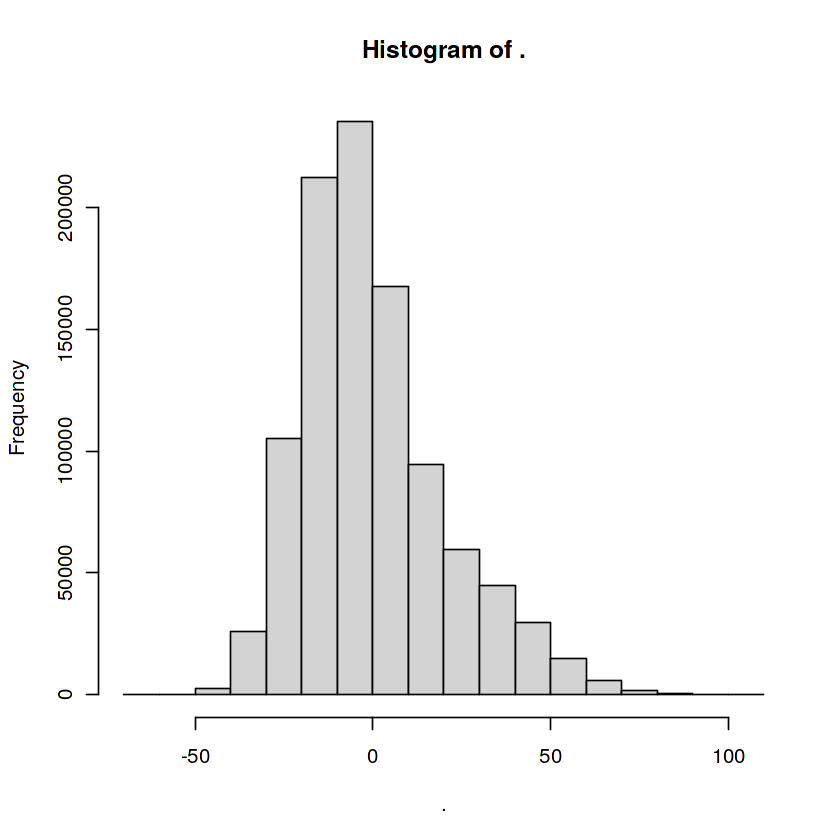

In [229]:
diff_means_permuted %>% hist()

In [230]:
permute_pval = sum(abs(diff_means_permuted) > age_means_diff_observed)/k_draws
permute_pval

[1] 0.000151

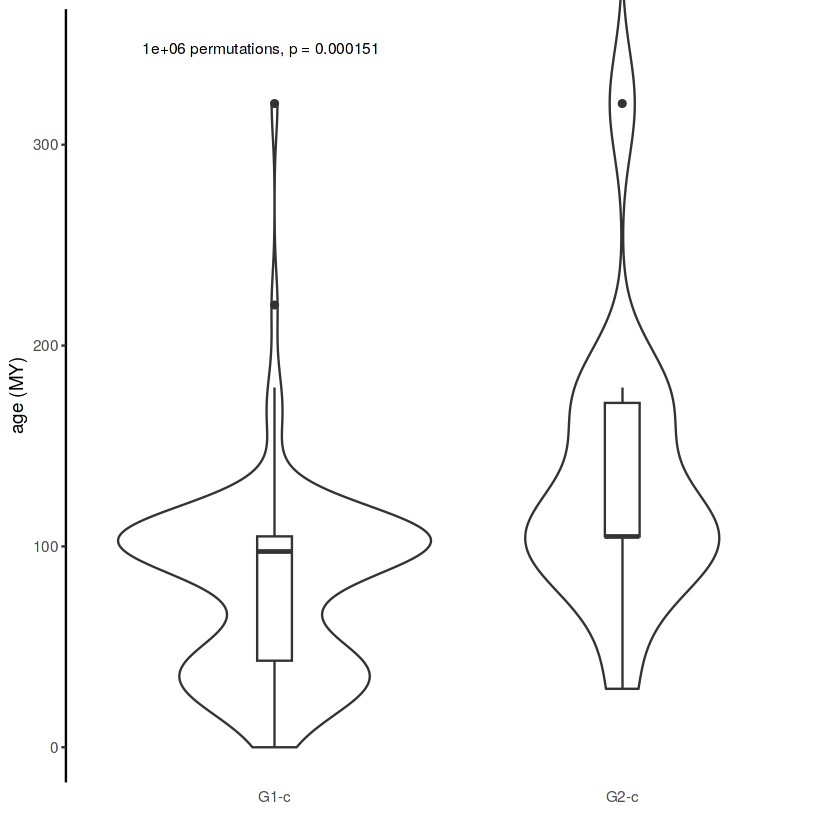

In [231]:
library(grid)
# Create a text
grob <- grobTree(textGrob(paste0(as.character(k_draws), " permutations, p = ", as.character(permute_pval)), x=0.1,  y=0.95, hjust=0, gp=gpar(fontsize=9)))
# Plot
p = plot_selection %>% 
    ggplot(aes(x = phase_assigned %in% acr, y = age_combined)) + 
    geom_violin() + 
    geom_boxplot(width = 0.1, outliers = T) +
    #geom_point(position = position_jitter(width = 0.1, height = NULL), size = 0.6) + 
    #stat_compare_means(label.x = 0.9, label.y = 330, step.increase = 1) + # wilcoxon is not correct when there are many ties
    theme_classic() + 
    theme(axis.ticks.x=element_blank(), axis.line.x = element_blank()) + 
    xlab("") + ylab("age (MY)") + 
    scale_x_discrete(breaks=c(F, T),
        labels=c("G1-c", "G2-c")) + 
    coord_cartesian(ylim = c(0, 350),
                      clip = 'off') +
    annotation_custom(grob)
p

In [232]:
ggsave('../out/cell_cycle_figures/KZFPs_acrophase_vs_age.svg', p, svg, width = 3, height = 3)

## Fraction of rhythmic KZFPs undergoing an H3K9me3 loss on their zinc finger encoding array upon ZNF274 KD

TODO doublecheck delta ZNF274KO znf assignations, results are strange

In [233]:
plot_selection = rhythm %>% 
    dplyr::left_join(., gene_metadata) %>%
    dplyr::filter(isKZFP, padj < 0.05, !is.na(deltaK9_ZNF274KO_znf))

Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`


In [234]:
enrich_stats = plot_selection %>% 
    dplyr::arrange(cluster, acrophase) %>% 
    dplyr::select(padj, phase_assigned, cluster, deltaK9_ZNF274KO_znf)
colnames(enrich_stats)

[1] "padj"                 "phase_assigned"       "cluster"             
[4] "deltaK9_ZNF274KO_znf"

On all RIF1-low KZFPs:

| | KZFPs with K9 loss | KZFPs without K9 loss | total |
|---|:---:|:---:|:---:|
| M-to-S1 KZFPs | x | m-x | m |
| S2-to-G2 KZFPs | k-x | n-(k-x) | n |
| total | k | (m+n-k) | m+n |

In [235]:
#clusters_rif1high = c("chr6.1", "chr19.8", "chr19.9", "chr19.11")


In [236]:
k = nrow(enrich_stats %>% dplyr::filter(deltaK9_ZNF274KO_znf))
k

[1] 77

In [237]:
acr = c('S2','G2','G2/M')

In [238]:
x_observed = nrow(plot_selection %>% dplyr::filter(deltaK9_ZNF274KO_znf, !phase_assigned %in% acr))
x_observed

[1] 73

In [239]:
m = nrow(enrich_stats %>% dplyr::filter(!phase_assigned %in% acr))
n = nrow(enrich_stats %>% dplyr::filter(phase_assigned %in% acr))

m
n

[1] 101

[1] 14

In [240]:
x = 0:m # is the variable tested
probs <- dhyper(x, m, n, k, log = FALSE)


# we compute the probability of observing a more extreme enrichment, therefore using a one sided test. 
pval_one_sided = sum(probs[x>=x_observed])

# we make the test two-sided, by summing the probabilities that are smaller or equal to our pval
pval_two_sided = sum(probs[probs <= pval_one_sided])

pval_two_sided


[1] 0.002067934

In [241]:
enrich_stats %>% head()

padj        phase_assigned cluster deltaK9_ZNF274KO_znf
1 0.046343428 S1             chr1.2  TRUE                
2 0.023412547 M              chr1.2  TRUE                
3 0.005360646 eG1            chr10.3 TRUE                
4 0.030567825 S2             chr10.3 TRUE                
5 0.018537778 eG1            chr12.1 TRUE                
6 0.031259733 lG1            chr12.1 TRUE

In [242]:
enrich_data_for_plot = enrich_stats %>% 
dplyr::mutate(H3K9me3 = c("H3K9me3 unaffected", "H3K9me3 loss")[ifelse(test = (deltaK9_ZNF274KO_znf),
                                     yes = T,
                                     no = F)+1],
              acr_group = c("G1-c", "G2-c")[phase_assigned %in% acr+1]) %>%
    dplyr::select(H3K9me3, acr_group) %>% 
    table() %>% 
    as.data.frame()
enrich_data_for_plot

H3K9me3            acr_group Freq
1 H3K9me3 loss       G1-c      73  
2 H3K9me3 unaffected G1-c      28  
3 H3K9me3 loss       G2-c       4  
4 H3K9me3 unaffected G2-c      10

In [243]:
total_kzfps = enrich_data_for_plot %>% dplyr::group_by(acr_group) %>% dplyr::summarize(total_KZFPs = sum(Freq))
total_kzfps$y_label = 1.05
total_kzfps$x_label = c(1, 2)

In [244]:
enrich_data_for_plot

H3K9me3            acr_group Freq
1 H3K9me3 loss       G1-c      73  
2 H3K9me3 unaffected G1-c      28  
3 H3K9me3 loss       G2-c       4  
4 H3K9me3 unaffected G2-c      10

svg 
  3

png 
  2

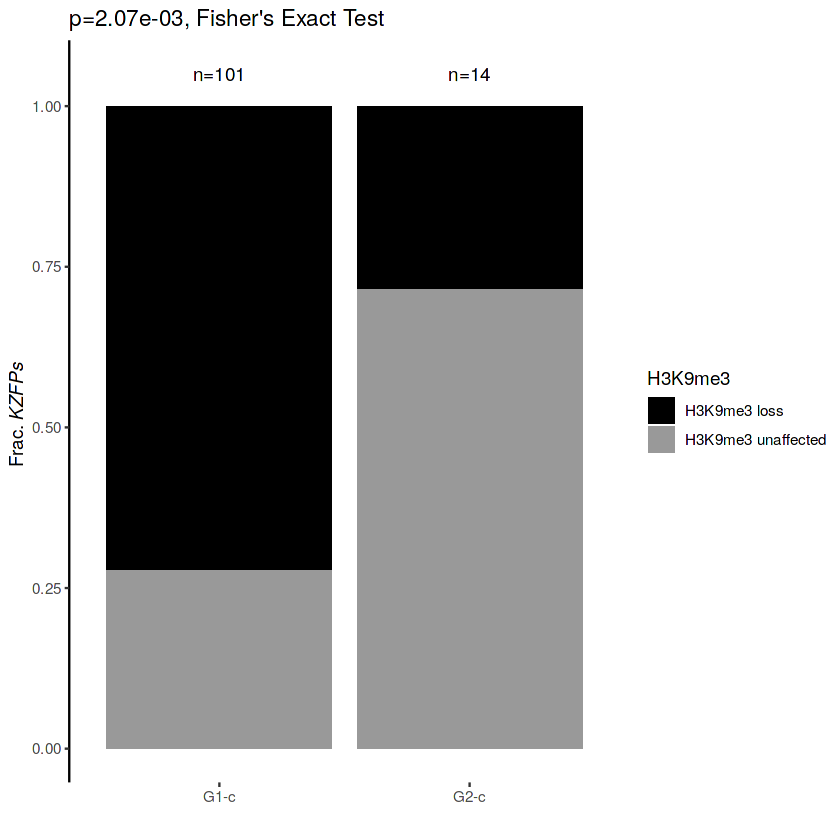

In [245]:
enrich_data_for_plot %>%
    ggplot(aes(x = acr_group, y = Freq, fill = H3K9me3)) + 
    geom_col(position = "fill") + 
    theme_classic() + 
    scale_fill_manual(values = c("black", "grey60")) +
    ylab(expression(paste("Frac. ", italic("KZFPs"), collapse = " "))) + 
    xlab("") + 
    geom_text(data = total_kzfps, aes(x = x_label, y = y_label, label = paste0("n=",as.character(total_KZFPs)), fill = NULL)) +
    theme(axis.line.x = element_blank()) + 
    ggtitle(paste0("p=", format(pval_two_sided, scientific = T, digits = 3), ", Fisher's Exact Test"))

dev.copy(svg, "../out/cell_cycle_figures/deltaK9_enrichment_KZFPs.svg", width = 3.5, height = 2.2)
dev.off()

### ZNF274 binding in K562 at M-to-S1 vs S2-to-G2/M KZFPs

In [246]:
acr = c("S2", "G2", "G2/M")

Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_compare_means()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_hline()`).”


svg 
  3

png 
  2

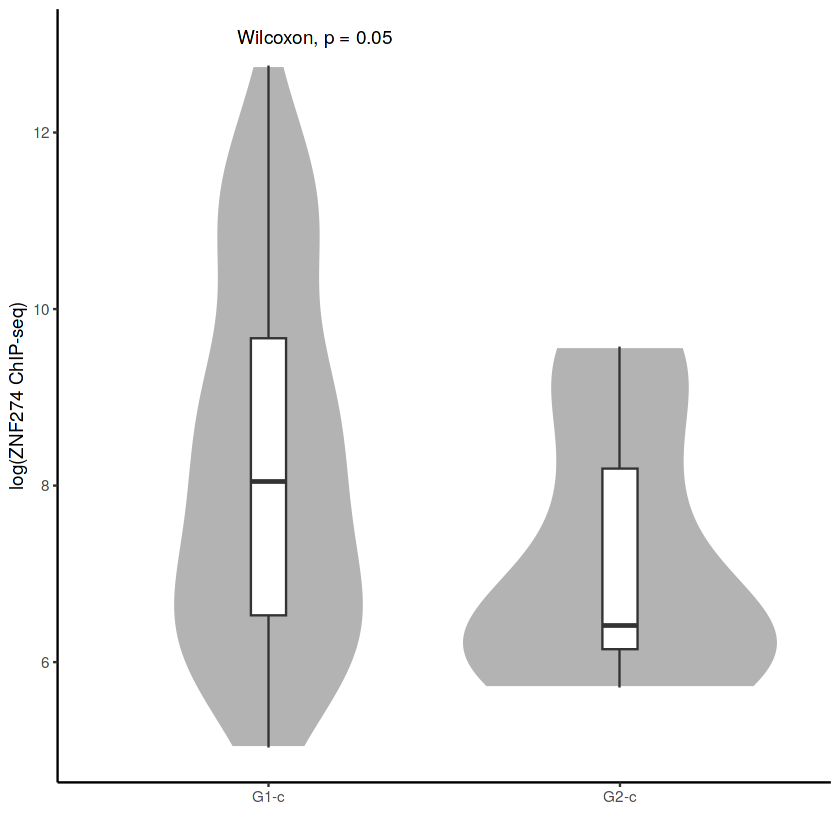

In [247]:
plot_selection = rhythm %>% 
    dplyr::left_join(., gene_metadata) %>%
    dplyr::filter(isKZFP, padj < 0.05)

plot_selection %>% ggplot(aes(x = c("G1-c", "G2-c")[phase_assigned %in% acr+1], y = log(ZNF274_znfs+1))) + 
geom_violin(fill = "grey70", col = "white") + 
geom_boxplot(outlier.shape=NA, width = 0.1) + 
geom_hline(yintercept = median(log(plot_selection %>% dplyr::filter(padj < 0.05, !phase_assigned %in% acr) %>% pull(ZNF274_znfs) + 1)), lty = 2) +
theme_classic() + 
ylab("log(ZNF274 ChIP-seq)") +
xlab("") +
ggpubr::stat_compare_means(label.y = 13)
#ggtitle(paste0("p-val=", formatC(t.274_znfs$p.value, format = "e", digits = 2)))
dev.copy(svg, "../out/cell_cycle_figures/znf274_rhythmic_KZFPs_znfs_s2-g2_vs_m-g1s.svg", height = 3, width = 2)
dev.off()

### Fold change upon ZNF274KO in unsorted 293Ts

Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`


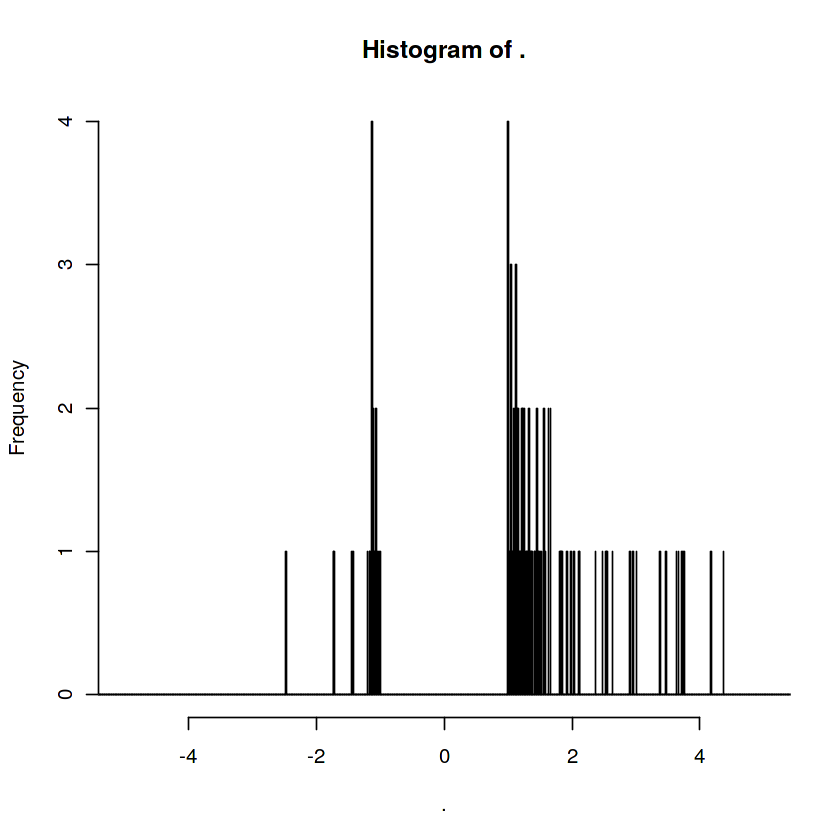

In [248]:
rhythm %>% 
    dplyr::left_join(., gene_metadata) %>%
    dplyr::filter(isKZFP, padj < 0.05) %>% dplyr::pull(foldChange_ZNF274KO_vs_WT_HEK293T) %>% hist(xlim = c(-5, 5), breaks = 100000)

In [249]:
plot_selection = rhythm %>% 
    dplyr::left_join(., gene_metadata) %>%
    dplyr::filter(isKZFP, padj < 0.05) %>% 
    dplyr::mutate(logFC = log(foldChange_ZNF274KO_vs_WT_HEK293T^sign(foldChange_ZNF274KO_vs_WT_HEK293T)+1))

Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`


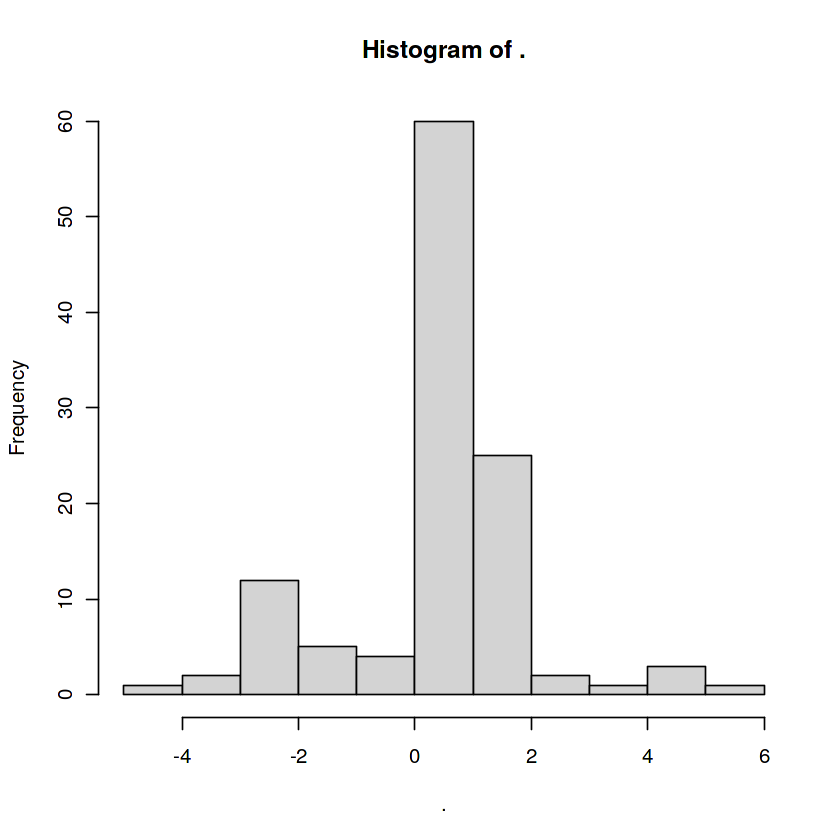

In [250]:
plot_selection$logFC %>% hist()

In [251]:
plot_selection$logFC

[1]  0.883961484  0.736214391  0.742997177 -2.137516483  1.476994404
  [6]  0.753564671  1.497181447  1.387841263  0.826146446  0.717262752
 [11] -2.324872587 -3.228375014  1.213197367  0.695453839 -1.956601075
 [16]  0.753814125 -2.352402351  0.697334610  0.848456793  0.855457343
 [21]  0.850152221 -0.521159699 -3.667102186 -2.223469282  0.781528971
 [26]  0.865633063 -1.213649956  1.532912981  0.882639997  0.942639837
 [31]  1.550626270  1.361460971  0.735208861  0.773330696  0.810468936
 [36]  1.680485268  0.794775760  0.745852403  0.758139079  1.373807946
 [41]  3.984435919  5.240818022  4.940398632  2.241517883  4.670521337
 [46]  1.643967713  0.979445208  1.539470720  0.768597514 -1.825040115
 [51] -2.186005427  0.759753033  0.755051888  0.897751211  0.765670213
 [56]  1.111006830  1.883021484 -2.248986621  0.968499776  0.764082911
 [61]  0.981332753  0.967081579  0.728763782  1.045148619  0.897613815
 [66]  0.947302602  0.907283883  0.914450512  0.843599578  4.148063754
 [71]  0.761268247  2.112360625  0.795741941  0.799707958  0.726962093
 [76]  0.789191806  0.835067895  1.266875338  1.135101878  1.290227688
 [81]  1.131817363  1.033431270  1.093677877  0.937861791  0.695244755
 [86]  0.809275465  0.901409975 -0.001201962 -0.875508350  1.073300896
 [91]  1.039071675  0.716515179 -0.870648877 -1.987468681  0.943084341
 [96] -2.168793987  0.703717796 -4.916928750 -2.810955766           NA
[101]  0.927433680  1.245497401  0.801048327  0.695246197  0.778701853
[106] -2.801828172 -2.225295483 -1.185373668  0.708283154 -2.420389890
[111]  1.261905499  0.714589930  0.832018817 -2.595975644  0.843468706
[116]  1.557469328  0.741410337           NA

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_compare_means()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_hline()`).”


svg 
  3

png 
  2

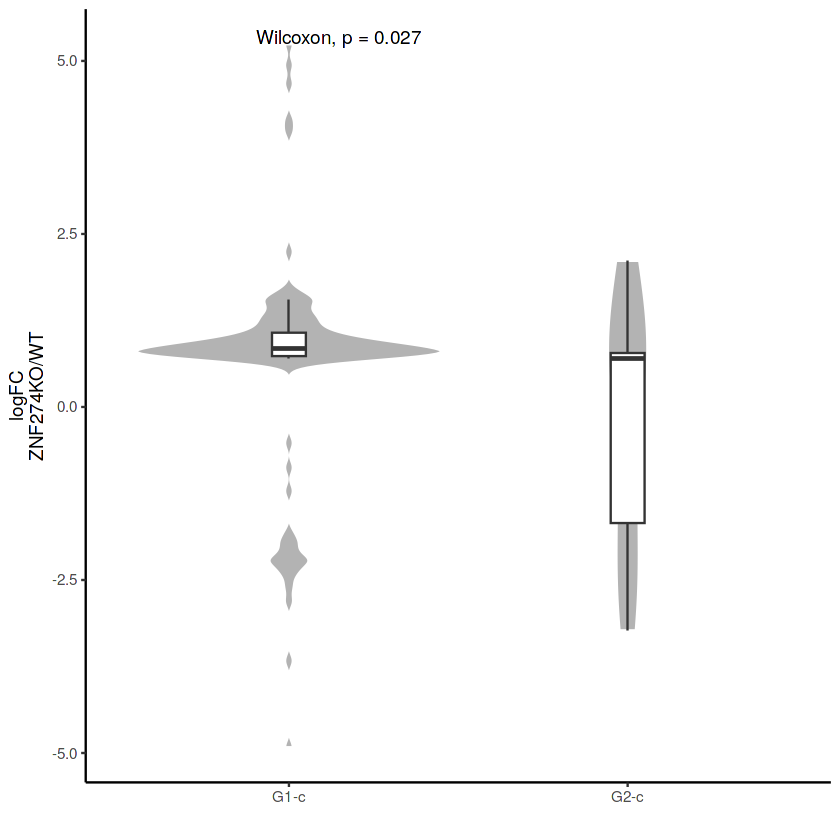

In [252]:
plot_selection %>% ggplot(aes(x = c("G1-c", "G2-c")[phase_assigned %in% acr+1], y = logFC)) + 
geom_violin(fill = "grey70", col = "white") + 
geom_boxplot(outlier.shape=NA, width = 0.1) + 
geom_hline(yintercept = median(plot_selection %>% dplyr::filter(padj < 0.05, !phase_assigned %in% acr) %>% pull(logFC)), lty = 2) +
theme_classic() + 
ylab("logFC\nZNF274KO/WT") +
xlab("") +
ggpubr::stat_compare_means()
#ggtitle(paste0("p-val=", formatC(t.274_znfs$p.value, format = "e", digits = 2)))
dev.copy(svg, "../out/cell_cycle_figures/znf274_rhythmic_KZFPs_FCZNF274KO_s2-g2_vs_m-g1s.svg", height = 3, width = 2.5)
dev.off()

## standard KRAB summary score:

Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_compare_means()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_hline()`).”


svg 
  3

png 
  2

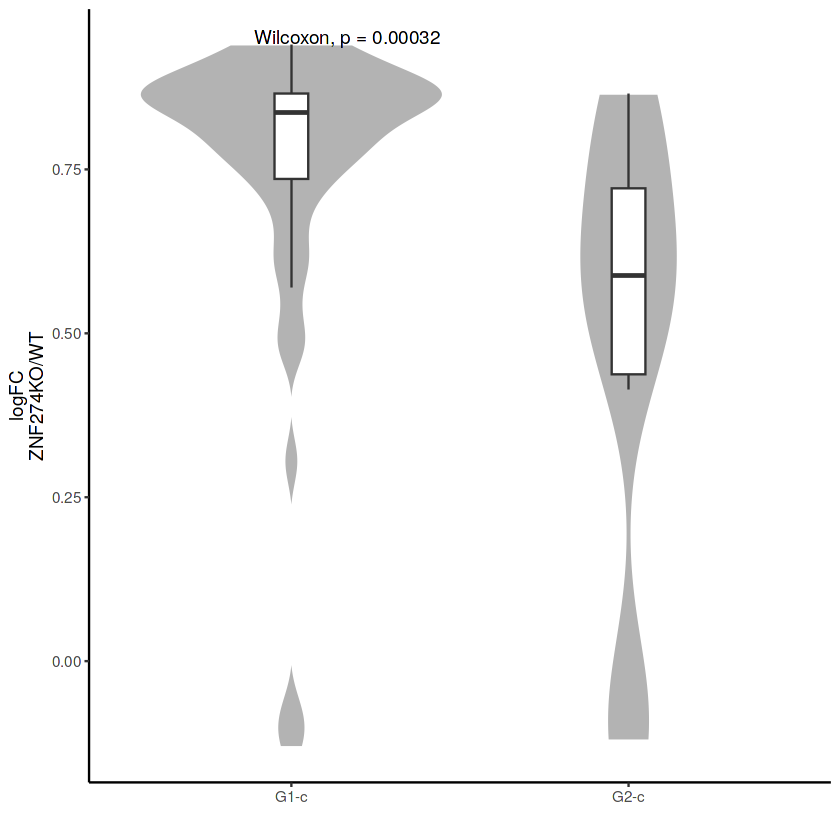

In [253]:
plot_selection %>% ggplot(aes(x = c("G1-c", "G2-c")[phase_assigned %in% acr+1], y = Tycko_score_avg)) + 
geom_violin(fill = "grey70", col = "white") + 
geom_boxplot(outlier.shape=NA, width = 0.1) + 
geom_hline(yintercept = median(plot_selection %>% dplyr::filter(padj < 0.05, !phase_assigned %in% acr) %>% pull(Tycko_score_avg)), lty = 2) +
theme_classic() + 
ylab("logFC\nZNF274KO/WT") +
xlab("") +
ggpubr::stat_compare_means()
dev.copy(svg, "../out/cell_cycle_figures/znf274_rhythmic_KZFPs_tycko_score_s2-g2_vs_m-g1s.svg", height = 3, width = 2.5)
dev.off()

### ZNF274 expression is rhythmic

svg 
  3

png 
  2

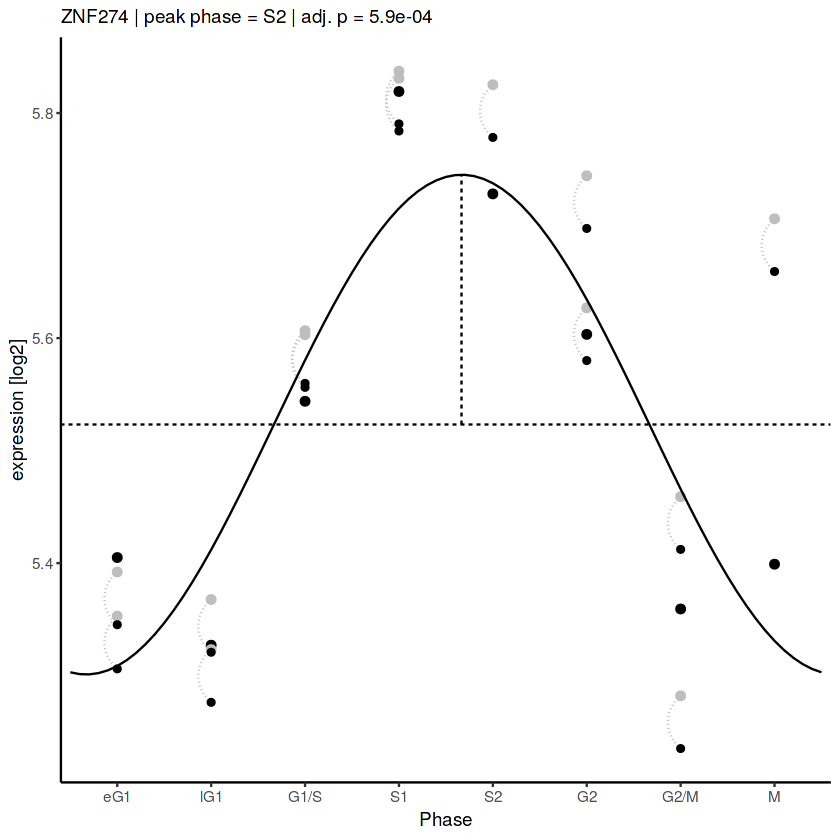

In [254]:
plot_rhythmic_expression("ZNF274")
dev.copy(svg, filename = '../out/cell_cycle_figures/ZNF274_rhythmic_expr.svg', width = 4, height = 4)
dev.off()

## KZFPs vs other genes in G1 and S/G2 upon ZNF274 KO

In [279]:
load('../data/znf274ko_cellcycle_facs_sorted/countTable_gene.RData')
countTable %>% head()
sinfo

S19 S20 S21 S22 S23 S24 S25 S26 S27 S28 S29 S30 S31 S32 S33 S34
ENSG00000227232 102 138  85  93 114 122  98 101  88 113 114  86  53  94 115  82
ENSG00000228463   0   2   2   1   1   0   2   2   4   4   3   4   1   2   1   1
ENSG00000225972   4   2   3   3   1   6   6   2   2   3   3   1   3   5   4   2
ENSG00000225630  40  58  43  45  42  53  62  57  32  38  56  33  59  55  68  44
ENSG00000237973 459 561 491 559 548 535 710 831 893 676 680 745 716 773 889 644
ENSG00000229344  18  23  23  17  33  15  49  25  17  18  25  27  21  25  19  22

sample               name Group       Batch
1  WT_G1_Rep1_S19       S19  WT_G1       NA   
2  WT_G1_Rep2_S20       S20  WT_G1       NA   
3  WT_G1_Rep3_S21       S21  WT_G1       NA   
4  WT_G1_Rep4_S22       S22  WT_G1       NA   
5  WT_S_Rep1_S23        S23  WT_S        NA   
6  WT_S_Rep2_S24        S24  WT_S        NA   
7  WT_S_Rep3_S25        S25  WT_S        NA   
8  WT_S_Rep4_S26        S26  WT_S        NA   
9  ZNF274KO_G1_Rep1_S27 S27  ZNF274KO_G1 NA   
10 ZNF274KO_G1_Rep2_S28 S28  ZNF274KO_G1 NA   
11 ZNF274KO_G1_Rep3_S29 S29  ZNF274KO_G1 NA   
12 ZNF274KO_G1_Rep4_S30 S30  ZNF274KO_G1 NA   
13 ZNF274KO_S_Rep1_S31  S31  ZNF274KO_S  NA   
14 ZNF274KO_S_Rep2_S32  S32  ZNF274KO_S  NA   
15 ZNF274KO_S_Rep3_S33  S33  ZNF274KO_S  NA   
16 ZNF274KO_S_Rep4_S34  S34  ZNF274KO_S  NA

In [280]:
library(edgeR)


In [281]:
y = DGEList(counts=countTable, genes=rownames(countTable), group = factor(sinfo$Group))
y = calcNormFactors(y)
y = estimateDisp(y)


Using classic mode.



In [282]:
factor(sinfo$Group)

[1] WT_G1       WT_G1       WT_G1       WT_G1       WT_S        WT_S       
 [7] WT_S        WT_S        ZNF274KO_G1 ZNF274KO_G1 ZNF274KO_G1 ZNF274KO_G1
[13] ZNF274KO_S  ZNF274KO_S  ZNF274KO_S  ZNF274KO_S 
Levels: WT_G1 WT_S ZNF274KO_G1 ZNF274KO_S

In [283]:
# DE in G1
et = exactTest(y, pair=c("WT_G1", "ZNF274KO_G1"))
de_genes = topTags(et, n = nrow(et$table))
de_genes$table %>% head()


genes           logFC      logCPM   PValue        FDR          
ENSG00000171606 ENSG00000171606 -12.154083 3.489960  0.000000e+00  0.000000e+00
ENSG00000121413 ENSG00000121413   2.621836 4.920854 2.228181e-300 2.125128e-296
ENSG00000131668 ENSG00000131668  -2.073240 5.234364 7.633182e-248 4.853432e-244
ENSG00000184635 ENSG00000184635  11.121557 2.711119 4.486323e-239 2.139415e-235
ENSG00000256771 ENSG00000256771   9.494639 2.808948 7.145939e-217 2.726176e-213
ENSG00000197134 ENSG00000197134   3.942016 2.982298 2.011745e-193 6.395672e-190

In [284]:
plot_selection_1 = rhythm %>% dplyr::left_join(de_genes$table %>% 
                                dplyr::select(-logCPM, -PValue) %>% 
                               dplyr::rename(ensembl = genes) %>%
                                                dplyr::mutate(znf274_ko_gate = "G1"))

Joining with `by = join_by(ensembl)`


In [285]:
# DE in S/G2:
et = exactTest(y, pair=c("WT_S", "ZNF274KO_S"))
de_genes = topTags(et, n = nrow(et$table))
de_genes$table %>% head()

genes           logFC      logCPM   PValue        FDR          
ENSG00000121413 ENSG00000121413   3.132389 4.920854  0.000000e+00  0.000000e+00
ENSG00000171606 ENSG00000171606 -11.390328 3.489960 3.989507e-273 3.804993e-269
ENSG00000256771 ENSG00000256771  11.209158 2.808948 4.241044e-234 2.696597e-230
ENSG00000131668 ENSG00000131668  -1.934926 5.234364 1.721468e-222 8.209249e-219
ENSG00000184635 ENSG00000184635  10.965385 2.711119 4.445722e-220 1.696043e-216
ENSG00000232677 ENSG00000232677   2.617155 4.683038 2.921382e-211 9.287560e-208

In [286]:
plot_selection_2 = rhythm %>% dplyr::left_join(de_genes$table %>% 
                                dplyr::select(-logCPM, -PValue) %>% 
                               dplyr::rename(ensembl = genes) %>%
                                                dplyr::mutate(znf274_ko_gate = "S/G2"))

Joining with `by = join_by(ensembl)`


In [287]:
plot_selection = rbind(plot_selection_1, plot_selection_2) %>% dplyr::left_join(gene_metadata)

Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`


In [288]:
library(rstatix)
plot_selection %>% 
    dplyr::filter(!is.na(isKZFP), !is.na(znf274_ko_gate), padj < 0.05) %>%
    dplyr::group_by(znf274_ko_gate) %>%
    rstatix::wilcox_test(logFC ~ isKZFP) %>% 
    rstatix::adjust_pvalue(method = "BH") %>%
    rstatix::add_significance("p.adj")

znf274_ko_gate .y.   group1 group2 n1   n2  statistic p        p.adj   
1 G1             logFC FALSE  TRUE   4257 115 136004    3.83e-16 3.83e-16
2 S/G2           logFC FALSE  TRUE   4257 115  98494    6.50e-28 1.30e-27
  p.adj.signif
1 ****        
2 ****

In [289]:
plot_selection %>% 
    dplyr::filter(!is.na(isKZFP), !is.na(znf274_ko_gate), padj < 0.05) %>%
    dplyr::group_by(isKZFP) %>%
    rstatix::wilcox_test(logFC ~ znf274_ko_gate, paired = T) %>% 
    rstatix::adjust_pvalue(method = "BH") %>%
    rstatix::add_significance("p.adj")

isKZFP .y.   group1 group2 n1   n2   statistic p        p.adj    
1 FALSE  logFC G1     S/G2   4257 4257 4937984   4.02e-07 4.020e-07
2  TRUE  logFC G1     S/G2    115  115    1247   5.69e-09 1.138e-08
  p.adj.signif
1 ****        
2 ****

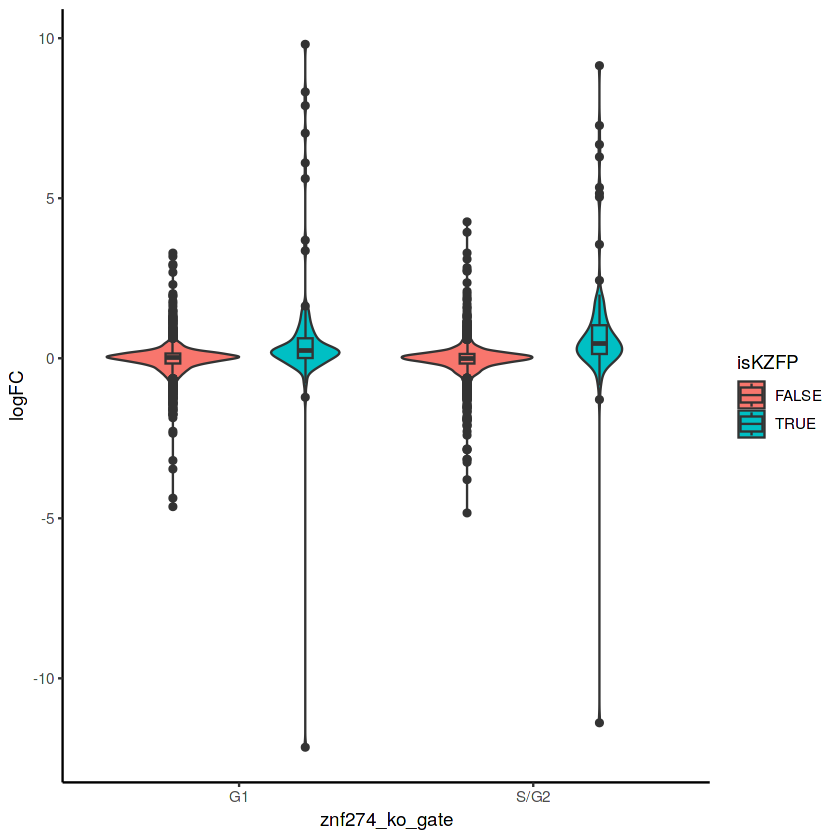

In [290]:
plot_selection %>% 
    dplyr::filter(!is.na(isKZFP), !is.na(znf274_ko_gate), padj < 0.05) %>%
    ggplot(aes(x = znf274_ko_gate, y = logFC)) +
    geom_violin(aes(fill = isKZFP), position = position_dodge(0.9)) + 
    geom_boxplot(aes(fill = isKZFP), position = position_dodge(0.9), width = 0.1) + 
    theme_classic()

Shouldn't we show the difference in fold change between the G1 and S/G2 conditions instead?

In [291]:
# DE in G1
et = exactTest(y, pair=c("WT_G1", "ZNF274KO_G1"))
de_genes = topTags(et, n = nrow(et$table))
de_genes$table %>% head()


genes           logFC      logCPM   PValue        FDR          
ENSG00000171606 ENSG00000171606 -12.154083 3.489960  0.000000e+00  0.000000e+00
ENSG00000121413 ENSG00000121413   2.621836 4.920854 2.228181e-300 2.125128e-296
ENSG00000131668 ENSG00000131668  -2.073240 5.234364 7.633182e-248 4.853432e-244
ENSG00000184635 ENSG00000184635  11.121557 2.711119 4.486323e-239 2.139415e-235
ENSG00000256771 ENSG00000256771   9.494639 2.808948 7.145939e-217 2.726176e-213
ENSG00000197134 ENSG00000197134   3.942016 2.982298 2.011745e-193 6.395672e-190

In [292]:
plot_selection = rhythm %>% dplyr::left_join(de_genes$table %>% 
                                dplyr::select(-logCPM, -PValue) %>% 
                               dplyr::rename(ensembl = genes,
                                            logFC_WT_vs_ZNF274KO_G1 = logFC,
                                            FDR_WT_vs_ZNF274KO_G1 = FDR))

Joining with `by = join_by(ensembl)`


In [293]:
# DE in S/G2:
et = exactTest(y, pair=c("WT_S", "ZNF274KO_S"))
de_genes = topTags(et, n = nrow(et$table))
de_genes$table %>% head()

genes           logFC      logCPM   PValue        FDR          
ENSG00000121413 ENSG00000121413   3.132389 4.920854  0.000000e+00  0.000000e+00
ENSG00000171606 ENSG00000171606 -11.390328 3.489960 3.989507e-273 3.804993e-269
ENSG00000256771 ENSG00000256771  11.209158 2.808948 4.241044e-234 2.696597e-230
ENSG00000131668 ENSG00000131668  -1.934926 5.234364 1.721468e-222 8.209249e-219
ENSG00000184635 ENSG00000184635  10.965385 2.711119 4.445722e-220 1.696043e-216
ENSG00000232677 ENSG00000232677   2.617155 4.683038 2.921382e-211 9.287560e-208

In [294]:
plot_selection = plot_selection %>% dplyr::left_join(de_genes$table %>% 
                                dplyr::select(-logCPM, -PValue) %>% 
                               dplyr::rename(ensembl = genes,
                                            logFC_WT_vs_ZNF274KO_S = logFC,
                                            FDR_WT_vs_ZNF274KO_S = FDR))

Joining with `by = join_by(ensembl)`


In [295]:
plot_selection$logFC_WT_vs_ZNF274KO_G1 %>% head()
plot_selection$logFC_WT_vs_ZNF274KO_S %>% head()

[1] -0.51082011  0.04567741 -0.34127673          NA          NA -0.11008183

[1] -0.39243667  0.07368406  0.03278815          NA          NA -0.09162885

Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`
Warning message:
“Removed 12 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 12 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


<ScaleContinuousPosition>
 Range:  
 Limits: -0.75 --  1.2

svg 
  3

png 
  2

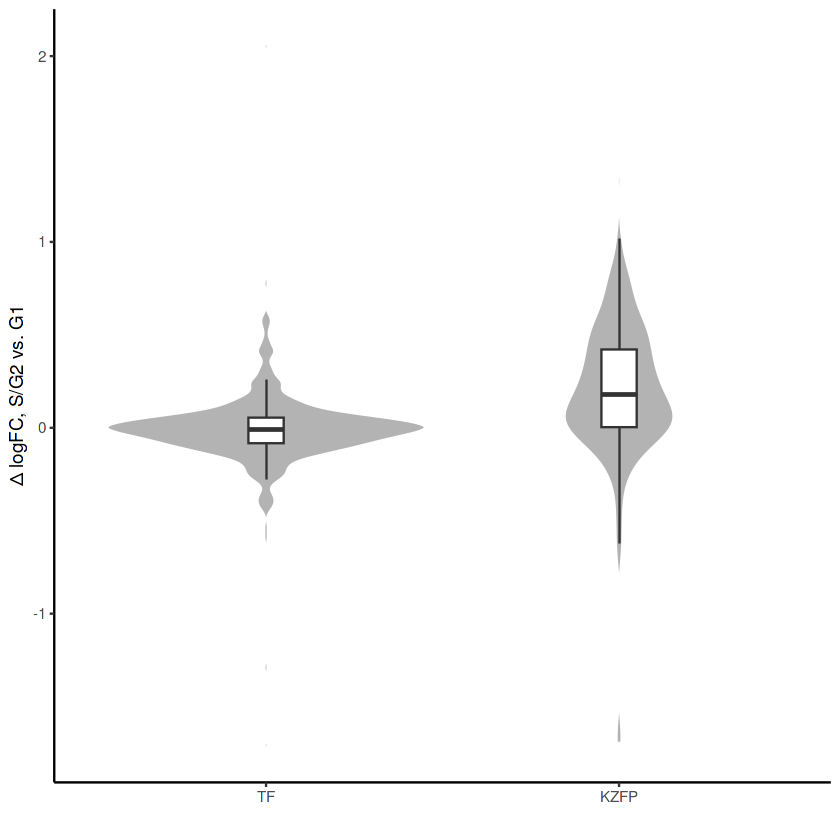

In [296]:
plot_selection %>% dplyr::left_join(gene_metadata) %>%
    dplyr::filter(isTF, !is.na(isKZFP), padj < 0.05) %>%
    dplyr::mutate(tf_category_plot = factor(ifelse(isKZFP, yes = "KZFP", no = "TF"), levels = c("TF", "KZFP"))) %>%
    dplyr::group_by(isKZFP) %>%
    dplyr::mutate(deltaLogFC = logFC_WT_vs_ZNF274KO_S-logFC_WT_vs_ZNF274KO_G1) %>%
    ggplot(aes(x = tf_category_plot, y = deltaLogFC)) +
    geom_violin(fill = "grey70", col = "white") + 
    geom_boxplot(outliers = F, width = 0.1) + 
    theme_classic() + 
    xlab("") +
    ylab("\u0394 logFC, S/G2 vs. G1")
    ylim(c(-0.75, 1.2))
dev.copy(svg, '../out/cell_cycle_figures/znf274ko_s_vs_g1_deltaFC_kzfps_tfs.svg', height = 2.5, width = 2)
dev.off()
    

In [297]:
# does the deltalogfc differ from zero for KZFPs and other genes?

enrich_data_for_plot = plot_selection %>% dplyr::left_join(gene_metadata) %>%
    dplyr::filter(isTF, !is.na(isKZFP), padj < 0.05) %>%
    dplyr::mutate(deltaLogFC = logFC_WT_vs_ZNF274KO_S-logFC_WT_vs_ZNF274KO_G1) %>%
    dplyr::group_by(isKZFP) %>% 
    summarise(P = wilcox.test(deltaLogFC, mu = 0)$p.value,
              Sig = ifelse(P < 0.05, "*", "ns"),
              MaxWidth = max(deltaLogFC))
enrich_data_for_plot

Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`


isKZFP P            Sig MaxWidth
1 FALSE  1.075599e-01 ns  NA      
2  TRUE  5.087558e-09 *   NA

### G1-centered vs G2-centered rhythmic KZFPs, difference in logFC upon ZNF274 KO in G1 vs S/G2

Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`
Warning message:
“Removed 6 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 6 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


svg 
  3

png 
  2

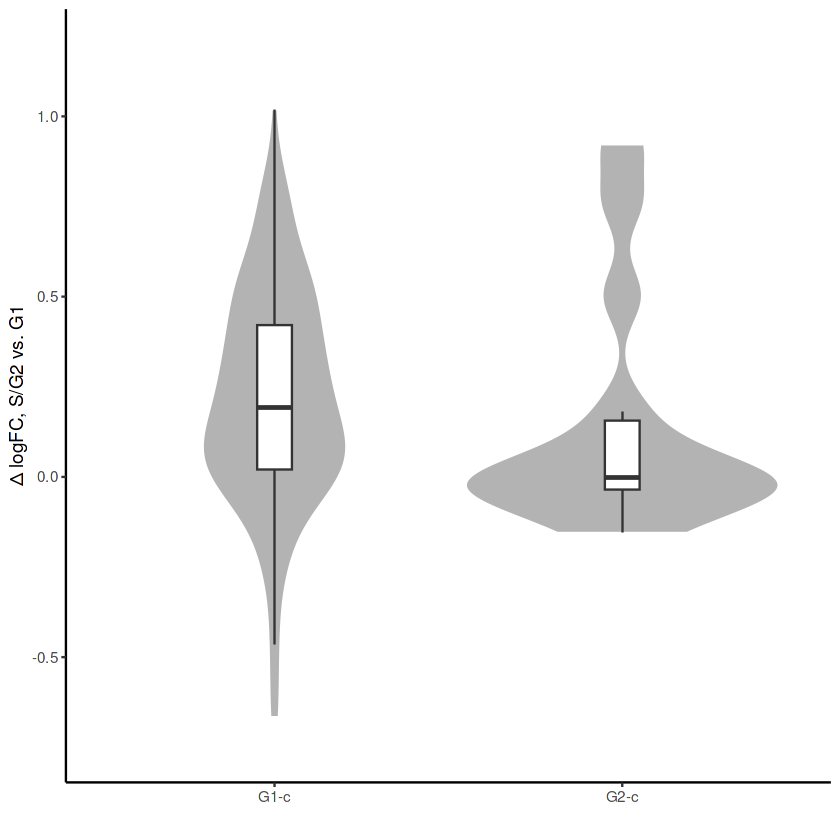

In [298]:
plot_selection %>% dplyr::left_join(gene_metadata) %>%
    dplyr::filter(isKZFP, padj < 0.05) %>%
    dplyr::mutate(deltaLogFC = logFC_WT_vs_ZNF274KO_S-logFC_WT_vs_ZNF274KO_G1) %>%
    ggplot(aes(x = c("G1-c", "G2-c")[phase_assigned %in% acr+1], y = deltaLogFC)) +
    geom_violin(fill = "grey70", col = "white") + 
    geom_boxplot(outliers = F, width = 0.1) + 
    theme_classic() + 
    xlab("") +
    ylab("\u0394 logFC, S/G2 vs. G1") + 
    ylim(c(-0.75, 1.2))
dev.copy(svg, '../out/cell_cycle_figures/znf274ko_s_vs_g1_deltaFC_m-to-s1_vs_s2_to_g2_kzfps.svg', height = 2.5, width = 2)
dev.off()

In [299]:
enrich_data_for_plot = plot_selection %>% dplyr::left_join(gene_metadata) %>%
    dplyr::filter(isKZFP, padj < 0.05) %>%
    dplyr::mutate(deltaLogFC = logFC_WT_vs_ZNF274KO_S-logFC_WT_vs_ZNF274KO_G1) %>%
    dplyr::group_by(phase_assigned %in% acr) %>% 
    summarise(P = wilcox.test(deltaLogFC, mu = 0)$p.value,
              Sig = ifelse(P < 0.05, "*", "ns"),
              MaxWidth = max(deltaLogFC))
enrich_data_for_plot

Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`


phase_assigned %in% acr P            Sig MaxWidth
1 FALSE                   2.728019e-08 *         NA
2  TRUE                   3.302612e-01 ns  1.348665

Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_compare_means()`).”


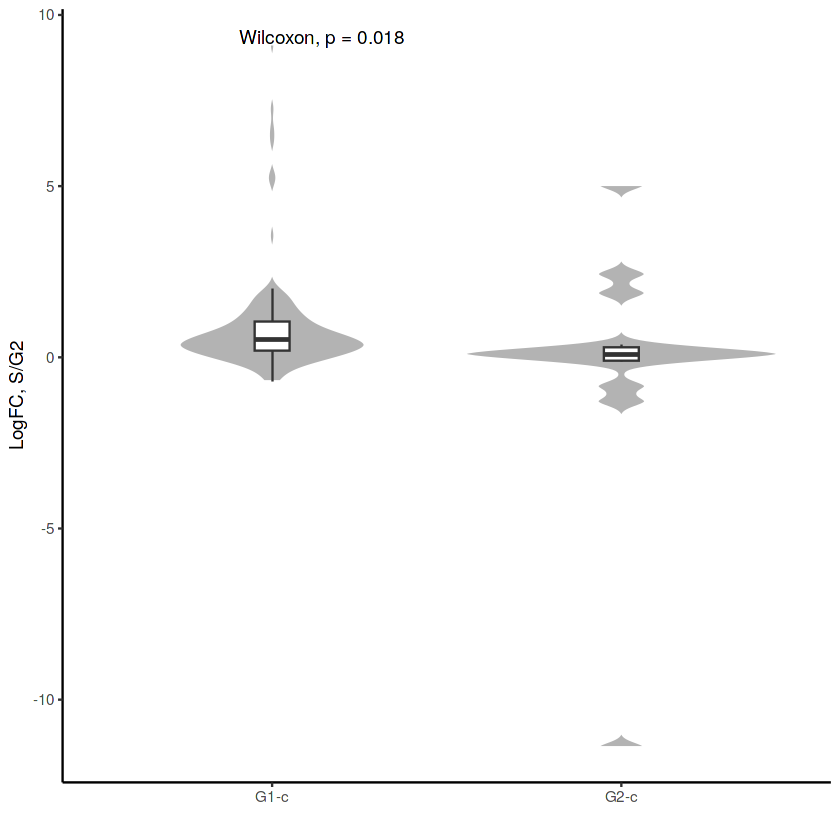

In [300]:
plot_selection %>% dplyr::left_join(gene_metadata) %>%
    dplyr::filter(isKZFP, padj < 0.05) %>%
    ggplot(aes(x = c("G1-c", "G2-c")[phase_assigned %in% acr+1], y = logFC_WT_vs_ZNF274KO_S)) +
    geom_violin(fill = "grey70", col = "white") + 
    geom_boxplot(outliers = F, width = 0.1) + 
    theme_classic() + 
    xlab("") +
    ggpubr::stat_compare_means() + 
    ylab("LogFC, S/G2")

In [301]:
dev.copy(svg, '../out/cell_cycle_figures/znf274ko_s_vs_g1_deltaFC_kzfps_tfs.svg', height = 2.5, width = 2)
dev.off()
    

svg 
  3

png 
  2

## Figure 5

### RT of KZFPs vs other TFs

In [306]:
plot_selection = rhythm %>% 
    dplyr::left_join(gene_metadata)

plot_selection = plot_selection %>% 
    dplyr::mutate(tf_category_plot = ifelse(plot_selection$tf_category %in% c("TF", "C2H2 ZF"), yes = "TF", no = plot_selection$tf_category))
plot_selection$tf_category_plot %>% unique()

Joining with `by = join_by(ensembl, symbol, chr, start, end, strand)`


[1] "not TF" NA       "TF"     "KZFP"

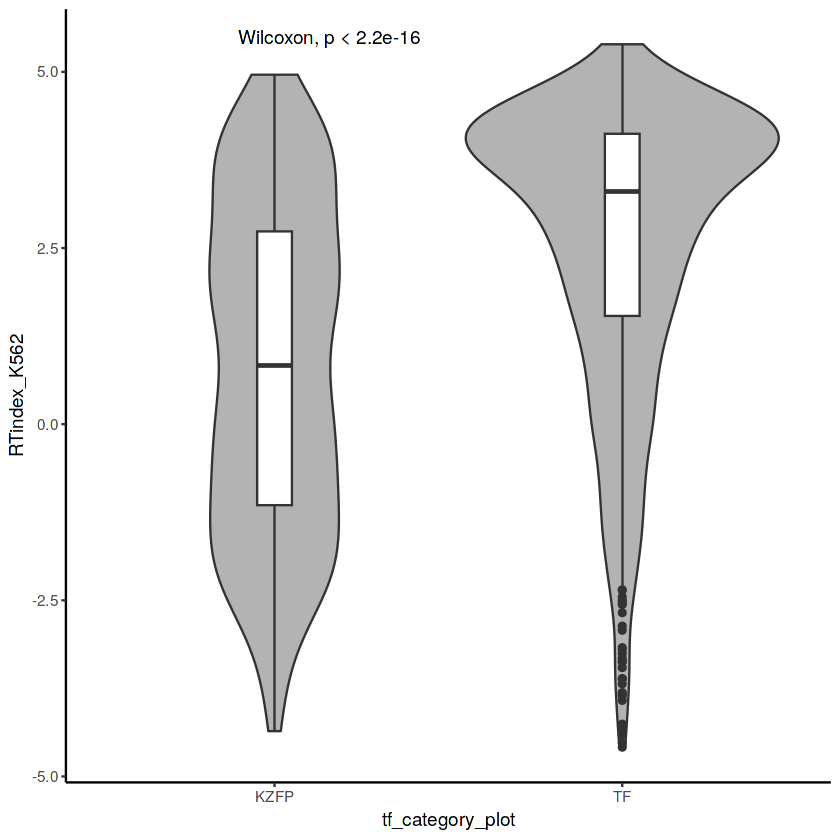

In [307]:
plot_selection %>% 
    dplyr::filter(tf_category_plot %in% c("KZFP", "TF")) %>% 
    ggplot(aes(x = tf_category_plot, y = RTindex_K562)) +
    geom_violin(fill = "grey70") + 
    geom_boxplot(width = 0.1) +
    theme_classic() + 
    ggpubr::stat_compare_means()

### RT of rhythmic TFs and KZFPs

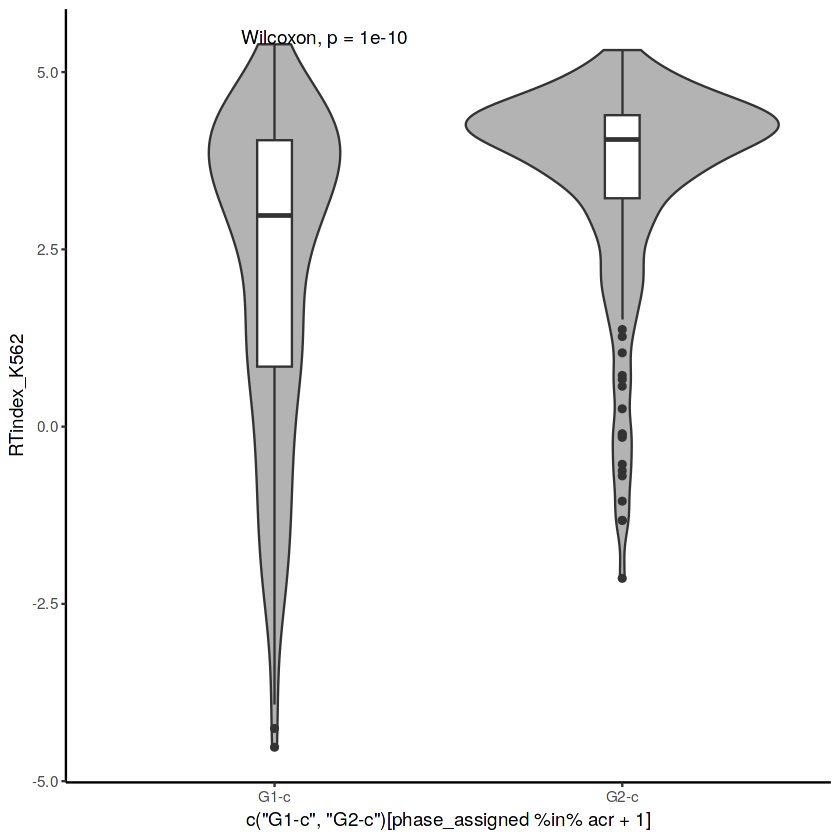

In [308]:
plot_selection %>% 
    dplyr::filter(tf_category_plot %in% c("TF")) %>% 
    dplyr::filter(padj < 0.05) %>%
    ggplot(aes(x = c("G1-c", "G2-c")[phase_assigned %in% acr+1], y = RTindex_K562)) +
    geom_violin(fill = "grey70") + 
    geom_boxplot(width = 0.1) +
    theme_classic() + 
    ggpubr::stat_compare_means()

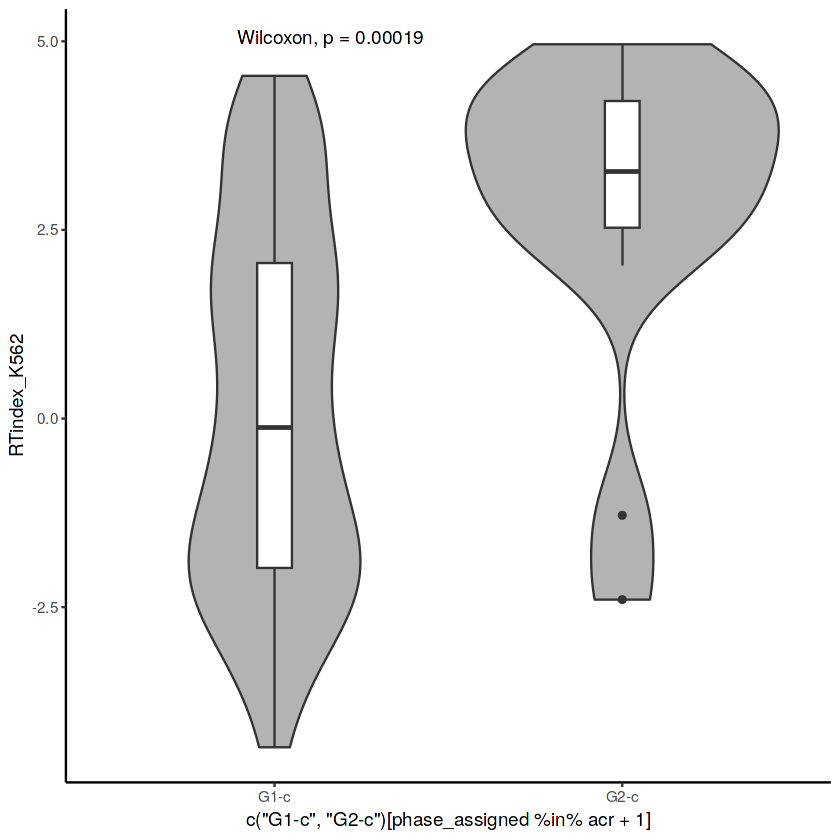

In [309]:
plot_selection %>% 
    dplyr::filter(tf_category_plot %in% c("KZFP")) %>% 
    dplyr::filter(padj < 0.05) %>%
    ggplot(aes(x = c("G1-c", "G2-c")[phase_assigned %in% acr+1], y = RTindex_K562)) +
    geom_violin(fill = "grey70") + 
    geom_boxplot(width = 0.1) +
    theme_classic() + 
    ggpubr::stat_compare_means()

### Correlation between RT index and RIF1 binding at TFs and KZFPs

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_cor()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


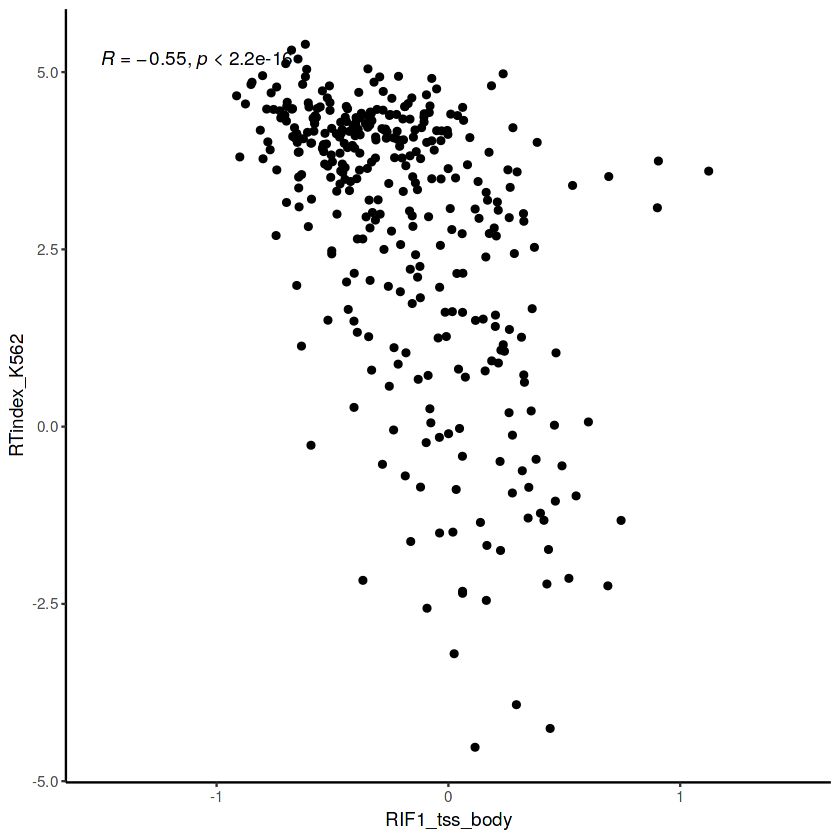

In [310]:
plot_selection %>% 
    dplyr::filter(tf_category_plot %in% c("TF")) %>% 
    dplyr::filter(padj < 0.05) %>%
    ggplot(aes(x = RIF1_tss_body, y = RTindex_K562)) +
    geom_point() + 
    theme_classic() +
    xlim(c(-1.5, 1.5)) + 
    ggpubr::stat_cor(method = "spearman")

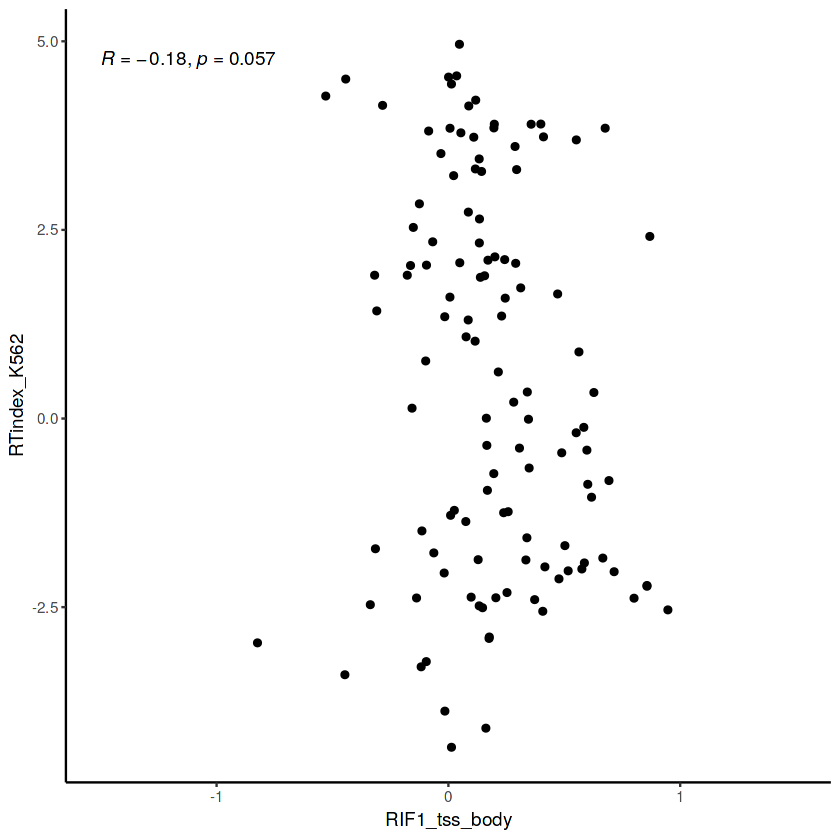

In [311]:
plot_selection %>% 
    dplyr::filter(tf_category_plot %in% c("KZFP")) %>% 
    dplyr::filter(padj < 0.05) %>%
    ggplot(aes(x = RIF1_tss_body, y = RTindex_K562)) +
    geom_point() + 
    theme_classic() +
    xlim(c(-1.5, 1.5)) + 
    ggpubr::stat_cor(method = "spearman")

## Correlation between differential RT diff upon RIF1 KO and RIF1 binding at KZFPs and TFs

Warning message:
“Removed 22 rows containing non-finite outside the scale range (`stat_cor()`).”
Warning message:
“Removed 22 rows containing missing values or values outside the scale range
(`geom_point()`).”


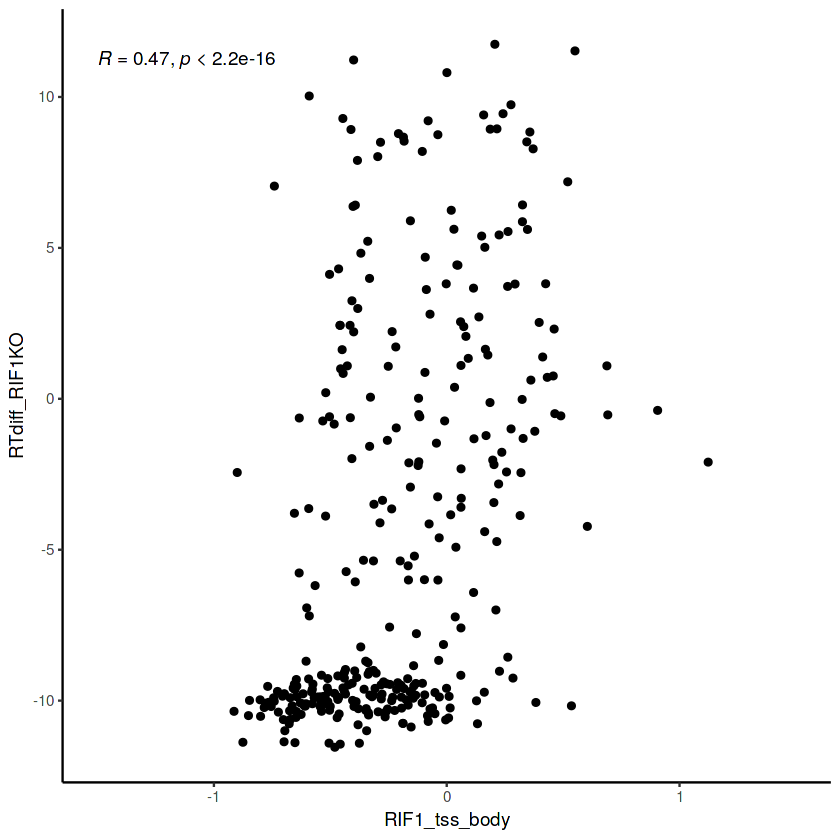

In [350]:
plot_selection %>% 
    dplyr::filter(tf_category_plot %in% c("TF")) %>% 
    dplyr::filter(padj < 0.05) %>%
    ggplot(aes(x = RIF1_tss_body, y = RTdiff_RIF1KO)) +
    geom_point() +
    theme_classic() +
    xlim(c(-1.5, 1.5)) + 
    ggpubr::stat_cor(method = "spearman")

Warning message:
“Removed 9 rows containing non-finite outside the scale range (`stat_cor()`).”
Warning message:
“Removed 9 rows containing missing values or values outside the scale range
(`geom_point()`).”


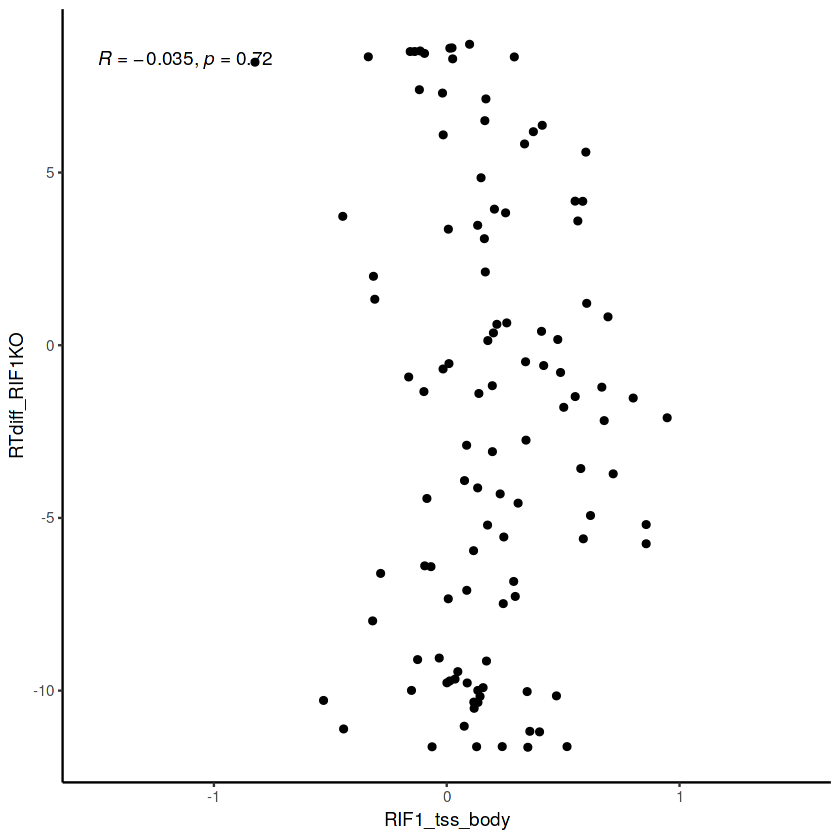

In [351]:
plot_selection %>% 
    dplyr::filter(tf_category_plot %in% c("KZFP")) %>% 
    dplyr::filter(padj < 0.05) %>%
    ggplot(aes(x = RIF1_tss_body, y = RTdiff_RIF1KO)) +
    geom_point() +
    theme_classic() +
    xlim(c(-1.5, 1.5)) + 
    ggpubr::stat_cor(method = "spearman")

### Enrichment of DBPs at late unchanged regions upon RIF1KO undergoing a late-to-early switch upon H3K9me3 KD, i.e. SUV39H1/SUV39H2/SETDB1 KD

In [352]:
LU_K9kdLtE = read.table('../out/tables/LU_K9KdLtE_vs_otherBins_enrichment_ENCODE_tronolabKZFPs.tsv', sep = '\t', header = T)
LU_K9kdLtE %>% head()

TF_symbol p_enrich  is_kzfp padj_enrich ratio_observed ratio_expected
1 ADNP      1.0000000 FALSE   1           0.01234886     0.01942751    
2 AFF1      0.5589000 FALSE   1           0.02131746     0.01942751    
3 AFF4      1.0000000 FALSE   1           0.01566145     0.01942751    
4 AGO1      1.0000000 FALSE   1           0.01201744     0.01942751    
5 ARHGAP35  0.3172173 FALSE   1           0.02953586     0.01942751    
6 ARID1B    1.0000000 FALSE   1           0.02037837     0.01942751    
  ratio_foldChange TF_peaks_total TF_peaks_in_LU_K9KdLtE
1 0.6356376         7774            96                  
2 1.0972820        26035           555                  
3 0.8061479         6002            94                  
4 0.6185788        30955           372                  
5 1.5203114          474            14                  
6 1.0489442        52065          1061

In [353]:
LU_K9kdLtLr = read.table('../out/tables/LU_K9KdLtLr_vs_otherBins_enrichment_ENCODE_tronolabKZFPs.tsv', sep = '\t', header = T)
LU_K9kdLtLr %>% head()

TF_symbol p_enrich is_kzfp padj_enrich ratio_observed ratio_expected
1 ADNP      1        FALSE   1           0.010676614    0.01289618    
2 AFF1      1        FALSE   1           0.012099097    0.01289618    
3 AFF4      1        FALSE   1           0.014328557    0.01289618    
4 AGO1      1        FALSE   1           0.008334679    0.01289618    
5 ARHGAP35  1        FALSE   1           0.008438819    0.01289618    
6 ARID1B    1        FALSE   1           0.012945357    0.01289618    
  ratio_foldChange TF_peaks_total TF_peaks_in_LU_K9KdLtLr
1 0.8278897         7774           83                    
2 0.9381924        26035          315                    
3 1.1110699         6002           86                    
4 0.6462906        30955          258                    
5 0.6543658          474            4                    
6 1.0038133        52065          674

Warning message:
“ggrepel: 26 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


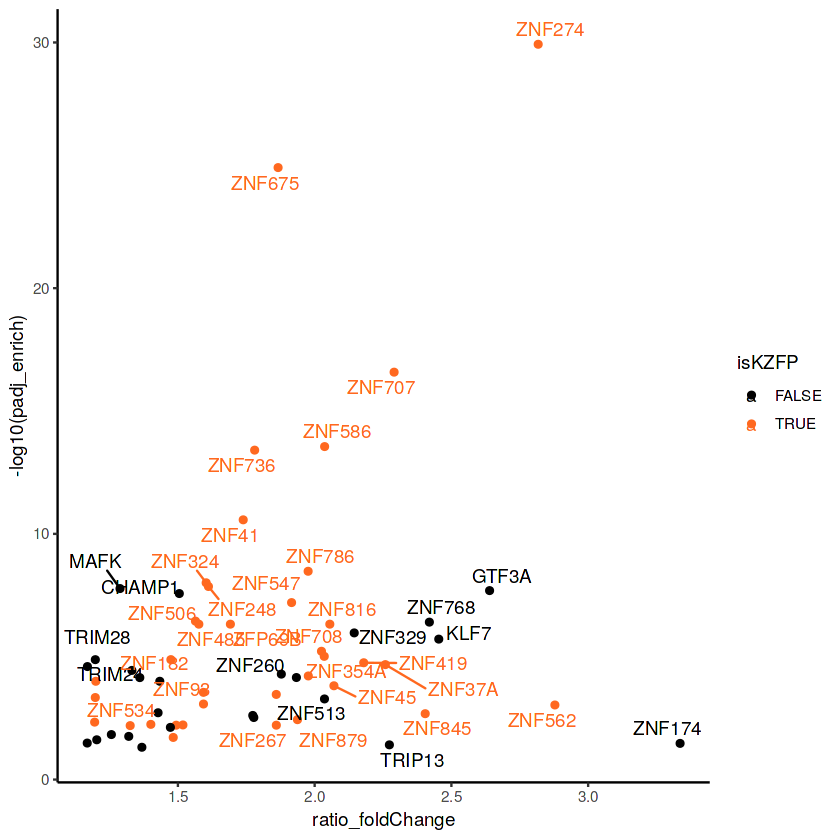

In [354]:
LU_K9kdLtE %>% 
    dplyr::left_join((gene_metadata %>% dplyr::select(symbol, isKZFP)), by = c("TF_symbol" = "symbol")) %>%
    dplyr::filter(!TF_symbol %in% (LU_K9kdLtLr %>% dplyr::filter(padj_enrich < 0.05) %>% pull(TF_symbol))) %>%
    dplyr::filter(padj_enrich < 0.05) %>%
    ggplot(aes(x = ratio_foldChange, y = -log10(padj_enrich), col = isKZFP, label = TF_symbol)) + 
    geom_point() + 
    theme_classic() +
    scale_color_manual(values = c("black", "#FF681F")) +
    ggrepel::geom_text_repel()


### Differential RT index upon ZNF274KO vs. differential gene expression upon ZNF274 KO for KZFPs

Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message:
“Removed 8236 rows containing missing values or values outside the scale range
(`geom_point()`).”


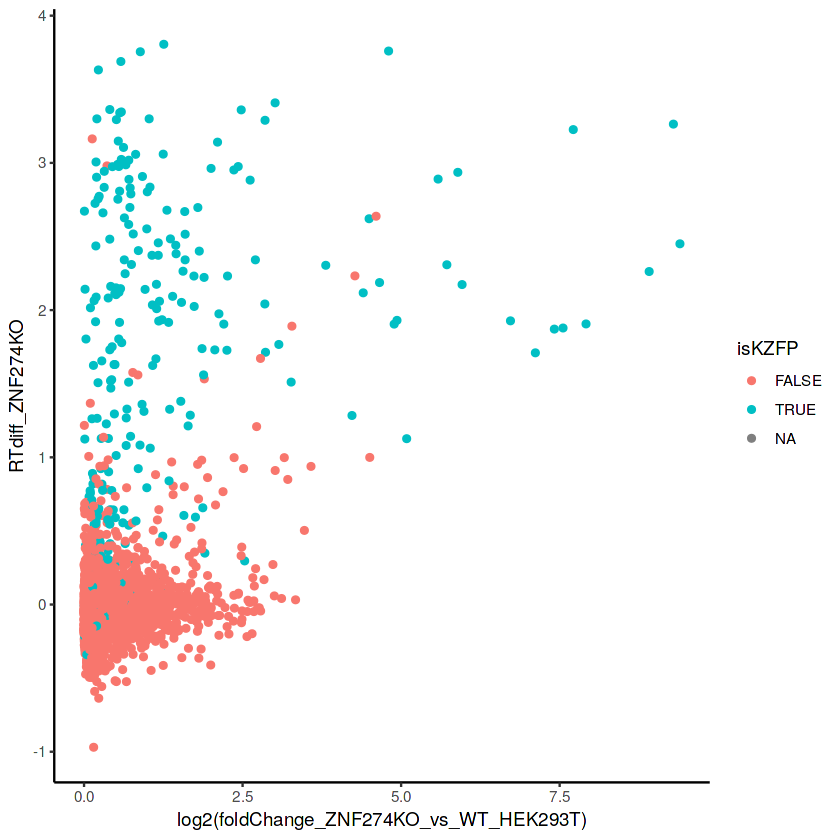

In [355]:
plot_selection %>% 
    ggplot(aes(x = log2(foldChange_ZNF274KO_vs_WT_HEK293T), y = RTdiff_ZNF274KO, col = isKZFP)) +
    geom_point() +
    theme_classic()

## Exporting supplementary tables, aka TableSupp

In [356]:
gene_metadata$RT %>% table()

< table of extent 0 >

In [357]:
gene_metadata %>% 
    dplyr::select(chr, start, end, ensembl, strand, symbol, age_combined, isKZFP, isC2H2, isTF, Tycko_score_avg,
                                ZNF274_znfs, 
                                foldChange_ZNF274KO_vs_WT_HEK293T,
                               deltaK9_ZNF274KO_znf, 
                                RTindex_K562, RTdiff_RIF1KO, RTdiff_ZNF274KO) %>% 
    arrange(chr, start, end, strand) %>%
    write.table('../out/tables/TableSupp_gene_metadata.tsv', sep = '\t', col.names = T, row.names = F, quote = F)

Column descriptions:

age_combined: estimated time of emergence of the gene, in million years.

isKZFP: TRUE iff the gene is a KZFP.

isC2H2: TRUE iff the gene is a C2H2 Zinc finger protein. C2H2 ZFPs encompass KZFPs.

isTF: TRUE iff the gene is a TF. TFs encompass both C2H2 ZFPs and KZFPs.

Tycko_score_avg: predicts the silencer power of the KRAB domain for KZFPs. Range: ]-inf; 1] where 1 means max. silencing.

ZNF274_znfs: ZNF274 ChIP-seq signal at the 3' zinc finger array-encoding exon of C2H2 zinc finger proteins in K562.

foldChange_ZNF274KO_vs_WT_HEK293T: fold change gene expression upon ZNF274 KO in HEK293T cells, as measured by RNA-seq.

deltaK9_ZNF274KO_znf: TRUE iff the 3' zinc finger array-encoding exon of C2H2 zinc finger proteins and thus KZFPs overlaps a region that has undergone H3K9me3 loss upon ZNF274 KO  in HEK293T.

RTindex_K562: replication timing index in K562. Larger (more positive) values indicate an earlier replication timing.

RTdiff_RIF1KO: differential replication timing index induced by RIF1 KO in HCT116 cells. Larger (more positive) values indicate a that RIF1 KO led to an earlier replication timing.

RTdiff_ZNF274KO: differential replication timing index induced by ZNF274 KO in HEK293T cells. Larger (more positive) values indicate a that ZNF274 KO led to an earlier replication timing.


In [358]:
rhythm %>% head()

ensembl         entrez symbol 
1 ENSG00000187634 148398 SAMD11 
2 ENSG00000188976  26155 NOC2L  
3 ENSG00000187961 339451 KLHL17 
4 ENSG00000187583  84069 PLEKHN1
5 ENSG00000187642  84808 PERM1  
6 ENSG00000188290  57801 HES4   
  genename                                                 chr  start  end   
1 sterile alpha motif domain containing 11                 chr1 860260 879955
2 NOC2 like nucleolar associated transcriptional repressor chr1 879584 894689
3 kelch like family member 17                              chr1 895967 901095
4 pleckstrin homology domain containing N1                 chr1 901877 911245
5 PPARGC1 and ESRR induced regulator, muscle 1             chr1 910579 917497
6 hes family bHLH transcription factor 4                   chr1 934342 935552
  strand coding obs ⋯ phase       phase_2.5  phase_97.5  phase_lower_upper
1 +      TRUE   22  ⋯  0.92241658  1.6750305  0.04850119  0.8406476       
2 -      TRUE   22  ⋯  2.18699172  2.3172569 -0.59909549  1.1733027       
3 +      TRUE   22  ⋯  0.80665040  1.7509629 -0.13654493  0.7815099       
4 +      TRUE   22  ⋯  0.09628816  0.8022278 -0.23616348  0.3561204       
5 -      TRUE   22  ⋯ -0.16110206  0.9805622 -0.44978383  0.2811817       
6 -      TRUE   22  ⋯ -2.14222748 -2.7751846 -1.62346157 -1.7443337       
  phase_upper_lower padj        stars phase_rounded phase_gating phase_assigned
1  2.7479198        0.093875422       7             m            M             
2 -2.8410659        0.490495100       5             s3g2         G2            
3 -2.4915657        0.231209843       7             m            M             
4 -0.5896892        0.006365147 **    0             g1           eG1           
5 -1.1896239        0.050601869       0             g1           eG1           
6 -2.2354733        0.006050699 **    3             s2           S1

In [359]:
rhythm %>% colnames()

[1] "ensembl"           "entrez"            "symbol"           
 [4] "genename"          "chr"               "start"            
 [7] "end"               "strand"            "coding"           
[10] "obs"               "mesor"             "amplitude"        
[13] "acrophase"         "rsquared"          "df.model"         
[16] "df.residual"       "statistic"         "pvalue"           
[19] "period"            "beta"              "gamma"            
[22] "delta"             "beta_2.5"          "beta_97.5"        
[25] "gamma_2.5"         "gamma_97.5"        "amplitude_2.5"    
[28] "amplitude_97.5"    "acrophase_2.5"     "acrophase_97.5"   
[31] "phase"             "phase_2.5"         "phase_97.5"       
[34] "phase_lower_upper" "phase_upper_lower" "padj"             
[37] "stars"             "phase_rounded"     "phase_gating"     
[40] "phase_assigned"

In [360]:
to_merge = data.frame(rhythm %>% dplyr::filter(padj < 0.05) %>% arrange(acrophase) %>% pull(ensembl), h3k9me3_signal_tss) %>% dplyr::rename(symbol = 1, H3K9me3_promoter_coverage = 2)
to_merge %>% head()
to_merge %>% dim()

symbol          H3K9me3_promoter_coverage
1 ENSG00000169155 1.0000000                
2 ENSG00000120913 1.0000000                
3 ENSG00000181045 1.0000000                
4 ENSG00000175489 0.9007634                
5 ENSG00000162482 0.9160305                
6 ENSG00000205403 0.8931298

[1] 4894    2

In [361]:
rhythm %>% dplyr::select(chr, start, end, strand, ensembl, symbol,
                        mesor, amplitude, acrophase, pvalue, padj, phase_assigned) %>% 
    dplyr::left_join(to_merge) %>% 
    write.table('../out/tables/TableSupp_cosinor.tsv', sep = '\t', col.names = T, row.names = F, quote = F)

Joining with `by = join_by(symbol)`


Column descriptions:

mesor: Midline Estimated Statistic Of Rhythm, i.e. baseline expression in voom-normalized counts, as estimated by the cosinor.

amplitude: max. estimated expression minus baseline expression, as estimated by the cosinor.

acrophase: phase of peak expression, re-scaled to the range [0-8], as estimated by the cosinor.

pvalue: of the F-test for rhythmicity derived from the cosinor.

padj: Benjamini-Hochberg adjusted p-value.

phase_assigned: factor in [eG1, lG1, G1/S, S1, S2, G2, G2/M, M] corresponding to the acrophase, rounded to the closest corresponding cell cycle bin.

H3K9me3_promoter_coverage: median-filtered H3K9me3 promoter coverage of significantly rhythmic genes arranged by acrophase (padj < 0.05). Should not be used out of context due to the median filtering.

In [362]:
rhythm_for_plot %>% colnames()

[1] "ensembl"         "entrez"          "symbol"          "genename"       
 [5] "chr"             "start"           "end"             "strand"         
 [9] "coding"          "mesor"           "amplitude"       "acrophase"      
[13] "rsquared"        "pvalue"          "phase"           "padj"           
[17] "stars"           "phase_rounded"   "delta"           "phase_assigned" 
[21] "tf_category"     "sample_id"       "gate"            "pca_outlier"    
[25] "phase_corrected" "norm.counts"     "batch"

In [363]:
rhythm_for_plot %>% dplyr::select(chr, start, end, strand, ensembl, symbol,
                                  mesor, amplitude, acrophase, padj,
                                  sample_id, gate, phase_corrected, pca_outlier,
                                  norm.counts, batch, delta) %>%
write.table('../out/tables/TableSupp_rhythm_for_chronogram_plot.tsv', sep = '\t', col.names = T, row.names = F, quote = F)

Column descriptions:

mesor: Midline Estimated Statistic Of Rhythm, i.e. baseline expression in voom-normalized counts, as estimated by the cosinor.

amplitude: max. estimated expression minus baseline expression, as estimated by the cosinor.

delta: estimated linear regression coefficient for batch adjustment.

acrophase: phase of peak expression, re-scaled to the range [0-8], as estimated by the cosinor.

padj: Benjamini-Hochberg adjusted p-value.

sample_id: bulk RNA-seq sample ID in cell cycle-sorted K562

gate: integer from 1 to 8, corresponds to the FACS gates used for sorting prior to bulk RNA-seq in cell cycle-sorted K562. 1 is for early G1, and 8 for M.

phase_corrected: final name of the gate, named after GOBP enrichment of rhythmic genes

pca_outlier: TRUE iff the correpsonding bulk RNA-seq sample is a PCA outlier, and was thus excluded from further analyses

norm.counts: voom-normalized RNA-seq counts, on the log2 scale.

batch: sequencing batch

delta: linear regression coefficient controlling the extent of batch correction

In [364]:
to_export = expr_zscore %>% as.data.frame() %>% tibble::rownames_to_column("ensembl")
colnames(to_export) = gsub("\\.", "/", colnames(to_export))
to_export %>% head()

ensembl         eG1        lG1        G1/S        S1          S2        
1 ENSG00000223972  0.3727613 -0.2445188 -0.72271242  0.91060267 -0.4882113
2 ENSG00000227232  0.6051427 -0.6893431 -0.42486266 -0.89406694  0.7248628
3 ENSG00000238009 -1.3774741  0.7297707  0.36537273  0.83670461 -0.3207461
4 ENSG00000237683  0.8267984 -1.6196387  0.02860690  0.47452656 -0.3728155
5 ENSG00000268903 -1.7145442 -0.1647183 -0.68056244 -0.07369288  1.4579901
6 ENSG00000241860 -1.0790718 -0.8949763  0.02956345  0.34193243  0.1998559
  G2          G2/M        M        
1 -0.29367285 -1.35090029  1.816652
2  0.26020609 -1.29067336  1.708734
3  1.23684401 -0.02017537 -1.450296
4 -0.81828634 -0.14339432  1.624203
5  0.21686067 -0.20342763  1.162095
6 -0.05903161 -0.64846167  2.110190

In [365]:
to_export %>% write.table('../out/tables/TableSupp_zscored_mean_expr.tsv', sep = '\t', col.names = T, row.names = F, quote = F)

Matrix cell content:

Values: zscored mean batch-adjusted norm counts.

In [366]:
in_phase_vs_all_genes_enrichment_long %>% head()

TF_symbol is_kzfp padj_rhythm phase_assigned stars_rhythm RepliTiming
1 ADNP      FALSE   0.6466081   G1/S                        S1         
2 ADNP      FALSE   0.6466081   G1/S                        S1         
3 ADNP      FALSE   0.6466081   G1/S                        S1         
4 ADNP      FALSE   0.6466081   G1/S                        S1         
5 ADNP      FALSE   0.6466081   G1/S                        S1         
6 ADNP      FALSE   0.6466081   G1/S                        S1         
  median_rank_signif_pval best_rank_signif_pval median_rank_signif_padj
1 365.75                  46                    406.75                 
2 365.75                  46                    406.75                 
3 365.75                  46                    406.75                 
4 365.75                  46                    406.75                 
5 365.75                  46                    406.75                 
6 365.75                  46                    406.75                 
  best_rank_signif_padj pval_enrich_min promoters_active_in_phase pval_enrich 
1 275                   2.408072e-05    M                         0.0010482790
2 275                   2.408072e-05    G2                        0.0007824965
3 275                   2.408072e-05    eG1                       1.0000000000
4 275                   2.408072e-05    S1                        1.0000000000
5 275                   2.408072e-05    G1/S                      1.0000000000
6 275                   2.408072e-05    G2/M                      0.0179941412
  padj_enrich rank  specificity n_promoters_bound
1 0.006108870  46.0 8.8423913   1189             
2 0.004646158 331.0 1.2288520   1189             
3 1.000000000 399.0 1.0194236   1189             
4 1.000000000 446.5 0.9109742   1189             
5 1.000000000 421.5 0.9650059   1189             
6 0.085617068 554.5 0.7335437   1189

In [367]:
in_phase_vs_all_genes_enrichment_long %>% 
    dplyr::rename(symbol = TF_symbol) %>% 
    dplyr::select(symbol, n_promoters_bound,
                  promoters_active_in_phase, pval_enrich, padj_enrich, rank, median_rank_signif_padj, specificity) %>%
    write.table('../out/tables/TableSupp_DBP_enrichment_at_rhythmic_promoters.tsv', sep = '\t', col.names = T, row.names = F, quote = F)

Column names:

symbol: DNA binding protein (DBP) whose binding at promoters was checked for enrichment at rhythmic promoters.

n_promoters_bound: total number of promoters bound by the DBP.

promoters_active_in_phase: phase in which the rhythmic genes whose promoters is checked for binding are peaking (i.e. acrophase of the target genes).

pval_enrich: p-value resulting from Fisher's Exact Test.

padj_enrich: Benjamini-Hochberg adjusted p-value.

rank: rank of the adj. p-value amongst DBPs enriching for binding in promoters of the phase at hand, encoded in promoters_active_in_phase.

median_rank_signif_padj: median adj. p-value rank across the 8 cell cycle phases.

specificity: median_rank_signif_padj/rank.








In [368]:
umap_plot %>% head()

symbol UMAP1      UMAP2     is_kzfp p_min   tf_category p_min_second
1 A1BG   -2.5840922  4.918871 FALSE   0.02416 not a TF    0.08850     
2 AAAS   -2.7678458  2.168037 FALSE   0.07165 not a TF    0.17930     
3 AACS   -0.5185864 -1.227537 FALSE   0.09103 not a TF    0.11878     
4 AAGAB  -2.5454007 -6.452825 FALSE   0.07300 not a TF    0.23326     
5 AAK1   -2.2592912  5.079895 FALSE   0.03658 not a TF    0.03796     
6 AAMDC   0.3860606  6.124501 FALSE   0.09377 not a TF    0.12182     
  signif_sum_p_smaller signif_sum_p_greater signif_sum_all tf_category_signif
1 2.563359             2.453405             5.016764       not a TF          
2 1.988098             1.974758             3.962856       n.s.              
3 2.218213             1.781222             3.999435       n.s.              
4 1.806695             1.748532             3.555226       n.s.              
5 2.135856             2.507780             4.643636       not a TF          
6 1.786755             1.928598             3.715353       n.s.              
  p_smaller_list p_greater_list
1 0.26004,....   0.7919, ....  
2 0.18779,....   0.85306,....  
3 0.09103,....   0.94655,....  
4 0.49949,....   0.62954,....  
5 0.97525,....   0.03796,....  
6 0.73023,....   0.34924,....

In [369]:
umap_plot %>% dplyr::select(symbol, 
                            UMAP1, UMAP2,
                            signif_sum_all) %>%
    write.table('../out/tables/TableSupp_imbalance_UMAP.tsv', sep = '\t', col.names = T, row.names = F, quote = F)
                            

Column names:

symbol: gene targeted for silencing by CRISPRi in the K562 perturb-seq of Replogle et al., Cell 2022

UMAP1: x coordinate of the UMAP projection based on the cell abundances relative to the unperturbed K562 distribution across cell cycle phases

UMAP2: y coordinate

signif_sum_all: sum of -log10(p) across attrition (p_smaller) and accumulation (p_greater) p-values.

In [370]:
ls()

[1] "acr"                                            
  [2] "acr_excluded"                                   
  [3] "age_means"                                      
  [4] "age_means_diff_observed"                        
  [5] "age_threshold"                                  
  [6] "align_to"                                       
  [7] "all_DNA_binding_proteins"                       
  [8] "amplitude_threshold"                            
  [9] "anno"                                           
 [10] "b"                                              
 [11] "Batch"                                          
 [12] "breaks"                                         
 [13] "category_df"                                    
 [14] "cells_per_cond"                                 
 [15] "cn"                                             
 [16] "col_fun"                                        
 [17] "cols"                                           
 [18] "comb_mat"                                       
 [19] "countTable"                                     
 [20] "cutoff"                                         
 [21] "de_genes"                                       
 [22] "diff_means_permuted"                            
 [23] "direction"                                      
 [24] "direction_labels"                               
 [25] "DNA_binding_proteins_enriched_at_ryhthmic_genes"
 [26] "DNA_binding_proteins_inducing_imbalances"       
 [27] "e"                                              
 [28] "enrich_data_for_plot"                           
 [29] "enrich_stats"                                   
 [30] "et"                                             
 [31] "expand_by"                                      
 [32] "expr_color"                                     
 [33] "expr_zscore"                                    
 [34] "extreme_imbalances_in_text"                     
 [35] "foo"                                            
 [36] "for_enrichment"                                 
 [37] "for_go"                                         
 [38] "gaussian_kernel_size"                           
 [39] "gene_category"                                  
 [40] "gene_metadata"                                  
 [41] "gene_metadata_TF"                               
 [42] "genes_to_label"                                 
 [43] "genes_to_label_idx"                             
 [44] "GOcluster_all_imbalances"                       
 [45] "GOcluster_per_phase"                            
 [46] "GOcluster_per_phase_depletion"                  
 [47] "GOcluster_per_phase_enrichment"                 
 [48] "grob"                                           
 [49] "Group"                                          
 [50] "Group.col"                                      
 [51] "h3k9me3_promoters_hires"                        
 [52] "h3k9me3_signal_tss"                             
 [53] "ha"                                             
 [54] "htmp"                                           
 [55] "i"                                              
 [56] "idx_kzfp_1"                                     
 [57] "idx_kzfp_2"                                     
 [58] "idx_kzfp_3"                                     
 [59] "idx_kzfp_4"                                     
 [60] "im.med"                                         
 [61] "in_all_three_categories"                        
 [62] "in_phase_vs_all_genes_enrichment_long"          
 [63] "k"                                              
 [64] "k_draws"                                        
 [65] "label_annotation"                               
 [66] "label_genes_df"                                 
 [67] "legend"                                         
 [68] "lgd"                                            
 [69] "LU_K9kdLtE"                                     
 [70] "LU_K9kdLtLr"                                    
 [71] "m"                                              
 [72] "mat"               

In [371]:
res_stats %>% head()

bins        condition count count_expected_median p_smaller p_greater phase
1 [0,1.18)    A1BG       37    41                   0.26004   0.79190   M/eG1
2 [1.18,2.75) A1BG      108    96                   0.92460   0.09305   lG1  
3 [2.75,3.67) A1BG       59    59                   0.50630   0.54997   G1/S 
4 [3.67,5.11) A1BG       95   113                   0.02416   0.98158   S    
5 [5.11,6.28] A1BG       88    77                   0.92927   0.08850   G2/M 
6 [0,1.18)    AAAS       38    44                   0.18779   0.85306   M/eG1
  p_min   stars is_kzfp is_c2h2 is_other_tf tf_category
1 0.26004       FALSE   FALSE   FALSE       not a TF   
2 0.09305       FALSE   FALSE   FALSE       not a TF   
3 0.50630       FALSE   FALSE   FALSE       not a TF   
4 0.02416 *     FALSE   FALSE   FALSE       not a TF   
5 0.08850       FALSE   FALSE   FALSE       not a TF   
6 0.18779       FALSE   FALSE   FALSE       not a TF

In [372]:
res_stats %>% dplyr::rename(symbol = condition, bin = bins) %>% 
    dplyr::select(symbol, bin, phase, 
                            count, count_expected_median, 
                            p_smaller, p_greater) %>%
    write.table('../out/tables/TableSupp_perturbseq_imbalances_statistics.tsv', sep = '\t', col.names = T, row.names = F, quote = F)

Column names:

symbol: gene targeted for silencing by CRISPRi in the K562 perturb-seq of Replogle et al., Cell 2022.

bin: boundaries of the cell cycle phase bin in which imbalance is assessed.

phase: cell cycle phase corresponding to the bin.

count: number of cells bearing the CRISPRi guides specified in symbol found in that cell cycle phase bin.

count_expected_median: median (1e5 trials) expected number of cells found in that cell cycle bin for an unperturbed population of K562 cells.

p_smaller: proportion of times count < count_expected in 1e5 trials

p_greater: proportion of times count > count_expected in 1e5 trials

In [373]:
LU_K9kdLtE %>% 
    dplyr::left_join((gene_metadata %>% dplyr::select(symbol, isKZFP)), by = c("TF_symbol" = "symbol")) %>%
    dplyr::filter(!TF_symbol %in% (LU_K9kdLtLr %>% dplyr::filter(padj_enrich < 0.05) %>% pull(TF_symbol))) %>% 
    dplyr::filter(padj_enrich < 0.05) %>%
    dplyr::mutate(symbol = TF_symbol, DBP_peaks_total = TF_peaks_total, DBP_peaks_in_LU_K9KdLtE = TF_peaks_in_LU_K9KdLtE) %>%
    dplyr::select(symbol,
                  p_enrich, padj_enrich, 
                  ratio_observed, ratio_expected, ratio_foldChange, 
                  DBP_peaks_total, DBP_peaks_in_LU_K9KdLtE) %>% arrange(p_enrich) %>% 
    write.table('../out/tables/TableSupp_DBPs_enriched_in_LU_RIF1KO_LtE_H3K9me3KD.tsv', sep = '\t', row.names = F, col.names = T, quote = F)

Column names:

symbol: DNA binding protein (DBP) whose peaks were checked for enrichment in 50kB regions late unchanged upon RIF1 KO, but switching from late to early upon additional H3K9me3 KD, i.e. SUV39H1/SUV39H2/SETDB1 KD.

p_enrich: Fisher's Exact Test p-value

padj_enrich: Benjamini Hochberg-adjusted p-value

ratio_observed: fraction of peaks overlapping said regions

ratio_expected: expected fraction of peaks overlapping said regions in the case of random binding

ratio_foldChange: ratio_observed/ratio_expected

DBP_peaks_total: total number of DBP peaks

DBP_peaks_in_LU_K9KdLtE: number of DBP peaks falling within said regions